# GC Frameplot
Generate a GC frameplot for alternate coding phage 
window size of 210 with step size of 15 a good start 
3 lines - one for each position 
number of sequences ? 

In [372]:
#imports 
import numpy as np 
import seaborn as sns 
import pandas as pd
from Bio import SeqIO
from dna_features_viewer import GraphicFeature, GraphicRecord, BiopythonTranslator

In [262]:
seq = 'TGCAGAAGAGACTAAAGTCTTATCTCTCCTAACCACTTCTATTACCAAATCTCTTCTGGAGTATATTAATAAGCAAGATTTTAAGGAGTTATGCAATATTTAGAAATGAATAAGTATCAAACTGAACTAACTGAGGAACTAATGAATACCCTTCCTCAGGAGGTTCAGGAACAATTACTTGAGACTCTTACTACAGTAGAGTTTGTCAAGAGGCTTATATCCCCCAACAGACCTTATGCAAGAGATTTACCAAGAGATGAAAAGGGCAGGATTATAGTAGATATTACTAATCCACATATCATTGAGGATGCTGATTATTTCAGACAACCAGCTCTACATTTCTTAAAGTATGGGTGTTATACATTCTTGAAACCCAACAGTAATCCTAACTCTGAGTTCAGGAAACACTGGGATGAAGAGAAGAGAAGATGCTATGAAGGTTATGTGAGAGAATCAGATGGAGAATGGGTTACAGGCTTTAACTATTGGTTTATGAATTATTGTCCCATGATGGTTAATAAACTAATAGAAGGGAGAAAGAAGGCTATTAGAACTGAGGCTTTTCCTTTCTTCTTTGAGGGTATATACTGGAGATTCCATTATCTATGGCAAGCAAGAGAAGGTGGTAAACATGCTATTGAATTAGCAAAGAGAGGATGTGCTAAGTCTTATAGCTTAGCAGCAATTATGAGCCATAATCTTATACTTGGAGAGAGTGAGGAATCAAATAGAAGGGTTATTACAGTACTTACAGCTTATCAGAAGGAATATCTGAAAGATGATAAGGATGGTACTCTATCTAAGTTCAAGCCTTCAATTAACTTTAGCTTTGCTAACACTCCTTTCCCACATCTTATGTTGAAGAACTCTCCTAATGAGATGTCTTGGCAAATGGGTTATAAAGATGAATATGGTGTAGAGAAAGGCTCTCTAAATCAAGTACTTGCTGTATCTGCAAAGGATGATAGTGAGAAGTTGAGAGGTAAGAGAGGTTGGATTTTATTTGAGGAAATGGGTTCTTTCAAAGGATTGCTTTCTCTTTATGATATTACCAGAAAGTCTGTAGAGGATGGTGATTATACCTTTGCTACTATGTACCTTGTAGGTACTGCTGCTGAGAGTGAGTCTGACTTTAGTTCAGCTAAGACTTTGCTTTATAATCCAGATGGTTATAATATATTATCTATAGATAATGTATTTGACAGACCAAAGCAAGGTAAACCTAAGTTTGGTTTCTTCTTTCCCTCATATATTAATAGGGCAGGATGTTATAATAAGGATGGTGTATCAGATGTAGTTAAGGCTCTTATAGAGATTCTTATTGCAAGATACAAGGCTAAATATAGTGCTGACCCTAAATCAGTATTGAGAGTAATTGCTGAGGACCCTATCACACCAGCAGAAGCTATTATTAAGGTTAAGGCAGCATACTTCCCCATTACCTCCCTTACGGAGAGATTAAGTCAATTAGACCAAGATGTACATGCTTATGATGATGTGTATATTGGTAAATTGGTACAGAATAGTAATGGAGTTGAGTTTACTCCAACCAGTGATATACCTATCAGGAAGTTTGGAGTAGAGAATGATACTCCGGGGGCTATTGAAATATATGAAATGCCAGAGAAAGATAGAAGTGGAAAGGTTCCCCACACAAGATATATTATTGGTCATGACCCTGTAGATAATGACCAAGCTGAATCTTCCTCTCTCTCTTCTACCTTTGTTCTTGACTTATGGACTGATAAGATTGTAGCTGAGTACACTGGTAGGCAATCATTTGCAGATGATAACTTTGAGATAGTAAGATTACTATGCCTGTTCTATAATGCAAAATGTCTGTATGAATCAAATAAGAAGGGTATATTTGCTTACTTTAGTAAGATGAATTGTACTCACTTACTGGCTGATACTCCAGAGTTCTTAAGAGATAAACAGTTGATTAAGTATAGTTCCTTTGGTTCTAATGCTAAGGGTGTTAATGCCTCAGCAGCTATTAATGCTTATGCCAATAATCTTATAAGAGATTGGTTGATGAAGCCTGTAACTATTATACAAAATGTTGATGGAGAGGATGTGGAAGTAACAGTTTATAACCTTAACTTCTTAAGAAACAGAGCATTAATTGAAGAGTTAATTGCATTTAACCCAGAGATAAATGTGGATAGAATTAGGGCATTAGGTATGGTTATGCTCTATAGAGAGGAGAAGATGGTCCTATATCAAGGAAATCCTTCAAGAGACTCAGAAGAAGTACCAAAGGATTATTTAGGGAATGATAAGTTCTTTACTGAGAATTATAGGGCAGTGCAAGTGCCTTTTCAGAAACCCAGTAAATTTAGTACAGAAGATGCAATTAAATAAACAAATCACTTATGTACTTGACTAAATGGACTTTTTTACTTACTTTTGTCACAAAATTAAATGATGGAAGACTATGGCAGATTTTTTAAACTTTCCCAGACAGATGCTTCCTTTCTCTAAGAAGACTAAGCAATGGAGAAAGGATTGTCTGTTGTGGGCTAATCAGAAGACATTCTTCAATTATAGCTTGGTTAGGAAGTCAGTAATCCATAAAAAGATAAACTATGACTTACTTAATGGTAGGCTACATATGTCAGACTTAGAACTGGTACTCAATCCAGATGGTATAAAGGCAGCTTACATTCCTGATAGGTTACAACATTATCCTATCATGAATAGTAAGTTGAATGTACTTAGAGGTGAGGAAAGTAAGAGAGTGTTTGACTTTAAGGTTGTAGTAACCAATCCAAATGCTATCTCAGAAATAGAGGATAATAAGAAGAATGAGCTATTACAAAGGCTTCAAGAAATGATAACTGACACCTCAATATCTGAGGATGAATATAATATCAAACTTGAGAAACTAAATGACTATTATACCTATGAATGGCAGGATATAAGAGAGGTGAGAGCAAATGAATTGCTTAACCATTATATCAAGGAATATGATATTCCTCTTATATTCAATAATGGTTTCATGGATGCAATGACAGTAGGTGAGGAAATCTATCAATGTGATATTGTAGGTGGAGAACCAGTTATTGAGAGGGTAAACCCATTAAAGATTAGGATATTCAAGTCTGGGTACAGTAATAAGGTGGAAGATGCTGACATGATAATCCTTGAGGATTATTGGTCTCCAGGTAGAGTAATAGATACATATTATGATGTATTATCTCCAAAGGACATAAAGTATATTGAAACTATGCCTGATTACATAGGTCAGGGAGCTGTTGACCAGATGGATAATATTGATGAAAGATATGGATTTGTCAATCAGAATATGATTGGTGATGAAATAACTGTCAGAGATGGAACCTATTTCTTTGACCCAGCTAATCTATTTACAGAGGGTATAGCAAATTCATTACTTCCTTATGACTTGGCAGGTAATCTTAGAGTACTGAGATTATACTGGAAATCAAAGAGGAAGATACTTAAGGTTAAATCTTATGACCCTGAAACTGGTGAGGAAGAGTGGAACTTCTATCCTGAGAATTATGTAGTAGATAAGGAAGCAGGAGAAGAGGTACAGTCATTCTGGGTTAATGAAGCATGGGAAGGAACTATGATTGGCAATGAGATATTTGTCAATATGAGACCAAGATTGATTCAATATAACAGGTTGAATAATCCTTCAAGATGTCACTTTGGTATTGTAGGTTCAATCTACAATCTTAATGACAGCAGACCTTTCAGTTTAGTGGATATGATGAAGCCTTATAACTATTTATATGATGCTATTCATGATAGATTAAATAAGGCTATTGCTTCAAACTGGGGTTCTATCTTAGAGCTTGACTTATCTAAGGTTCCTAAAGGATGGGATGTTGGTAAGTGGATGTACTATGCAAGAGTAAACCATATTGCAGTTATAGATAGTTTCAAGGAAGGTACTATAGGAGCCTCTACAGGTAAGCTGGCAGGTGCTCTTAATAATGCTGGAAAGGGAATGATTGAGACTAATATAGGTAACTATATTCAGCAACAGATTAACCTTCTTGAGTTTATTAAGATGGAAATGTCTGAGGTTGCAGGTATATCTAAGCAAAGAGAGGGTCAGGTTTCATCAAGAGAGACTGTAGGTGGAGTTGAGAGAGCTACTCTTCAATCAAGTCATATTACTGAATGGTTGTTTACTATTCATGATGATGTGAAGAAGAGAGCTTTAGAGTGTTTCTTAGAGACTGCAAAGGTAGCTTTGAAAGGTAGAAACAAGAAGTTCCAGTATATATTATCAGATACATCTACCAGAATAATGGAGATTGATGGTGATGAATTTGCTGAGGCTGATTATGGTTTAGTTGTAGATAATAGTAATGGAACCCAAGAGCTTCAACAGAAGTTAGATACTTTGGCTCAGGCTGCATTACAGACTCAAACTTTATCATTCTCTACTATCACTAAGCTCTATACATCTTCAAGTTTAGCTGAAAAGCAAAGACTAATTGAGAAAGATGAAAAGCAGATTAGAGAAAGACAAGCACAGGCTCAGAAGGAACAACTTGAGGCTCAACAGCAAATAGCTGCTATGCAACAAGAGCAGAAAGAAGCAGAACTTCTCCAGAAGGAAGAAGCTAATATAAGAGATAATCAGACTAAGATAATAGTAGCTCAGATACAATCAGATAGTTCTAATGAGGATGATGGTATTGTAATTGATGATTATAGTCCAGAAGCTAAGGCTAATCTTGCTGAGAAAATAAGAGAGTTTGATGAGAAACTTAAACTTGATAAGGACAAATTAAAGCTGGATAAGAAGAAAGCTGAAACTGATGCAAGTATAAAGAGACAAGCTCTAAGAAAGAAAAGTAGTACAACTAATAAATAAAAGATATGAAGACAATAAGAACTTTAAAAGTAAGTCCTAATGCTCCTGATACTAACTCAGTATGGCTGAATAAGAATACTGCAAAGTATTTTAATAATGGTGCTTGGACTACTATTGGAGGTGGAAGTGGCATAGAGAGTGCAGAGTTTACATCTGACAGTTCTTCTGCTATAATGAATCTACTTCCAGAAGGAAGTACAGAACCAATACAAGCCTATCTACCATTAGCTAAAACTAATGCTTATGGGTTAGTGTTACAGGCTGCTTATACTGGTAGTTTAGCTGCTGATGCAGAGTTAGCTACTGTGATTACTAAAGTGAATGACATTATAAGTAAGCTAAAAGTAGCTAATATAATGGACAGAGGTGCAAACTAAAATCTAAAAGAATATGTATTTTACACAAGAGGATTATAGAAAGATAGAAAAGTGGCTTCTTGCAAACAGTAAGAAAGATACTCAGTTTGTAGAAGCTGCTACTCCTCTTCAAGGGAATGAGACAATAGTTCTAGTTCAGGGTGGTAAGAATGTAAATACTACTGTCAGTGATATAGTAAGTCAGTTCTTCGCATTAGGAGTATCAGACTTTATCAATGTCACTGATAAGTATGGTATATCTTATAATACTCTTGATGAAGCTATTAGAGTTATACCTTGGAGAAGTAGAAAAGTAGGTCAGGTTATTACCTTCCTAAATGAACAAGGTGAATGGCACTTATACCAATATCAAGGTGAGTCTGTTCTAACTTGGAATAACACTACTTTGTGGGTAGACTTACTTGAGTCTAGAATTGTTAACTCTATACTTCCTGATCAAGAAGACTTAACTATGACTGAACCTGATGCTGATGGTAATTCCTATATGCATTTCAAGGATAAAGATTATAGTATAGATGACTTCTCAGGTTTGGGTGGAGTATATTTAAGAAAGAACTTACAGACTCTTACAGACCCTAATACAGATGAAACCAGATTAATTAACTACCTTACTCAAACTATGGTTGGTAAGGAGAATGTTATTTATCATATACAGTATGATTATAATCTTAATGGTCAGACTATAATTATACCAGAAGGTTGTGTTCTTTTATTTGAAGGAGGTTCCATATCTAATGGTACTATCAATTTTAGCAATACATTCCTTACAGGTGATATAAAAATAAAGACTGATTTATTAGGAACTATTAAAAATAACAGTTTAAATGTCTTGTGGTTTAATGTTACTGGGGATGGAAATACAGATGATAGAAAGGCAATACAGGATATATTTAATATAGCAGCTTCAAATACTACAGTATTGTTTCCAAAGGTACAGAATTATTATAAAGTTGTAATAGGTACTGGTACTGGAAGTACTATTATAGACCAAAGAGCAAATGCTGTAGCCAACAATACCTTATATCCTATAACTGTATCTAATGATAATGTTGATATTGTTATCAAAGGTACAATAAAGTCTACTACAATACTTGGTAATATGTTTGAATTATCAGGTAATAATATATCATTATTAGGTGAAGGAGGTAAACTACAAGGACCTGGTGGTGCTGATGATGTAGGATTCTTAGATACTAATACTGCTGATACTGCATTACAGTGGCATCCTTGCTTATTGAAGGTAGATGGCAATAATTGTAGAGTATCTAATCTTAGTTTTGAAGACTATCCTACTCATGGTATTGATTGTTATGGAACAGCTTTAATTGTAGATTCATGCTTATTTATAGGTGGTAGAGTTAATCATTCTACAACTGGTGGCACAGTATTAATGGGTATTAGAACTAATGTTGGTGCTGACTCAGCTATCATAAAGAATAATAGATTTATAGCTAACTCTATTGGAGGTAAATGCTACAGCTGTGTGTTCCCTTCAGGTAATAATTTTATTATCTCAGATAACATCTGTGAAAAGTATCATGAACATGCTGTTTATGCGTATGGTGACTATGGTAGTATATTTAATAATAAGTTCACTGATGTAGATTGTATAGCTTCAGACATACAATACTTTGCTACTTATGGTAATATAAAAGGCAATTACAGTATTGGTACTGAAGGTTTTATTCAAATAATGCATGGTAAAGGTACTATTGTTGAAGGTAATATTGCTACTGGATGTAGAGGAGGTATTATAGTTAGACCTTATCACACAGTTGATGTAACTAAGTTACCATCAGGATTAAAGATAGTAAATAACTTTATAGAATTATCTATTGGTACAACTGGAAGTTGTTTAAGCTTTTATGTAGTTGGTACTTATGATATTTCAGATATTCTTATTGCAGGAAATACTTTTAGTAATGGTTACTATACTCAAACTTCACAGGTTGCAGCTTCTTTATTAATTGGAGCTGGCAGTTCTGGAAATAATGGTATTAAGTTCCTTAGAGTAGAAAATAATATAGTTAGAAGTGGTAGAGGTGCTGTATCTTGGTTAACAGGTATTCATAACTCTATATTCAAGAATAACAAGTTTATTAGTGAGAGTTTGGATGGAGTAACAAGTGCTTTCTCATCTGCAATTAATGCTAACTATGTTACTGACACTATATTTGAAGGTAATGAATTTATAGATATAAAGTCTACACCTACTATGGCAAGAGCTATTCAGTTAAACACTGGTACTACTAACCTGACAGTTGCAGACAATAATATTATAAACTATACTTCTAATATTTACTTAGACTATGACACAGATGCTAAGCTGATATATAAAAGAAATAACAGGTTAAATTATATACCATTAAATAGTACCACTGCTAATAGACCTGCTGCTTATGCTCAAGAGAAAGGTTTCAACTATTTTGATACTGACTTAATGAAGCCTATGTGGTGGAGTGGTGTAGCATGGAGGGATGCAGATGGTTATCCAATTAATACTAAGGTTGGAACAACTGCACAAAGACCATCTCTTGCATCAACTTTTGTTGGATTTGAGTATTTCGATACTACTCTAAATGCACCTATTATGTGGGATGGAACTAAATGGATAAATGAAGATGGTACTTTAACTTCAAAAGTAGTAATTGTTTAAATTAGTAAATGATGGAAAATCAGCAATTAATTAAAAAGGATAGGAGTGCAAACTCCTATTCTAAAATATTTCCTTGGACCTTTACAGACCTAGTTCTTGATAGAGTTACCAAGGAATCTCTTGATAATATCCTTGTAAGGAATAACTTTATAGCCTTACCTTATGTTGGTAGTAAGGCTGCAACTAGATTACAGGTTCCTATGAAGAATAGGAGAAGAGGTATTTGGTTAAGTTACATAGATTATGCAGGAACTTTAACAGTTGAGTACTATAATGACAATAACTTAGATGATAATCATTGGCAGGATAGTTCTTACTGGTTACCATATAATACAGCAGAGTTTCAACCTGCATCTGTTGGTTTGTCTGCATTAGCTCAAGAAGTATTTGATTGGATTAACAGTCAGATTACAACAGCAGTTAAGTTAAATCCTGAAGATTTACAGAAGAATAGTTCTGGTCAGATTGAAGAAGCTAATAGAGCTTATGACACTTCAACCTTTAGTGGTTTAGGTTATAGAATATTAAGAAAGAATATTCAAAGTAATAAGAATATTCTTACTCAATCTATGATCAACATGCCTAATAATGTCTATAAGATTAGGTATGACTTTGACTTAAATGGTGCTACTATCAATCTTCCTGCTAATAGCGTATTACAGTTTGTAGGTGGTTCCATTAAAAATGGAACACTTAATGGTAATAATACTGTTATTGAGGCTGATTCTAATGCTGTTATATTTGACAGTGTAGTTATTGAGGGTACTTGGAATGTTGAACATATCTATGATTCATGGTTTGCTTTTAACACCTCTCCTTCTTATATATCTAATCAAATTATAACTAATATATTAGCTCTTTCAAATGATGATGTATATAATACTATTCATTTTGATGCTGATAGAACTTATTATTTTGAATTACCATATAAAGGAAGAGCTAATCTTGGAGATGATGTAAGACCAGATTATTGGAAACTTAATACTGAGGAGTATTCATTTCTTAGAATCTTTACTAATTTTACATCTAATACACATCTCATAGTAAATAACACTATTCAGATGTTACCTACTAATCAAGGTGCTTACTTTATATTTCATATAGAAGGTAAAAGTAATATTGAAATTAGTGGTACAGGTGTTATTAATGCTGATGCTAAAGATCATTTATATACTGATCCTTTTGCTGGTGCTAATTATTATGGTGAGTGGGGACATATATTTAACTTTAGAAGTTGCGATAATATAGTAATTAGAGATATAACTGTTGGTTATGCATTTGGTGATGCTTTGGCATTTAGTAACATTGCTTATAATAATAATGGTACAAAAGCTGCTGGACCTGCAACTAAGAATGTATTAATTGATGGAGTTAAAGTTTTATATGCAAGAAGAAATGGTATTGCTTTAGGAGGTAATAATTACACTATAACTAATGTATATTTTGAAGGTTGTGGTAGTGATGAAATTAAAGGTACAGCTCCTATGGCTGGTATAGACTTTGAAAATGACTATACTGAAGTAGAACCTTCTGGTGTATGCAGTAATGTATCAATGAGTTCTTGTAAATTCAAGAATAATAAATATGATGTTTCTTCTACTATTAGAGATGATTTAGGTCCTGTACCAAGAGGTCAATTAGTCACTATTAGTGATTGTAATTTTACATCTCCTCTTAGATTAAATAGAACTAATGGTCTTACTTTCAATAATTGTCATATTGTAGGAATTAGTAATCATGATAATTCTATTTCTCCTTGGTTTGCAAGTAAGGATTTAGTATTTAATAGTTGTGTATTTGATGAACTTAATCCATATCTTGCTATTAGTGCAGAAGAACAGAATAAAAAGTTTATTAATCCTACTTATCCAGAGGATATTAAATATAGTACTACATTTCAGCAAAGTCTTGCTGCTGGCAGAGCATTGAAATTTACTATACCTAAACCATTAGTAGGCTTAGTAGAATTTACTGCATTTTGTAGTAATCCTAACTATAGTGCTGTTCAAATGCCTATAAATATTACAGAATATAGTTTCGGAAATAGTCAAAGATTAACAGGTATTAGAGATATAAAAGTAAAAGCTGCTCAAGATAATACTTTAAGATATGCGATTTATAGAAATGTTCCAGTATTTTCTTATATTAATTATTCAGAAGATGCTGACAATTTTAATATCTACTTTGCTATTGGAGGTGATTTAATTAGTAATCCTTTAGGTGGTAATACTTCAGTTAATATATTCTTAACTTCTAAAACTAAATTTATTGTAGTTGAAGATCCTGTTAGTGAGAATCCAGGAGTTGCTGGTATGTATGGAGGTAAATGGTCTACATTATCTGCTATAACTAAGTCAGTTATAGATGTTACAGCTATACCTTCAAGTGTTACTTTTCCAAGTAAAGAAATGTTTTCAGCTAATATGCTTGCTGATTTACCTACATCTCTTACTGCTGATAAAGTTGGATTTAGTCAATATGTATTAGATAATAGCTATAAATGTCCTGTATTTTGGGATTCTTTTTCTAGTGTATTTAGAACTGCTGATGGTAATAGAGCTTTAGTAAGAAGTGTTACTTCTTCTGATGCTTTGAATACTCTAACAGATCAAATGACAATAGATGATAGAGGATATGTAGTTTATACCACTGTTAACAATAGTTATTTAACTTGGAATGGTTATGATTGGGTAAATGAAGATGGTAGCTTATTTACTAAAGTTAAGTATGTTAAAAGAACTGTAGATATTACTGTACTTAATAATATATTTAGTTATAGTAATGTAGTATATAAAATAGTTGGAGATATAGATTTAGGTGGTGGAACATTAACTATTGCTACTGGTTCTACTCTTGACTTTCAAGGAGGCAGTTTTAGCAATGGTACAATTGTTGGCAATAATACTAAAATAATAGCAGGTTTACAAAAGATATTTAATAATGATATAATTCTTACTGGAACTTGGAATGTAGAAGAATCTTATCCAGAATGGTTTGGAGCAGTTGGTAATGGTGTTACTAATGATACAATAGCTTTAACAAAATGTATTAATTATTTTACTGTTACTTCTTTAAGTGCAAGAACATACATAACCGATCAAATAGATGATATACCATCTTTTAGAACTATTAAAGGATGTGGAAAGAAATCTATTATTCAAGCTAATCCATCAATGGAATTGACTAATAATTATCTTTTAAGAACTAAAGATGGAGGTAGTGGTATTATATTTTCAGATTTTGTATTACTTGGAGGTAGTAATTCTACAGAAGCTAATTATAAGATAGGAGGTATTTTATTAAGAAGTACATCAAATGATGTTAATGATCAATGGGATACGAGAAACATTATACAAAATGTAGAAATAAAGAATTGTTATGCAGCTTCTATTTATATTGGTACTTATCAAAGAGAAAATAAAATAGTTAATTGTTTTATTTCACATACAACTAATGTTGGTATAAATTGTAATGGTACAGATAATATGATTATTGGGTGTACTGTTGCAGGTAGTCATCAGGAAGGTATTATTATAAATGGTAATAATAGAATAGATAGTTGTAAATGTTTTGGTTGTGGAGCAAGTACTACAGAAACAGACAAATATGCACTTAAACTTATAGGTAATAAATGTAATGTTTCTAATGTAGAATTACAGCAAAACAATTATGGAGGTTGTATTATTCAAGGTAATAGTAATTATGTTCAAGTAACTTGTGATAATAATGGTTCTGGAACTACTACTACTGTAATAGGATGTAATGTTGTTGGAAGTTATAATACAGTTATAGTTACTTCATATAATTTTAGTTTCCATGATGATAATTATGAAAGATATTTTGTATCTACAAATTGGAATACTGTTGGAAATAATATTATTATTAATGGAACTCCATTAGCAAATAATAAAATGGCTACTCTTTCTCCTTGGAGTATAGATAATATTTGTAACAATATATTATGGAATGGATTTAATCTTACTCAAGCAAGAGAAACTCCGTTTAATAAATATTTGGTTCCTAATAAATATACTACTAATGGTACTGGTACATTTATTCAGAATGATTGTGGATTAGCATTTAGAATAGCATCTGCTACTGCTATAAATGCAGATGTATTATCATATTCTTTTTCTATACCTAATGCAATAATGATAGACAATAATGGTTGTTTTTCTGTTAAAGCAAGGTTTCATAAAGATAGTGATGTTAATTCTATAATATATCCTGTTATAAGAGTAATTACAACTTATACAAATAGTTCTGGTTCTTCTATTACAAGAACTGATCAAAATGTAGTAGTTAATCTTTTAGATAACAAAGATAGTTTAGATGTATATGCACTAACTTCTTATCATTATTTAGATGATAAACCTGTTTCTATTAATTCAATTATTGTTGAATTTGTAGTTATGTCAAAAGCTATAGCTTCAGGTTTAGCAATAAATGCTTATTTTGATGATATTAGAATAGGAGCAACTACTGCTGGAGATAAAATAGCTTTTTTAAATGAAAAAGGTATAACTTCTGCAAGACCTACTTTAGCATTAGTTAGTGCTGGATTTAAGTATTACGATACAACTCTAAATAAATATATTATGAGTAATGGTACAGCATGGACTAATCTTGATGGTAGTGCATTAACTTAATGTATAATGGGAGGACACTTAAAGTGTCCTTCCTATTTGTATATATGAGAAATTTTTAGTATATTTGTAACAAAATTAAATAATATGGCATTAAATATAACAATAAATAAAACAGCAGTAGCTGCATCATATCCTGCTGGGAGTACTGTAGCTACAGCAGTAGCTAGTGGAGGAACTACTCCTTATACCTATAGTTTAGCTACAGGTGGAGACTATTTTAATATAGATTCTTCTACAGGAGTAGTTACTACTAAAGCACTAATGGATGCTGGTAGCATACAGTCTTTCTCTGTTACTGCTACAGATAGTAATTCTACTCCAGAAAGTATTACATCTGGAGTTGTATATCCTAATATACAAGCTGCAATTCAAAATAAGTTTAGTAACTCTAATATGATATATAAGATTACTAAAGATATAGATTTAGGAAATGGTATTCTTACTATTCCAGATAATTGTACATTAGATTTTCAAGGAGGAAGTTTTAATAATGGAACAATTGTTGGAAGTAATACTAAAATTGAATCTGGATTAACTAAAATATTTGGAACAGATATTACACTTAGTGGTACTTGGATTGCTGATTCATTATCTCCTGAACATTTTGGAACTACTGGTATAAATGCTACTCAAGATACTACATATATTCAAAAAGCATTAGATTGTTGTTCAGCTATTAATATAAAAACTGTTAAGTTACAAAATAAAACTTATCAGATAAATAGTTCTTTATTTATACAAAGTAATATAAAATTAGAAGGAGCTGCTTCAAGAGTTTGGAATAATGGTAGTGCAACAATATTATCTTTAGCTGAAAATGTAACAGGTATTACTGTAGAATCTACAGGAGTAGAAATAAATGATTTAAAGATAATAGGTGATACTACTAATACAGGTATTAGTTTTACTAATAGGTCTTATTATTTTTCAGGTAATAGAATTATAACTACTGGACTTGGAATAGGTTTTGATATACAAAGTTCATGGACTTATATATTTAACTTATGTAGAGTTGAAGGAGGAACTATTGGATTTAAGATTCAAGAAGGGACAAGTGGAACATTTAATTCTTGTGTTGCATTTAGTTGTACAGAATATGGTTTCTATGTAACTAAATTGAATTATGGTAGTTTCAATGGTTGTGGAACAGATGGTTGTAAATATGGTTTTTATTTTACAGATGCTTGTAGAGGTGTTACTTTATCTTCTTGTGGATGTGAAAATACACAAGTAGGTGGCTATATGGTTAAATGTGGTGCAAGAGCTTATGTTACTATAACAGCATTTAGTGTTGGTACTATGGCAGATATAGATTGTGATCTATTTATATTTGAAGATGGTTGCAGAGTAAGTTTAATAGACTTAAATGTTGGTTCATTATATCATCCAACAGGAAATACATTAATTGTAAGTAGTGGTGCTTCTGTTGCTCTTATTAATTGTTATTTAACTGGTAATGTTACAGGATTAGAATATTGTACAACTATAGGTACAATAAGTGCAAGACTTAAAGATACTACAGTATCTAAAATAAATAGTGTTCAACTAACTACTCCTGCTTTAGAATCACAAGGAACTCAAATAATTACTCAAGCTCCTTTAAATTCTGTATATTTAGCGGTTGCTACAAATCTTGCAGCTTCAACTGCAAGAGGATTTTCAATTATTACTATACCAACTTCTTATGGAAGTGCTACTGTTGATAAAATTGTAACTGATGGAACTTGTGAATTTTCAGTAGATTCTACAGGAAATATTATAGCTAAAAATATAAGTGCTTCTACAAGAACATATACAGTAAGTTTGTTGAAGTTGAGATAAATATTTTAATAATAAAGAAAAATCACTTTCAAGTGAAAAGCATGTTGGCATAATTAATACTATATCAACTCAATTAATAATCCACTTATACACTTGTATGGGTGGATTATTTTTATTATGTTTGCACAATAATATAAGGGAAGAAGATATGAAGAAGTATATAATAATCCTTATTCTAATATTGATTGGAGCTGTGGCTTATCTATCATATCAGAATAGACAATTAACTACTAAGTATGAAACTTCCATTGAGAATGTTAAAGCCTATGATGCTCAATTGAGTGGACTTGAAGGTGATAATAGAGTATTAAAACTAACAGTTGAACAGCTTAACTACTTCAATGATTCAATCATTAAGAAGATGAAAGTGGTCCAGAAGGAATTAGGTATAAAGGATAAGAGACTACAACAGCTTCAATATGAAGCCAGTCATGCACAGAGACATGATACTATTGTTCTAAGAGATACTTTATTCAGAGACCCTCAGTTAAAGCTGGATACTATAGTGGGAGATAAGTGGTTTAAGACTAATCTTCATTTAGAATTCCCAAGTACAATAGCACTCAGCCCTGAGATAGAATTAGAGAGATATACATTCATAAATGGTAAAAGGGAGACTGTGAATCCACCAAAGAAATTCTTCTTATTTAGGTGGTTCCAGAAGAAACATACAGTAGTAGAAGTGAATGTAAGGGAAATGAACCCTTATGTTAAGAACAAAACTCAAAGATTTATACAAATAATTGAATAGTTATGATTGAAAGTGGAATACTTATTACAGCATTAATAGGTATTGTAACCACATTTACTTCGGGATTTACTGCATGGTTCTTTGCAAGAAAGAAGTATAATAGTGAGGTTGACAATAATCTGATAAATAACATGAAGGAGTCTCTTGAATTTTATACAAGGCTTTCTGAGGATAATAAACTCAGGCTTGATAGAGCTTTATCAAGGAATGAAGAACTTGAAAAAGAGGTTAAGGTATTAAGGCAACAGGTGATGGGCTTAATGACAAGTATATGTACAGACCTATCTTGTCAGATAAGAAAGGGGAATTATGAGGATGTAATTAAATTAAAAGGTAATTAATATGAAAAGAGCACTTAATCTTGGCACTCTTTCAAGGATAGTTGAAGGAGACCCAAATGAAGTTACAAATAATGAGATTCTTGTCATAAGAGATAATCTCTCTGGTAAGATTGAGGATATTCAAGTAAGAGGTACTGGAGGTGTATTGGAGTCAGTTCTTGTTGAAAGAGTTGCTTTTACAATTAAAGCTACTCCAACAGATGCTACTGTAACTATTAATAACACTAACAGAGATACTGTTATAGTTACTAAGGGTTCTACAGTACAATGGTCAGTATCAAAGACAGGATATACTCCTCAAAGTGGTAGTCAGATAGTAGATGCTGACACAGTAAAGGATGTTACACTGGCACAAATAGTAAGCTAATATGGAACTATTACTCAAAAGAACATTCAAAGGACCTCAATATACCATAGGTAAACTCTATGTAAATGGAGTTTATGAATGTGATACTCTTGAGGATACTGACAGAGGACTTCATGAAACACAATCTCTTCTGGAGATACAGAGTAAGAAGGTCTATGGACAGACAGCAATTCCCTATGGGACTTACAAGATTGATATGAATACTGTAAGTCCCAAATTCAAGGATAGGTCATGGGCTAAATTCTGTGGAGGAAAGTTACCCAGACTTATAGATGTGAAAGGATATGAGGGGGTACTAATCCATGTAGGTAATAAAGCTGAGGATACTTTAGGTTGTATCCTTGTGGGAGAGAATAAAATAAAAGGGCAAGTTATTAATAGCACAGCTACCTTTCAGGAGTTATATTCAGTTATGCTGAAAGCAAAACTCCTTGGAGAGGAACTTAGTTTAACAATAGAATAGGAGAGTTTATTTATGGCAAAGACTTGTAAATCAGGTGGAAAGATGCCACCAAAAGGTGGAAAGAAACCTACAAAGAAGTAGAAATGGGAAGGGTGTAGTATTATTACTATACCCTTATCTTTTGGCAGTAAATAAGTAATTTATTTATAGAGTTGTAAGAGTCTTATTTACTATGTTGTAGAAGTCATAAACTCCTCTTATCTTTGCATCAGTTTAATAACTAAAGGAGTAGAAATATGATAGGAGAATTAAGTGAAGACCTCATTATGACAGGGGATGAAATAGATGTAGAGAATCTATTTTCTGATGATGGGGGTGAAGAAGAAACACAGGTAACTCCACCTGCCCCAAAGGAGAAAGAAGATAAAGAAATTGAAAAAACTACTGAGGAAGAAGAGATAAATCCTGATGATTTATTTGATAATCCAGAGAGCGTAGGTAGTGGAAAAGATAATCAAGAAGAGGAAGATACCCAATCTGAAAAGGACAAAGGTACTTCTCCCAAAACTAACTTCTACTCTTCCATTGCCAGTGCCTTGAAAGAAGAAGGTATCTTCCCTGACCTTGATGATGATACTTTAAATGGCATCAAGACCCCAGAAGATTTTGCAGAAGCAGTTGAAAAGACTGTTCAAGCAAGATTGGATGAGAGACAAAAGAGAATTGATGCTGCATTACAAGCTGATGTAGAACCAGATGAAGTAAGAAGGTATGAACAAACCCTTGCTAATTTGGATGCAATCAAGGAGGAATACATAACTGATGAAACTGAAAAGGGTGAAAGATTGAGAAAGAACTTAATCTATCAGGACTTTAGGAACAGAGGTTATAGTGAAGCCAGAGCTAAGAGAGAGGTTGAGAAATCTTTCAATGCTGGCACAGATATTGAAGATGCAAAAGAGGCATTGGAAAGTAACAGAGAATACTTTAGCACTCAATATCAAGACCTAATCAAGGAAGCTCAAGAAGAGGCAAAAGAAGAACAAAGGAAAATTAAAGAAGAGGCTGCACAATTAAAGAAATCAATGCTTGAGGACAAGGAAGTATTTACAGGTATTACACTTGATAAGACTACAAGACAAAAAGCATTTGAGAATATTACTAAGCCTGTCTTTAAAACAGAAGATGGAGAATATTTGACTGCCATTCAGAAATATGAAATGGATAATCCAGTTGAGTTTAGAAAGTATCTGTCTGTATTGTTCACTATGACTGATGGCTTCAAGAATATTGATGGTCTTGTAAAAGGTAAAGTAAAGAAAGAAGTCAAGCAAAGTCTTAGAGAATTAGAACATAAACTCAGTAGTACTGCAAGAAATTCATCAGGTAATCCAAGATATGTTGGAGGAGTTGAGGAAGATACTGAGTCTTATATTGGAAAGGGCTGGGACCTTGATGTCTAAAAACATATTAACTAACAAAAATAATTAACAGATTATGGCTGGTAAATTAGGTAAATTTCAAATGTTAGGCTTCCAACACTGGAAGGGTCTGACAAGTGACAACCACCTTGGAGCTATCTTCCAACAAGCACCTCAGAAGGCTACAAACCTTATGGTGCAACTGTTGGCTTTCTATAGAGGAAAGAGCTTGGATACATTCCTTAATTCATTCCCTACAAGAGAGTTTGAAGATGATAATGAATACTACTGGGATGTTATTGGTTCTTCAAGGAGAAACATTCCTCTTGTAGAAGCAAGAGATGAAAATGGTGTTGTAGTTGCTGCTAATGCAGCTAATGTGGGAGTTGGTACATCTCCTTTCTATCTGGTATTCCCAGAAGACTGGTTTGCAGATGGTGAGGTTATTGTAGGTAACTTGAACCAAGTATATCCATTTAGAATCCTTGGTGATGCAAGAATGGAAGGTACTAATGCAGTGTACAAAGTAGAACTTATGGGTGGTAATACTCAAGGTGTTCCTGCTGAGAGACTACAACAAGGAGAAAGATTCTCTATTGAATTTGCTCCTGTAGAAAAAGAACTTTCAAGAAAGGTTGGTGATGTTAGGTTCACTTCTCCTGTAAGCATGAGAAATGAGTGGACTACAATCAGAATCCAACATAAGGTAGCTGGTAATAAGCTAAACAAGAAACTTGCTATGGGTATTCCTATGGTTAGAAATCTTGAAAGTGGAAAGCAAGTGAAGGACACTGCAAATATGTGGATGCACTATGTAGATTGGGAAGTAGAACTTCAATTTGATGAGTACAAGAACAATGCTATGGCATGGGGTACTTCAAACAGAAATCTGAATGGTGAATACATGAACTTTGGTAAGTCAGGTAATGCTATTAAGACTGGTGCTGGTATCTTTGAACAAACAGAGGTTGCCAATACTATGTACTACAATACATTCAGCTTGAAGTTACTTGAAGATGCACTGTATGAACTGTCAGCTTCTAAACTTGCAATGGATGATAGACTCTTTGTAATCAAGACTGGTGAAAGAGGTGCTATTCAGTTCCATAAGGAAGTATTGAAGACTGTATCTGGTTGGACTACATTTGTACTTGATAATAACTCTACAAGAGTTGTTGAAAAAGTTCAGTCAAGACTTCACAGCAATGCACTTAGTGCTGGTTTCCAATTTGTTGAATACAAGGCTCCTAATGGTGTTAGGGTAAGATTGGATGTTGACCCATTCTATGATGACCCAGTAAGAAACAAGATTTTTCACCCAATGGGTGGTGTAGCTTTCTCTTACAGATATGACATCTGGTATATTGGTACTATGGACCAACCTAATATCTTCAAGTGTAAGATTAAGGGTGACAATGAGTACAGAGGATACCAATGGGGTATCAGAAATCCTTTCACTGGACAAAAGGGTAATCCTTATATGTCATTTGATGAGGACTCTGCTGTAATTCACAGAATGGCTACTTTGGGTGTTTGTGTGCTTGACCCAACAAGAACTATGTCATTAATTCCTGCGATTCTGCAAGGATAAGCATAAATAAAAGGGAGGCAGGTAATTCCTCCTCCCTTTTTCTTTTTTAAAATGTTAAATGGAGAAGTAATATGGCACAAGAAGTTAGTAAGATGGTTTTGGATGATGAAGAGATTATGAAGGAAACACCAGTTGTATCTGATGTGAATGACCTCTTTGAGGAACCAAAGACAAGAAAAACAAAGAAACAAGCAGTAATAGAGGACAATGATGAACCTATTAGCTGCCTAAGAAATGAAAGAGTTATAGTAAGGTTTGTTCCCAAGCAAACTGGTTTAGTTTCAAACCCTAAGCATATCCTATATGGAGGTATGGCAGAAGCAGCAGTAAGATGGTTTACTCTACCAAGATTGAGTTCTGGTATGTATGTAAATGCTCTCACTGATAAAGAGAAAGCCTATCTTGAAGAGATAATGGGTCTTGAATATAATGCTCTATCTATCTACAAGAAGGTAGATAACTTCTGGGATAATTATACAGTGAGATTAACTAAGCAAGATAATTTCTTGAACTTGGCTGACCCTGATGATTATATCAAATATAAAATCCTTTTAGCAAACAAGGACTATATTGCATCTTCCCTTCAAGAGCTGCAAGACAGACCTAAAATGACTTATCAGTTTGTAATTGTACAGGAAGGTGAGGAAGCTAAGACTGCTAAGAAGGAAATGAATGCTACAATGCAGTCATACATGAAGTTTGGTGAAATTCAAGATGATGCTGATAAGCTGAGAGTAATCATTGAAACTATTGATGGTAGACCTCTTGCTAAGACAACTAAGATTGAATTCTTACATGAGAAGATTAACAAGCTAATTCAAGCTGACCCAAAACTTTTCTTAAGAGTTTCAGAAGACCAGTATCTTGATACTAAAGTTCTGATTAAGAAGGCTATTGAAGAAGGTCTAATTAGTAACAGAGGTGGTATGTTATACCTGAAATCTGATGGCTCTCCTCTATGTGGAGATAATGAAGAACCTACTTTGAGTGTAGCTGCTAAGTTCTTAAGTGCTCCTAAGAGACAAGAATTGAAGTTCAGTCTGGAAGCAAAGCTAAAAGAATAAAGATATGAATGTTAATGAATTTTCTAATGAATTTGATGTACTCTATAACAACATAATGAGCAATGCTGCTCCGGGGTTAAATGAGTATGAAAAGTCTGTACTGCTTACTAAGGCTCAAGAAGAGATAGTTAAGAACTATTTTGAACCAGCAGGTAATAAGTATGGAAAAGGATTAGATGATTCACCAAAAAGACAAATAGATTTTTCAGAATTAATAAAGGTAGGGGAAGGAGTACTTAATACAAGTGCTCCTACTATCACCTTTGCTAAAGGAGCTAAGGTATATGATTTACCTGCTGACTTATTCTTGGTTATAAATGAGGCTGTTGATACTAATGCAGGAACTAAACAGGTAGTTCCAATCAGTTATTCTGATTATACAAGGCTTATGTCAAGACCTTACAAGGAACCAGTTAAATATCAGGCATGGAGAGTAATTACTTCTTCTATAAACAATATCTCTGTAGAACTAATAGTGAACAGTAATGAAACTATTACAGACTATAAGGTAAGGTATATAAGAAGACCTGCTCCAATTATCACTACTAATCTATCTTCTGAATATGGTGATGTCACAATAAATGGTGTAAGCACTATTTCAGAATGTGAGCTTAACCCAATTATTCATAGTGAGATATTACAGAGGGCAGTTGAATTGGCTAAGGCAGCTTACCAAGGAGATTTGCAGGCAAGTGTTGAATTAGGACAAAGAAGTGAATAATGACTAATAAAGAATTTTCTGATGGATTCAGTACTTTACTTAACTCATTTGGTATCACTCCTAATATAACCCTTGATGAATATGAGAAATCAACATTTCTCACTAATGCTCAGGAACAACTGATTATTGACATCTACTCTGGAAGGAATATTATTTATGGTAAGTCCTTTGAACAGACAGAAGAAATAAGAAGATATTTGAGCAATTTGGTGGAGACCTATGAAACAAGTACTAAGGTTACAGGAAAGTTGGGACTATCACAAGACTCAGTATTCTTTGAGATACCACAAGATACTTGGTTCATTACTTATGAAGTGGCATTCCTCAAGGACAGTAGATTAGGTTGCTTGGATGGTATAGAGGCAAGTGTGGTTCCATTACCACAGGATGATTTATATAGAGCAAAGGATAATCCATTTAGAGGACCAAGTAAAGACAGAGTACTAAGACTTGATATAAAGAGTGATTTAGCTGAGTTAATCAGCAAGTATAATGTGGACAAGTATTTAATGAGATATATCTCTCAACCCACTCCTATTATACTGGTAGATTTACCTGATGGACTAAGTATCAATGGTGTAAGTACTGAAAGTGAATGTGAACTAAATCCTGTAGTACACAGAGCAATACTTGAAAGAGCTGTACAGCTTGCCATAATAAGTAAAACTCAACTAACAGGAAATAAAGAATAAATTATAAATGTTTAATTAAACTAAAAAGATTATGGTAATTTCTATTAATCAAGTAAGACAGCTATATGTTGCAAAGGCTCTCAAAGCTAATACAGCAGCCCTTACAACTGCTGGTGATATTGTCCCAAAGGCAGACACAGCTAAGACTACTTTGTACTTTCAGTACATGTCTCCTGCTGGACTTGTATCAAGTGATAAAATTGACCTTAAGCATGTATTGTATGCAAAGGCTACATCATCAGATGCTCTGGCTCATAAGCTGATTAGGTACTCAGTTACTCTTGATGCAGATGTATCTGCAACTCCTGTAGCAGGTCAGAATTATATCTTGAGATTGGCTTTCAGACAATACATTGGTTTGTCAGAAGAAGACCAGTACTTCAAGTATGGTGAAGTAATTGCAAGAAGTGGAATGACTGCATCAGACTTCTACAAGAAGATGGCTATTTCTTTAGCTAAGAATCTTGAGAATAAGACAGAATCTACTCCTCTTGTGAATATCTATCTTATCAGTGCAGCAGCAGCTTCTACAGATGTTCCAGTTACATCAGCTACTAAGGAATCAGACCTAACTGCAACTGACTATAACCAAATCATCATTGAAGAAACAGAACAACCATGGGTTCTTGGTATGATGCCTCAGGCATTTATTCCTTTTACTCCTCAGTTCTTGACTATTCTTGTTGATGGTGAAGAAAGACTTTGGGGTGTTGCAACTAAGGTTACTCCTACTAAGACTGTTCCTGATGGACACTTAATGGCAGACCTTGAATACTTCTGCATGGGTGCAAGAGGTGATATCTACAGAGGAATGGGTTATCCTAATATCATCAAGACTACTTATCTGGCAGACCCAGATGCAATCTATGATACTCTGGATATTCACTATTTCTACACAGGAAGCAATGAATCAGTTCAGAAGTCTGAAAAGACTATTACACTGATTGCTGTAAATGATGGTAGTCACACTGCAATGAATGCTCTAATTGGTGCTATCAATACTGCATCAGGGCTTACAATTGCTACTTTATCCTAAGTGATATAGCATTAGAAGGGGCATAGAATTAACTATGCTCCTTTTTTTTTTATCAATTAAAAATATGAACTATGATAAAGGGATTTAGTGGAATAATCTATATGTATAAATCTCCTTCTGGTAAGTATTATATAGGACAAACTATTAGACCTAAGTTTAGGAAGAATGAACATGTAAGTAGAGCTTTTAATGGAAGTGAATTACCATTTCACAGAGCTATTAGAAAATATGGGATGGATTCTTTTGAATATTCAATTCTGTGTAAGATTACTTGTTCTAATACTGAAACTCTTTCTGAGATTCTTAATAACCTTGAACAGTACTATATAACTAAATATAATAGTAAAGTTCCTACAGGTTATAATGTTACAGAAGGGGGTGAAGGTAATTTGGGTATTGTATTAAGTGAAGAAACAAAATACAAAATGTCACTATCAAAGGTAGGACATAAATGTTCTACTAATACTAAAAAGAAGATGAGTGAGTGGCAAGTTGGGAAGAAACTTTCTGAGGATACTAAAAATAAAATTAGAGACTCTCATGTAGGAAAAATTTGTAATAAAAGACCCTGTTGCCAATATACCTTAGATGGAGAATTTATCTCTGAATACAGTTCAATAAAGGAAGCAGCAGAAATGAATAATATTAATAAAGTGAGTATATCCCTTGTTTTATCTGGAAAACATAAAACAGCAGGAGGATATACTTGGAAATATAAGGAGGACAATAATAATGATGCACTTTAATGAGCTTAGGATTAGTCAGGATAACAGATTTCTTATTATAGATGTATCTGTAGATAATCAGGACTACTTTGAGGATGTCCTATTAGATAGTATAGTCATTGATACCCAAGATACTTTTGTGATGAATGGACCAAGTGACAATCCTCTTTATGTATATAATGTAGAGGATGCCTATGATTTAACCTATTCTCTTCCTGAGCAATGTAATTGCAATCCAGTAAGAGTTGAGGAAGATGAATCATACTGTTTCACTTATGGTACACAACAAATGAAGAATGTAAGACTTGAATTAAGTATTCAAGACTTAAAGGTTTCTCCTTGCAGTACTATGTTCTTTGTGTATGTAAAGTCTAAAGGTACTCCATCAACTGATACTCCATGTGGATTTGATAAGGGGCAGATAATAGGCACTGTAATTAATTTACAACCTATATACAAACAGACTCTCAAGTATCTAAAGGAAGTAGAATGTGATTGTAATATACCAAAGGGTTTCATTGATATTATACTTAAGTTAAAGGCAATTGAACTTTGTGTTAGAACAGGAAATTATCCACAGGCTATTAAGTACTGGAATAAGTTCTTCATAAAGAATAATTGCAAGTCTCCAACCTCTAATTGTGGATGCTATGGATAAAATGCTTGAAATATCTGAGGAAGCCATCACAAGATACTTTACTACTCTATCTCAATTTGGATATAAGAAGTACAGTGATGTAGATAAGATAATAGTTCTCTTCTTCATGGAAGAAATGTTAGCAGGAGAAATGTCTTATTATGTAACACAAGATGATTACAGGAATATAGTTAATGCACTATATTGTCTGGCAGGAAGTACTTGTATGATAGACTTTCCAATGTTTGAGAGCTATGATACTTTGGTTCATTCTAACAATAGAACCTTTGTACCAAGAATAACAGAGGATAGTATATTAAGAAGTACTGAGGATGATAACTTTAGAGTAGAAGCATAATCTTTATACCCTGAATATAAAAATAGTAAAACCCTTGTAAGTGTAGATAATTTATTCTATATTTGCAAGGGTTTTAAAGTATAACTAAATAATTAATAATATGACATACAATGAGTTAATCTATATAGTATTGGATGAACTTAAGTTGAGTTCTGATGATTCATACTACACTCCAGACCATGTTATATTTCTGCTTGTAAAGTATAGGTCATTCTTACTGAAACAGAGATATTCAGACATAAAGAAACAGATACCAGATAGTGACTATCAGAGTATATGTTTAGACCTTATTGAGGTTCCAGCTATTAGTGGAGAACCTTGTGAAGGTAGCTCCTATTTAAGAAGTAAGAATAAGGTTCCTACTACTATGATGATAGGTAATCCAAGAGTATATCCTATGGACTTCTATCAAGGTGAGATTACTTATATAAGTAGAGATAGAATGAGATATGTAGGTTATAATAAGTTCCTGAGAAATATAATCTATTGTTCAAAAGCTCCTGATGGCTATCTGTACTTCAAGTCATGGAATCCTCAATTCCTGCATCTTGAAAAGGTAAGTTTCAATGCAATCTTTGAGGATGCTAAAGAAGCATCAGAAATGGCTTGTCCAGAAGAGGATGGTGCAATATGTAAGTTAGAGGATAAGGAGTTCCCAATAGAAGATGCTTTAGTTCCTCCACTTGTAGAGTTAGTAGTAAAAGAATTAAGGGGTCCTGAGTATAGTCCTAAGGATGAGGATAATAATGCTCATGATGATTTAGATGATTTGAATAAGAGATAATGGAGACACTGGGAGAATTTAAAAGGAGGATAAAGAAGGTCAACCAACCAAGAGAGTACAAAGTAAGAAACTCACTTGGTGTATATGATGGATATAAGTATTACAGAAAGAATAAACCAGATAGTAAGGAATATGTTCTTACTGAGTCACAATACTTTGCTATCATAAGGAAGATAAACTTACTTTTGGTTGATGAATTATTACTTGGTAATGATGTCAGACTTCCTAAATCAATGGGTACTATTGAGGTAAGAAAGTTTGATAGAGGAGCTAAAATAGGTAAGGATGGAAAGATTCATATTAACCTTCCTATAGACTGGGATAAGACACTTGAACTTTGGTATAAAGATGAGGAGGCTTGTAGAGATAAGATATTAGTCAAGATGGAAGAAAAAGAAAGTTTCCAGATTTACTATAATAAGGAATCAGCCACATACAATAATAAGTCCTACTATGAACTTGTACCTAATAGGGACTTAAAGATAGGAATTAAACAAAATATAAAGAAAGGGGTAATCAAAGATGCTCCTTACTTAGAAAGGAAATTAAGATATGGTTAAAACTTGGATAGTATATAAACATATTTCACCATCAGGTAAAATCTATGTAGGTATTACTTCTAAGTCCAACCCAAATGATAGATGGAATAATGGAAAGAATTATGTAGCATGTAAGCATTTCTATAATGCCATTATAAAGTATGGTTGGGACAACTTTCAACATATAATTATAAATTCTGGTCTTGCAGAAAAGGTTGCTAAGGATTTAGAGAGGAAACTAATTAAAGATTACAAGAAGCTGGGTATCTCTTATAATATAACCAATGGTGGGGATGGTCATAGTGTAGACCATCTTACAGAGTCACATAAAAAGAAAATATCTATAGCCCATAAGGGAAAGAAGCTATCTAAGGAACACAGGAGCAGGATTGGTAGAAAAGGCAGGATAATATCTCAAACTACTAAACATAAAATGAGTGTTTCTAATAAAGGTAAGAAGAAACCTATTGAATTAGTAGAGTCTTTAAGAAAGCATAATACTGGTCTTAAGAGAACTGAGAAACATAAAGAAGCTATAAGAAAAGCTCATAGTAAGGCTGTTTTACAAATTAAACCTGATGGTACTATAATTGAATTTGCCTCAGCTATGGAAGCTGAAAGAGTTACTGGAGTATTTCATAATAGTATAAATAAATGTTGCCACTTGGTGATTAAATCTGCTGGTGGCTATAAATGGAAATTTAAAAATGGTACAGAACAATAATTTTGTAAATATAAGAGTAGTGCTTGACAGATTACTAAGACACCCACTACTTACTGACCTCAATCTTGAGACAGCTATTCAATATACACTGGACTTTATTAGTGCAATGGGACTTCCTAATGTCTATGTTGATAAGATAGAAACAATAGATATTAAGGAGTACAGAGGTGAACTTCCCTGTGATTTAATCTCTATTAATCAGGTCAGATTACATAAGAATGGAATAGCACTTAGGGCAATGACTGATAATTTCAATGCCTATCCTACTCATGACCATAAGGAAGGAGATTGGTATGAGAGAGGAGAGCCTTCTTTCAAGACACAAGGTAGAGTGATATTTACTTCAATAAGACATGAGAAGGTGGATATTAGTTATAAAGCTATTATGTTGGATGATGAAGGTCTTCCTTTAATTCCAGATAACTCTATCTTCCTTAAAGCACTGGAACTATACATCAAGAAAGAATGGTTTACTATCCTTTTTGATATGGGTAAGATAAGTCCTGCTGTACTAAATAATACTCAACAAGAGTATGCTTTCAAGGCAGGTCAATGTAATAATGAATTTGTGATTCCTTCTGTATCAGAAATGGAAGCTATCACTAATATGTGGAATCAACTTATTCCAAGAGTAACTGAGTTCAGAAGAGGATTCAAGAACTTAGGAGACAAGGAATATATAAGAGTACATTAATATGGCACTAAAGAAAGAACAACATTTTTTCAAAGGGATGCAGAGAGACTTATCAGTCTCTAAGTTCAATCCAGAGTATGCCTTTGATGCTCAGAACATTAGAATAACTGCAAGAGATAATAATACTCTCTTGTCAGTTACTAATGAAAGAGGTAATAAGGAGATACCATTACAATCTCCTTCTGGAGACCCTGTAATTATTGATGGAGTATTACTTGGACAGAATGTGCTTAATAATTATGTGACCCTCTTTACAAAAGGTACAAATGATAATATCTACAGACTTGAGAATAAGGGTACTTATTTTGAGACATTACTTCTATTCTCTGGTAATCTGAACTTTAGTACAGACTATCCAATTGAGAGTATTAGTGTATATGAGAATAATAACATTCAGAAAGTTTATTGGGTAGATGGTTTAAATCAAGCCAGAGTTATCAATATAACTAAGGATGATTATAATAATGCTGATGATTTTGACTTTGTAGGAACTATACACACTTCAAGTAAAATAGAAGTTTCTAAAGTTAATGGAAGTGGTGCTTTTGGTCAAGGAGTAATTCAATATGCTTTTACTTATTATAATAAGTATGGTAAAGAAACAAATATATTTAGAACTTCTCCTTTATTGTATATTGCTTATAGTGACAGAGGGGCTTCTCCAGAAGAGACTGTAAGTTGTTCATTCCAAATTAACTTTACAGAACTTGATAGTTCCTATGATTTCATAAGAGTATATTCAATACATAGAACATCTATAGATGCTACTCCTACTGTTAGAAAAGTAGCTGATTTAGCTACTGATACTAAACTTTATGTAGATACTGGAACTACTGGGGAGATAGTAGACCCAACTTTGCTACTATATGTTGGAGGAGAGGAAATAGCTCCATATACTATGACTCAGAAGGATAATACATTATTCTTAGGTAATTATACATTAAAAAGAAGTCTTATTTCCACTGAGTTAAAGAATCAAATTAAATCTGATTCTATTGTTACAACTATATTAGGGGGATTAGATGATGTTATAGAATCTGAATGGAATGTTAATACTCAGTATAATAGTAATTATGATTTAAATTATGATTCAAGAATAAAAGGATTCCAAAAGGGAGAAATTTATAGATTGGGTATTCAATTTCAGGATAATAAAGGTAAATGGAGTGAAGTAGTATTTATAGGAGACTATGAGTGCACTGAAAGATTCAAATATACCCAATATGATACTTATGGGATTACACTTATTCCAAGATTTAAGGTTGTAATAAGTAATTCTACAACTATACAAGCTATTAAGAACTTAGGTTATATAAATGCAAGAGGTGTAGTAGTGTTTCCAACATTAGAAGATAGAAACATATTATGTCAAGGTATATTGTGTCCTACTGTAGCAAACTATAAAGATAGGTTAGATAACTCTCCATTTGCACAGTCCTCATGGTTTAGTAGACCCAAACAAGCTACTGAAACTTGGAAAACTGAGTATAGTGGAACCAATCACTTGTCTGAATTTGGAGAAGTTCCCTACTTTCAACATAATGAACCTATAGGTTCTGCTTCATTATCAGAAATTACCAGATGGGAGATACAAACTTCTTTAGGTCTTGTTCCTTATTATAATCCAAGTACTACTAATGCCAAAGATTTTGTGGATGGTTCTCCTTCTGAGTTTTTAGTAGATGAGAATATAGTTACTATGCACTCTCCAGATGTTGAATTTGATGATAGGTTACAGAATATTACTAATGGGAAATTTAAACTAAGGATAATTGGTACAACTCATCTTACTAATACTTTATCTGATATAAGTGTTATTACTTCCACTCCTACTTATGGTAATTATGCAACTGGTTTTTATAAGGGGAAGGTGGCTAATATGAATATATCTACCTCTTATTATGGTGGTAGACAATTATCTGCTGGATTATTTTGGTCAGATAATGTTAAGTTCCAAGACCCTTCTCCACAAGATAAACTTGAAAGATTATGGATGGTATATCCTTGGCATAGAAATGGTTCTTTAATGAATATGGGTGTTCCTACTGAGGGAACAAGAGCTGCTGCATTACAAAGAAAGATTATAAGTAATCTTAAATTTGCTTCACAGAACAATTATCTACCTAATCAAAGTGTGTGGGAAGCTGAAATTTCTGGAGATGCAAATCACACGGGTATAACACCTGTTAATTCTTGGACAGAGGGGTTAGTTAGAATCCCTGCACAAGCTAATTCTAATTTAGGTTCTTTAAATTATTATGCTAATATAGATAAAGTTCTTACATTTAATAGGAGTGAACAGATTTCTGAAATATACAAAAATGGATATCTGATATACACTACTAAGGATTGGATAACTGATGGAAAGATTGCTGACTTGTTCAATAATGCTATAAGTCAAACTATATCAGTTGACCAAGTACAAGATTGGTTAACCAGAATAGCTGATGCAGATAAATATGGAACTGAGCCTGTTAGTATGAAATATAAATCTAATCCTCATTTAGTATTTGCTTTTAATTATACTAAAAGTGGTAAACAATTAATACTTCCTATGAAGAATAATAATAATGGTTACCTTGCTCCATCAGCAAATAGTAAGCCATTTTGGAATCCCACAGCTCCAGAAGGTGCTGTTTATCAGGACAGTATTAATTTTACAAATGAGAATAGAGCCTTCTTTTGGTTAGCTGAATTATATAGAGATAATGTAGTTAATAGATTTGGAGGAGATACTGAGGAGGCTATATTAAACAACACTTGGTTACCATCAGGAGATTCAGTTATAATAGGGGATTCTATAAATATTGAGTATACAGAAGGTGATACCTATTATCAAAGATATGATTGTCTTAGAACATTTGCTTATACTAATGAAGACCAAAATAGTATTGTAGATATAGTATCTTTTATGTGTGAATCTAAAGTTAATATTGATGGAAGATATGATAAGAACAGGGGACAGGTTAATAATTTAGCTGTAAGTCCTACTAACTTTAATCTATTTAATCCAGTATATTCACAGAAGAATAATTTCTTTACATTTAGAACTATAGATTATGAAAGATTTAGTATAAACTATTTTCCTAATTCTATTACTGTTACTAAAGAAAAGTCATTAGGTGAAGATATAGATACTTGGACTAATATCACTTTAGCTACAACTCTTGACTTAGATGGAGATAAGGGGGAGATAGTTTCTCTTAATACTTATAATAATGAGATATTCTGTTTTCAAAGGAGAGGTTTGAGTAATATATTATTCAACTCAAGAGTACAGATACCAACTTCTGATGGTATGCCAATTGAGATTACTAATGGATTAAAGGTAAGTGGTAAGAGATATATAAGCAATACTATAGGCTGTGCTAATAAATGGTCTATTGCAGAATCTCCTTCTGGACTATACTTTATAGATAATGAGACTAATTCATTATATCTGTTTAATGGAGAAATAGTCAGTTTATCTGATAAGTTAGGGTTTAGACAGTGGATTAGTGCTCATAATGTTCATGTGAACTGGGAACCAGTTGGTTATAATAACTACAGGTCATTCTATGACAAGAATAATAATGATGTGTACTTTACTTATAAAGACCATTGTCTGTGTTATTCAGAGTTGATTAACCAGTTTACTTCATTCATGAGCTATGAAGGAGTTCCTGCTATGTTCAATGTAAGTAGTGAGTTCTATGCCTTTAAAGATGGTAGGATGTGGGAACAGTTTGCTGGAGACTATAATATGTTCTTTGGTGAATATAAACCATTCAGTATTACCTTTGTAGCTAATGCTGAGGAACCAAATGATAAGATATTCAATACAGTAGAGTTTAGAGCTGATAGTTGGGATGGTGATAACCTAATGAGTAATAAAACCTTTGATACTCTTGATGTATGGAATGAATATCAGCATGGTACTACTCCTCTTACTAATCTACTTGGACATCCTTCTCCATTAAAGAAGAAGTTCAGGATATGGAGAGCTAATATACCAAGAGCAATAGTAAATAACAGGGATAGGATAAGGAATACTTGGGCTTATATTAAGTTGGGAATGAACACTCCTAATACATATAGAACAGAGTTCCATGATGCTATTATTCACTATTTTGCATAATTAATAGGAGTCCATAAACATTTTAGTTTGTGGACTCTTTCTTTTTTAATTAATAACTTGTGTATAAATTAGATTTTTCATATATTTGTGCCAAATAATATTTATAGGAGGACAAAAATATGTTATACTTAATCAAAAGTGGGGAATATTTTAAAATAGGTTTCTCATCATCTTCCAATTTAAAGAACAGAATAGATGCTTATCTAACTTGTAATCCAGATTTTGAACTGGTGGGAATAAGGGAAGGCACAAGAAGTGAAGAATCTAAATATCATAAATGCTTGAAATTTTTAGGTCTGCAACATCCTGAAAGGATGGAGTGGTTTAGAGAGAAAGAAGGTATATTAGATATACTTAAAGAGCAGTTTATTTTAGACTATAAGACTCTTTATCCAGAACTTAGAGTAAGTTTGAAACCTTATGAAGGAAGACTTACAACTAAAAAAGAGATTAATGATTCTATTAAAGAAATAGTAAAGAATAAACTAAATCTTGATAATGGGTTCTATCCAAGAGCAGTTCTAAAAACTTTGTTAATTCAGGTATATAAAGATGTTGGATTAAAATCCACCCCAAAAGCAACTGATATACAACTATACTATAATGCAAGACCAACTCAAAGGATAGTAAATAATAAATCTACTATGGGGTTTGTAATAGAATGAATTAGTATATTGTTATACTCAAAAAGTTTATATACATTTGCAACAAAATTAATTATACTATGGCTAAGAAAAAAATTAAGAGAAGAGGCAAGATGCCTCCTAATATGTTTGAGGATGGAGGTGCTGCAAAGCAAAGCTGGGGACAGCAATCCTCAGAGCAATTCTCAAATGCCTTTAAAGGGGAGAATCTTGGCAGTTCTATAGGAAGTATTGGTGGTGCTGTTGGTAGTATAGCACAAGCTGGTATATCTAATGCACAAATAGCAGACACAAGTGGTATTGAAGCTCAGAATGATGCCCAAAAGAATATGGTAGTAGGTGCTTCATCTAATGATGATTTGATGAGTGAATGGGGTACTTGGAATAAAGTAAAGGACAATTACTCATGGAAAGATGTAAGAGGTGGAAGTACTGGTCAGAGAATTACTAATACTATTGGAGCTGCTGGTCAAGGAGCTGCTGCTGGAGCATCTGTAGGTGGTCCTATTGGAGCCATTGTAGGTGGTGTAGTAGGTCTTGGTAGTGCTATTGGTGGATGGCTTGGTGGTAATAGAAAAGCCAAGAGAAAAGCCAAAAAATTAAATAAAGAGGCTAAAGAAGCTAATGAGAGAGCACTAACTTCCTTTGAGACAAGAGCTGATAACATAGATACACAAAATGACTTTAATATGTTAGCAAACTTCTCTGCTTATGGTGGTCCACTTGAATTTGGTAGTGGTGCAATAGGCTATGAGTTTGATAATAGGTACTTAAATAATCAAGAGATGAGTGCAATTGCTAAACAAAGATTGACTTCTCTTCCTAATTCATTCCAAGCATTACCAGAGATGAATACATATAATGCTTTTGCAGAAGGTGGTGGCTTATCCAGAGAGAAAAACTATGGTTCTAAGAAAAAGCCTTATCCATCTGTTCCTTCTGGAGACTTTGCAGGACCTCACAGAAGTTACCCAATACCAACTAAAGCTGATGCAAGAGATGCACTCAGATTAGCTGGATTGCATGGTAAAGAGAGTGTAAGAAGAAAGGTTCTTGCTAAATATCCTTCACTAAAGGCTTTTGGTGGAAGTCTGTTTGATAGTGTAGTAGGTAACAATTTCAATCAATCCTTTACACAAGGAATACAAGGAATGTTCCAACAAGAACCTGAACAAACTGTTCAAGCAGCTAATATAGCTAAGGATGGTGGTGGTATTCATATTAAGGAGAAAAACAAAGGCAAGTTTACTGAGTATTGTGGTGGTAAAGTAACAGAAGCATGTATTAGGAAGGGAAAGAACAGTTCTAATCCTACTACAAGAAAGAGAGCTACTTTTGCACAGAATGCAAGGAACTGGAATGCTTTTGGAGGATGGTTGAATACACAAGGTGGAGACTTTACTAATGGAGTTACCTTTATTGATGAAGGAGGTTCTCATGAAGAAAATCCTTATCAAGGAATACAGATAGGAGTTGACCCAGAAGGTGCTCCTAACTTAGTTGAGCAAGGTGAAGTAGTTTATGATGATTATGTATTCTCAGATAGAATGGAGATACCTGATGATATAAGAAAGGAGTACAAGTTAAGAGGTAAGACTTTTGCTAAAGCTGCTAAATCTGCACAAAGAGAGAGTGAAGAAAGACCTAATGACCCTCTAAGTAATAGAGGATTACAAGCTGCTATGGAAAGAATAGCTACTGCACAAGAGGAAGCAAGACAAAGAAAAGAGGCTCATAGAGAGGGAAATGAATACCCAAGTATGTTTGCTTATGGTGGTGATACAAATCCTTATGGCTTAGCTTTGGAAGACCCAATGAGTGTTGAAGAGCTTGAAGCTCTTATGGCTCAATCAGGAGAAACTGGTGAAATAGCTCCAGAAGGTAATAATGGTAATAGGCAGACTTGGACAAGATATGCACCAATTATAGGTTCTGGTTTAGCAAGTTTATCAGACTTATTTAGTAGACCAGATTATAGTGGTGCTGATATGATAAGTGGAGTAGATTTAGGTGCTGAGGCAGCAGGATATGCTCCTATTGGAAACTATCTATCTTATAGACCTTTAGACAGGGACTTCTATATCAACAAGATGAATCAACAGGCTGCTGCTACAAGGAGAGGATTGATGAATACCTCAGGTGGTAACAGGCTTAATGCTCAGGCTGGAATACTTGCTGCTGATTATAACTATGGTCAAAACATGGGTAATTTAGCAAGACAAGCAGAAGAATATAATCAACAGTTGAGAGAAAGAGTTGAGGCATTCAATAGAGGTACTAATATGTTTAATACTGAGACTGGACTTAAGGCTTCAATGTTTAATGCAGAATCAAGAAATGCAGCTAAGAGAGCAAGATTAGGACAGGCTACAACTGCTGCTCAATTAAGGCAAGGTATTAAAGACCAAGATAGTGCAAGAAGGAGTGCTAATATAACTAACTTCTTACAAGGTTTAGGTGATATGGGATGGGAAAATGAACAAGCTAACTGGCTTGATACATTAGCTAAATCAGGTGTTCTTAAGATGAATACCAAAGGAGAATACACTGGAGGAACTAAGAAAGCTAAAGGTGGTAAAGTAAGAACTAAAAAGAAGAAAGGATTGACTTATGGCTAATTTCAGTTTTGTAAGTGGTGCTAAGTTCAGACCATTCTCTTATCAGGAAATGCTTCAACCACTTCAAGCATACACTCAAGAATATAATACTATTCAAGAGGGTATGGGTGAATTAGGGACTAAGGCAGATGTCTTTGATAGGATGGCTAATGAACAGACAGACCCACAGGCTTATGCAATGTACAAACAATATTCTAATGACTTGGCTAAACAAGCTGAGTCATTAGCTAAACAAGGACTTACTCCTGCAAGTAGGCAAGGATTGATTGATATGAAAAGAAGATACTCTTCTGAGATTGTTCCTATAGAACAGGCTTATAAGAGAAGACAAGAGTTAGTAGATGAACAAAGGAAATTACAGGCTCAGGATAGTACACTACTATTTGATAGACCTGCTTCTACACTTTCCTTAGATGAACTTATATCTAACCCAGCTCTATCACCACAATCCTATTCTGGAGCACTATTATCCAAACAAGTGGGTACTGCTGCACAGAATTTAGCTAAGGAAGTAAGAGAAAACCCAAGAAAGTGGAGAACAATCTTAGGTAATCAATACTATGAAACTATCATGCAGAAAGGATTCAGACCTGAGGAAATTATGCAGGCTGTACAGAATAATCCTGAGGCTTCTCCTATACTTCAAGGTATTGTAGAAGATGCAGTAGGAAGTTCTGGCATCAAGAATTGGAATGATGAGAATATCCTTAACAGGGCTTATGATTATGCAAGACAAGGCTTGTGGAATGCAGTTGGTGAAACTCAATATCAACAACTATCTAATAAGGCTTATGACTATGCAATGCAGGAAAGGTTAGCTGCAATTAAGAAAGGTAAGACAGAAGGAACTCAATCTAAAGTTTTTAGGGCAGTACCTAAGACTAAAGTAGATGGGGACAAGAAGACTACTGAACTTAATGATGAACTACAGTTCATACAACAGTTAAGAGCTAATCCTGCAATGATTAATGAAGTAGCTAAAAGAAGAGTTGGAGTTCATGACCCTGACAGATTATTAGGAACAAGAGGTAATCTACAATATTCTCAGTACAAAGATGAAGAGTACAAACCTAATGCAGAAAGACTTCAACAGATAATCAAGAAGTATGATATGAAAGATGGTAGTATGGACCAACTTGAACAGAAGTTACAAGCTGATATTAGGAGTAGTGCTGTAAGGAACTTTATATATAAACCTGATATAACTCAGAGTGATTTAATATCACAGGTTATTAAGGAGAATGCAAGAACCTTAGGAGCAGCTACAGAATCAACTGGTCTTTATGAACTTGATGATAATAGGAAGGGAGACCCTATTAAGTTAAAGAATATCTCAGATTACTTCACTGGTGACAATGATATAAGTTATGACCCAGAGGTTGGACTTATAATCAATGCTACTAAGGATGGTAAGACTAAATCAGCAGTTATTGACCCTGAGTTAATTGATGATGCAGATAGAAATGTATCAGGATATATGAAGAATATTAATGTACTTCTTGAGAATGGCTATGATGTAGAAGCTCAGAAGTACATTGAAACTATGATGAATTATATCTATGGTAAGTTCAATACACTTGCTAAGAGACAAAGTAATACAGATTCTAAATTAGAGTAGAAGAATATGGCAAATAATCAACAAATCCAAGACCCATCTACACAAGGAGTAGGTGGGTTAAGGGGAATTAAAAGTATAGATGCACTAAAGCAGGAAGGACTTCTTAGGGATGTTCCTCTTATTAATAATATAGAGGAATATAAGCAAGTCTCTAATAGGGCATTAGAAAGGGCTGTACCTCAAGAGGTAGGCTTTGTTGGAGTAGGTGATAGTATGTATGATGAAGGTATTACATCTATGACCCAATTGGACAACTTGGCTAATACAAGAGGTGAGTTGCAGCCTTGGTATGCCCAAATAGGAGCTGGTTTAGCTAAGGGTGCTGTTCTTGCAGGTACTACCTTTGCTGATGGTATCATTGGTACTATAGTAGGTTTAGGTAATGCAGCAGCTACAGGAACATTCTCAGGCTTCTGGGATAATCCTTTCTCAAATGCAATGCAGCAAGTAAATGAATGGTCAGAGTCAGCTCTACCTAATTACTATGCTGATGCAGAGAAGAATGACCCTTGGTATGAGAATATATTCTCAGCTAACTTCATTGGAGATAAGTTCCTTAAGAACTTAGGTTTTGCTGTTGGTGCTGCCTACTCTGGTAAGATTAGTGCTGGTGCAACCTCAAAGTTACTTGGTCTTAATAAAGCAAGACAAGCATTCAAAGGTGCAGTTACAGCCTCAGGTGAAGCTCTTAATACTAATGCAGCTTTACAGGCTTATAGGGAAGGAGATTTATTCCTTGATGGTGTAAGGCTTACTGAGGAATTAGCAAGGGATGCCAAGAAACTTAAGATGGCTGAGCCTACTCTTAAGCTAACAGGTGCTTTCTCAGGTGCATTAGGTGAAGCAAGAATTGAAGCTATACAGAATAGTAAAGACTGGTTTGAGCTTCATAAACAACAACTGGATGATGCACAAGCTAAAGTAGCAGCACAAGAGCAAGAAGCCATGCTTAGAGAGTTCCCTCAATTTGCACAATATCAGATTTCTTCTGATGGAAAGTCTTTTGAGCAAGTTCTCACTCCAGAAGGACAAGCTATGTTACAGGCAAGAGTAGATGCTAAGTTTGATTACAAAGGTGGGCTACAGAAACTATCAGAAGATAGGGCTAAGATGGGTAATATAGACTTTGCTCTGAATATTCCATTACTTACTGTATCAGATGCTTGGCAGTTTGGTAAGTTCTATGCAGGTGGATATAATACAGCTAAGAAAGGTAGTCAGATACTAAGGACAGTTGCAGAGGATGGTACTGTAAGTTATAGTGCAGCTAAACCTTCTGTACTTAGAAATGCTTTGAAGATTGCAAGTAAAGGTGTTGCAGAAGGTCCTTATGAAGAAATGGGACAGGCTGTTGCAGGTAAAGTTGCAGGATATAAATATGCTTCTGAACTTAATGATTTCTATGGAGCCAAGATAGACCCAGATGCAGAGAGTGAAACTATTGACTGGTTACAAGCTACTGCAAAAGCTATTCAGCAAACCTATGGTACTGTTGAAGGATGGGAAGAGGGTTTCATTGGTGGTTTAACTGGTTTAGTTGGTATTCCGGGCTTTAGAAGTGCAAGGAATAGTGAAGGTGGTTTCCAATCCCCAGTATATCTGCAAGGTGGTATTAAGGAAGATATTCAAGAGATAAGAGAGAGAAGTGAACAAGATGATGCTATTGTAGCTCAACTTAATAATAGAGTACAATCACCTGAGTTCCTTAACTACTATCAGTCAGCTATCAGACATAATGCCTACCAGAGACAAATGGATGAAGCTGCTGATAATAATGATAACTTTGAGTTTAAGAATGCTGAACATAACCAGCTTATTAGTGATGTTATCATGTTTGACAAGGCAGGAAGAATCAATGACCTATATGATATAATTGAGGAAGCTGGTAATATAAGAGAAGAAGATGTTGAACAAATAAGACAACTTACTACTAATCAGGAAACTGGTACATCAGTGTATGATAATATGACTGATGCAGAAGTAATTGAACAGGTTCAAAAACAGACTCAAGAGACTAAGGAAGCTGTAGATAATTACAGAAAGATTAGTCAGGACTTACAGGTTAAGATTGGTGATTACTTTGATGAGGATGGTCTTGAAGAAATGACTTATTACTTCTCAAATATTGATAACCTTGAAAACAGGTTTAAGTCAGTACATGAGGATATAAAGGACAGACTCCAAGGAGTACTTGATGCTTCAATGGATAGGGAATTTATTAGTGACAGTGATGAGAATAAGATTAATAGGTTATCAGATTTATTGAACTATTCTCCTGTAAGACTAATTAATGAACTTGCTGATTCAAAAGAGGCTCAAGCCTATATTTCTTTATTAGATAAGGCATTACAGACTGACCCTAATAAGCAGGATATAATTGATGAGGTTAATGACCTCCATAAAATAGCTGAAAGAAGACTTGATTTCATTGATAAGTATGATACTTATCTTAGAAATCCTCAAGCTCTTGCACAAAAACAAGAGAGACAAAGAGAGAATATTATAAAGGAGAATGAAAGACAGGAAATAGCTAAGACTAAGGATGCAGCATTAGCTGCTACTAACCTTAATGAGTTTAGAGAAGCATTGAATAATGAGCCTGATTCATCTAAAAGACTTCAAATTCTTGATGAACTTGAGAATGAAGGTAATAAGATGGCTAAGGACTATAAGGAAGTTCAAATGTATAATAGTGAAGTAAGCAGGGCAATAGATAGACAACCTATCTCTCCTGAGGCTAAAGCTAATGCACAAGAACTACTTAGGACTCAACATGAAAATGCTAATAATCTTGAGGAAATGGCTAATCCTAACTCAGTATTCATTAATAATCCAGAGAGTCTGTATGATGAAAATCTACCAGATGATTTGAATATGATGAATTTTGCTGAGGCTCAATATGGTCTTCTATCTGCAATGAGTGAGGTTAATAATGACCAAAGATTCAAAGCAAGGTTCCCTTCTGAATATCTAAAGCCAGTTGAGAGAACAGATGGTACAAAAGGAACCACATCAAAAGATACAACTGGAGATAGTGGTACAACAACAGTTCCACCAGTTAATGCTGGACCAGTTGATACTTATGAACCTCCTGTAGGTAATATTACCCCTCAAATGGTAGCTGAGGAAAATAAGAAAGCCAATGAAAATGCTCCTACTCCTCAATCATTGGATAAGGATGCAAAGGGTAAGAGGCAGTATTATAGACCTACTATTCCTGAATTGCATATTAATGCAAGTAAGGATGGAGATTTCAGACCTTTCAATGTGGTAGTTGCAGAGAAAGAGAACTTGAACTTTGATGAACTTTATAACTACCTTAGAGATAATAGAGCTTTCAGTTATGTAAATGAAGGTAATCTAAAGGCAGGTGATGAACTTGGCTTCATGATTGACCCTGAATTTAATGACCATACAATCTTTATTGTAGATAAGAGAAATAACCAAATAGTAGGTTCATTAGATGAAAGTCAATATGTAGTAGATAGATATGAAGGTCTTGCAGGTCTAATTGAAAGAGTAAAAGAAGAGTTCAATCAGACTGGAAAGGATAAGAAGTTTATAGCTACTCCTACTACAAGAGTATCTCAGATAATGGTTGGTAGAATACCTTATGGTACAGAAGAAAGAAACATGGGAGAAATACCTAATGTATCTGCTTCATCTATCTTTGGTATTGTAAAGAATGGTATCTTATCTACCAATGGTAGAATCAGTGATGATTTAATCACCAAGCCAATGGATATGAGCCAAAAGGAAGGTAGGATGTATATCCTTATTCCTAATGCTGCTGGTAAATATAGTCCTGCTGCTGTAAGGGTTAAGCACTTCAATGAGAGTGAGTATAATCCAGAGGATGTTACTATTAACTCAACTCCTTTATACAAGAATATAAAGAAGAGTATTGATGCTTTAGCTAATGCTTTTACAGAGGAAGATGTTAATAATGCAGTAAAAGACTTAGCAAGAAGTCTATATATTGGTGATGTTCATATTGACTATATACAAGGTAAGAATGGTAATGGTATCAGGTTCACTAAGGTTCAGAGAGATGCTAATAAGAATGAAATCTATGATGAAGTAGATGGTCAGAGAGTCAGAAGAGAAGATGCAAGAACTGTATTCTTAACTGAAAGATGGGACCCTAATGTTCTCTATGAATTAGGTGGAGATGGTGTTAAAACTCAACCTGATACAAGAGATTCACAGGAAGTAGCCAGTGAAATACAAAACATTTTAATGGCATTCAATCTTCCATTACAGGTGAATTTAGGTATGCTTAATAAGGGAGGCTACAATAACATGTTACTCTCTTCTGGAGTAATGACATCCAATATAATAGATGCCAGTGTAAAAAGTAACTGGTTTACAACAGATTACTTTGATATACAAGGTAACTTACAGCAAGCTCTAAATCCTGCATCAGTTAAGGCTGAGGAAGGCAGAAAGATACAAACTCCTGTAGGAGGTACAGAGGGAGCTATTGCAGGAACTACAGTTTCATTTGATAATACTACATACCATGTAGATTTGACTTCAAATACTGTAAGGGATGATAATGGCAGAACTCTTAACTCTTTCCCAGAGTCCATTCTTGATATGGCTTATATACAAGAGAACTATGGGGATGCTCAGAATGGTTCCATGATGATGGGGGGTATCACCCTTCTTCCTAATGGTAAGGTTCTGAATAGAAATACAGGTCAGTATGTGACTGGTGCTGCATCAGATAAATTCAAACAAAAATTAGCTGATAGAAAGAAGACTGTAGCTGACTCTAAGAAAGTTATAGACCAGATTGCAGAGAATCAAGCTAAGGTTGATAAGACAAGAACTGATGGTGAGTTCTATTATATCCTTGAGGATGATGGTGAATATCATGAATATAAGAGGGTACATTCAGTATTAGGAAGTAATTGGGTTGAGTCTCCTAAACAGACTAAAGCTCTACAGGATTTAAGAGTTAATCTCTCAAAGAATGCAGATAATATAGCACAATTCAATAACTATCTTAAGAACTTAAGTAACCATTATGGTGTTGACCTTTCAGCATTTGAGGGTAAGATAGATGCAAGAAGCAGGGATACTATTGTGAATATAGTAAGAGATAAGATGTCTGGAACTAATTCACAAAGAGCATTAGATGCAGGTACTTCTGTAGATAGTGTAATCAGGAACTTCTTCACATCAAGTGAGATGCCAGTTAAACCAAGCAATATGTCTGAACAGGCATTCAATGACTTGGCTACTTCTCTTACTGAGATTAAGAGTAATATTGAAGCAAGGGGTGAAACATTCCTTACTAATAATATAGTACTTTTCAATAAGTATGAGAATGGAAACAGGGTAGCTGGTGAGGTTGATATTCTCTCTGTAGATGCTAATGGAAACTTCAAGATATATGATGTTAAGACAAGTAGATATAGCTTCTATGACTTTGTTGATAGGAATGGTAGAAAGGTTAATTATTTCAAGAATAAATCTAATACCCAAACAATGAGTCAGGAGCAGTATTATACTAAACAATTGAGTGCTTACAAGAACTTATTTGAGTCTCAATATCATACTCCTATCACTACTTTAGCTATATTACCTTTTGTACTTGAGTACAACAAGGATAATGTTAGTAGAGTAACTAAGGAGAAGGGTATTCTTCTTAACTATGATTCATCTGTGAATGTTCCTTTAGTTGGCAGTGTAGCCACTCCAGAAGTGAATAATACTAATAGTAGCTTACCTATATTCAACAGTACATTTGAAACAAGAGAACCTATAAACAATGTTCTGCCAGACTATAGTATGTCAGATAGTAAAGTAGGTTACTTCTTGAGAGATGGAAAGTTACATACAGGTTATCTAAGCCCTATTGGAAAGGTGAATGGAGTTGAGGTATATATGACTAAAGTTCCTAATATTACTAAAGGGTTTGGAAATCAACCTGCACATGTTGCATCTAATGATTTCTATGCAGTATTTCCTAATGGTAATACTATTGCTTTAGTAAAGAATGCTGTACTGTCATATAGTGAGACTGAGGCTAAGAACAATATAAAGAAGATACTGGAAGGTAATCCTCAGAGAGTTGTAGATATGTCTCAGGAAAGTACTTTACTTTATACTCCTTCTACTGAACCAGTTAAGATTGAGAAGCCTATTATCCCTGCTACTATTAATCAGGGAGAATCTAATGGTGCAGCTTCAACTGTAGCTAAAGAACAGGCTATTAATCAGGTTGATGAAGAGTTTGAAGATGTACTTGAATTAAGACAAGTTGATGATTTATCAAGACCTATATGGGATAAAGATAAGGAATTAGCTTGGTTAAATAAGGTTCTACCTCAATTAAGTGAGAGTGAGAGGGTTGTAGTTACTAATGGTCTTATTAGAGTAGCCAAGACTGGTGCATTAGCATGGGGTCAATTTAGTGATGGTATTATTACTTTAAGTGATATAGCTGCTGAGGGAACTACATATCATGAAGCATTTCATGCAGTATTCCACTTACTCACAGAACCTACACTTAGGGATGAATTACTTCAAGAAGCTAAGAGAACTTATGGAGACTTAAGTAACTCACAACTTGAAGAAGCAATGGCAGAAGGTTTCAGGGAATATGTGATGTCTCAAGACACTCAATCTTTAGGTACTAAGATAATCAATTTCTTCAAGGAATTGTTTGCTAAAGTCACTAACTGGAACAGTCTAAGACCTTCTCTTACTGAATATTACAGAAATATTAATGAGGGACATTACTCTAACATAACCTATAAAGTACCATCTCTTCAAGAGATGAGAAATCAGGAGGGGGTACAATCCTCAATGGATTTCAGTAGTATTGAGACTGAGACAAGGGAAGCACTTGAAAAGAAAGGATGGACAGAAGAAATGTGGAACTCTATCTCACAAGAGGAAAGAGAGCAAGCTATCAGATGTTCATAGCTTCAAACATGAGGTTTAAATTTTTTATTAAGGTGTAAATAAAAAGGGGAGGTAGAATAATCTACTTCCCCTTTCTTCTTTTAAGCCTATTGCTTAAAGAATGGTATTTGGTCTTCAATAAAGATACCTCTTAGAACTGTATTATACATAGGAGCAAGAGGAGATTTAAGTAAGCTCTGTTGAGCTTTAGACTTATCTTTATATGGTCCAGATTTAAGTATTGCATCTTCTCCATTGAATGTTTCATAGTTCATTGGATTCATCAGATTGATTAGATTAAGAGTCTTTTCTACTGTATTTACACCAGCAGCAGGAGACTTTAATATTCTCAAACCTTCACCAACCATCTCTGGAGTAGGAGTAAGAGCACCTAATTCAGTATATAACCTTCTCAATTGGTATTCAATCATCTTGACTAACCAAGGTCTATCCCTATCATCACTCCACTCTATTAATCCAATAGCTGCTGCTACTGCAAGGAAGTGTGCTACCTCAGTTAATGCTCTTTTGACATTTGCCTGTTCTGTAGGAGTCATTTCATTCCACTTACTTGCAATATCAAACTGAGCTTTCCTAAGGTCTTGGAATAGAGCATTCATAAACCTACCAGTAGTAAGATAATAACCTTCTGTCCATGCTTCAAGGTCATAGTTATATGTAGCTGATTTGAATCTCCTATTGAGCGAAGGTTTTATCCATTTCCTGAACATCATACCCAACCTACCAATAGCCAATCTTTGTACTGCACTTCTATCAGCTTTATTATAAATACCGTGCATTCTTTGATTAATAGCTGCACTCTTTCTACTGAATTTGATTATATCTTCTTGAGTAAAAGCTGAGCCATCAGCCTTAGTATAGCCTTGTTTTAGCTGTAATTTAGCACCTAACTTCTTGTTACTACTGTCTAATGGTACAACCTCAAAAGCATCCCACAGACTTACTAACTTACCATTAGGAGCCTTCATTTTATAAGCATCAGCCAGAGCTAAAGATGTTCTATTCTGCATCCAGTGTTCACCTGCATTATTCATAAAGAATAGAGCAGATGTACCAAACATTCTACTGAACCAAGTCTTCCTGTCAAAGTTGACTTCTCTTGTATCCTGTTCATATTCCTGCATTACATTGAATAGTTCATCCCATAAAGCTAACTTATTAGTCTTTACCCTATCACCTAACTGAGCTAAGAATGCTGGTAATTCCTTACCATAGGTTCTATCAGCTTTTAAAGTATTCTTTTCATTGAAGAACTCTCCTGAGAAAGACTCAATTCTCATCATCACTTTACCAGTAGCTATATTTGAAACACCTGAAAGGACATTCAATGCCAAGTTATTCATAGAAGTCATTCTATTAATAAAGTTAGCTACCTTTCCCTTGTCAATATTAGTCTTACCAAAGGTTCCTTCATCTGCCATATATCTTCCATATACCTGCATTTCAAAGAAGTCATTCAGTCTTTCCATAAACCTTGACTTGTCTCCTGTCTTAGTTAGTTTACTCTCAACCTTTCTACCTACTGCCTTAAATTTCTCAACCATAGGTTTACCACCTTCTGTCTGAGTAACCTGTCTTTCTCTCAGCATATCTCTACCTACTTCAAGAACATCAATGACCTTATTCATTTCATCAAAGTCATTAGCCATTGCTGCATAAGCAGTCATAGTACCTACTATATCAGTAGATAAGTCATTAGCACTTTCTCCCTTCTTGAGCTTTGTAAAGTAGATAGGTAACATTTGTACCTCTCTATCCTCAAAGTCTTTTACAGTTGCCTTGTCTCCAAAGTCTGTATCATCAGTTCTCCTAATGAAATTATCCTTGATACTCTCCCAAACTTGTTGAGCACCAGACTTCACACTTTCAGAGCTTTTAACCCTTTCAACTAAGTCTTTCCTAATCTTTACAGCACTATTCAGCTTTGTATATTTATCAGGAAGTAGAGCATCAAGTTTAGCCTTAATATCCATCACAGTAGTATAATATTCTCTCTGGGCTTTATTAAGCCTTCTGAACTCCATACTTTCATAAATGGATTTCTTAGGTTGTCTAACTCCATCTACAGTCTCCATATTGGCATTGAACCAATTCTGCCTCTCTTCATTATATTTATCAGCATTCTCCCCTACAGGGTTTCTGCCATACTTTTCATTAAGACTTTGGAACATAGTCCTCATTCTCTCTCTGAATAGAGCATGGTTTATCTCACTGATATAATTACCACTCAGATTACCTTTACTATCTCTCTCAAACATCCACTCAGTGTCTTTTACACCAGCCTGTTCAAGTTTAATAGTGGCAGCTTGTAGTTCCTTCTGAATATCAATAGTCTTCAATCTGGCTTGCTCCTTGCTCTTTTTAACAGCTTGGTCCATAATCTTCAACATATAATCAGATGAATCAGCCATACTATCCAGCCATCTGTCAAAGAAAGAAATATCCTCATCAGCTACTTTAACTAACTCTTCTGCATTAAGAGTCTTTCCTTTGTACTTTCCAAATGGAACCACAAGGTTATCTCCTACAAAAGGCTTGATGAAATCAACAAATAAAGGCATAGAGATTGTATTGTAGTCCACTGCAAGGTCATTAAGCATTGTAGTGACATTATCTAATGCAACTCTTACTCTTTGACCATATCTATTGTCTGTGGACTTCTCTTCCTCTCTGAGAGCCTCTCTTACTGAATCAGCTATCCTCTTATAACTGTACATATAGTTCCTGATGTCCCTGAGTACTCCAGCCCTTTCATTAAGATTGGTTGCAGGAGTATTTCTCAACACCTCAAGTCTACTGCTTACTTTCCTTAGTTCTTCAAGTGCATTATCAAGGAACATATAGATACCTTCAATCTCACTATTATCAGCTAATTCAAGCTCTAACCTGTCTATTAATAACCTCTGATTGGCACTAAATTGACTGTTAGGATTTCTCTTTTCATAAATCTTGAGTCTCTTCAACTCATTATCTATAATCTTCTTCAAGAGAGTTTTATCTCTATCCACTCTTTCAGTAGTAGAATAGAATGCCTCAGAAGTAGCTATGTTCTCAACACTGATAGCTTCATCCATCTGTCCAGTAAGAATATCACCAGCCAGCTTGCTAAAGCTACTTTCTGCCTCAAGCATTGCTTTTTGGAACTGTGAAGCCCCTAATCCTCTAAAGAAATTTTTTACAGCATTAATAAACCTCTCCAGAAGGGATTTATAAGATGAAGAAGGGATGGGTTCAGACTGTAATAAGTGTTTAGCAAGTAATTTACCAGCAGCTTCTCTGGCTAACTTTGATTCATCACCTTTATACAGACTATCATAGGTATTGTAATCATCACCTAATATCTCACCTACCAAGCTATTATTAGCTAAGTGATTAACCAATCTATTGATAAGAGGATTATCACCCATTGCCTCAATAGCAAAGTGAGCAAATTCTTCTGGTAATGCTCTCTCACCTTTAATACCATCAGCAAGTCTAATCAATTCAATTATACCTGTTGCAGCATCTCTGGCTTGACTAAAGTCTGTTACTCCTGCCACTCCTCTTCTCTGTTCTAAGTCTGTAAGAGCACCTATCCCAATGCCATTAGCAGCTAATATCTCCCTCAATCTATTATTAAGAGTGTAATTATACTGCATACTATTAGCTTCAAGACTGTTCATCTTATTTCTTACTCTGACAAAAGGACTGATATAAACCCTATTACTTTCATTGTCCCATACCTTCTCAACAGATGCAACATAGTCCTCTCTAAACTCTGATTGAGTATTGAATTGAATAGCCTTTTGGACTAACATTCTATAGTTTTCATCATTGTTCAGATATAACTTAGCTCTACCTGTCTTATGGTAATGACCAATCTCTTCATTAAGGTTCTTTAGAATCTTCTGCTCATCAATAATACTTCTTAGATTAGTTTTCTTCAAGAGACTGCTTAGAGTAGGTTCACCATTTTCATCCATCTGTAACCTTGGATTCCAATTAGTAATAAAGTCACTACTCTTTGTAATGAGGTATATTCTTGTTGCCTCCTGCCTATTAGGGGCATAAGCCAGCAGGTCTTTAAATAACCTGCTGCTTACTACCTCATTTTTACTGTTCCTCACTTGAGGAATTATTGCACATTTCTTAGCCATATCTATAATTCATATAATGTATTTGCACCACAGATTTTATCATTGTTTGCATCCTCATACTCAGTATTAGGACTAATAGAATTAATATCATCTGCTTTCCCTTCATTCACTTCAAGTGGAGCACCATACACCTGACTGAAAGCCTCACTTGCAATATCTTGAGTCAGACTTGAGAAATCATAGTTAAGATACTCTGGCATGGAGTCATAATCAATATCAGCTTCCTGATAGGCTGTTATATCCTGATTTATATTAGGAGTATAATTCCTGTCATTCTTCTCAATTACTGACTTCATTTCAGTAACATCCTTACCATATTCATACTCAATGAAACTGTTCTTGAATCCAAGTGGGTCTATCCTTTCATACACAGCTACATTAGGCTGTACATTATCAGCTTGTGTAAGCCTATAATATATTGTACCTCCTTTGTATCTTCTTGCTATATAATTAAAGAAGTCATAGGTTGTTTCCTCTCCTGTTCCTTCCCTCTTCCTTATTATCTTCTTATCACCACTGTTAGATTCAGTATCAATGGTTATTTTAACCATATCCAAAGCATCACCTTGTTCATCAGTGAAAGAAGTAGAAGCCTCTGTAGGAACCTCAGGAACTAACTGTCTATTATCCAAGTGATTGTAGATGTACTGGTCAATAAATTGACTGTAATCATCCTCACTTTCCAACAATCCCCTCAGTGTATCAATATACTCTGGAACAGACTGTCTAATGGCAGTTGGTGCTAAATGAATGAAAGTAGAAGGTCCAAATGCAAACCCATTTCTGTAATAACTGTATCTGAATAAATTAAGAGCTAAAGCCTGAGCTTCTGGACCCATATATAATAATGATTGCCAGTCTCTCATATATCTTTCTCTCAGAGTAGGACTTAACTGACCAACATTCTTAAATACTATTGTATCTACAGGATTATTCTGGTTAGCTCTTATCACTCTCAATCTCTTAATAAATTCAAGTTCAGCTATTTCAGGATGTTCACTCAATGTTCTGTTGAAATAATCAGGGAAATTATTGATGAAATCCCTTCTCTTATCACTGGCTGTTGTAACCTTATCATCTGCTCTGAGGTTAGCTTCTTGCCCAAAGAATGATGTCTTGGACATAATATAGGCTAACAAATCATTGTAGATATTATTGAGTGTCTTTGCATTTAACTTGCCTGTCTTAGTGTACTGTCTTAAGCCTCTCAATCCCTCTTTACCATCAATTACTTCTCTGAAAGAGTCAGTGAATTGAGGGAAATATCTACTGAACATTTCCTGTGTCTGGTCAATACCAAGACTAAAGAATGCCTGTAAATAAGGTAATGGGGAGCTTAATAACTTCTCTCTTATCTGGTCAATATCCATACCTTTCATACTGAAAGGCATGATAACATCTGCACCAGTTAAAGGAGAGTTTTCATTTAAAACCACATTAGTCAGGAAATCATCAACCTTCTGTATCTTAATCTGTGTGTCTGCAATAGTAGGACCTGCTGCACCACCTTGAGTATCTGCTCTTGTAGCCTGAACCAACTGTCCTAAAGCATCTGCTGTGCTCATTATTCTCTTAAATAAATAACCAGCAGCCACCTGCTTCTTATAGAACTCAACCTTTCTGTAGTCAGATGTCTGTGTCCTATCACTCAATTCCTCTACTTCCTTCTGGAGAATGATATTGTCTGCCAATTCATCTGCCATGAACTTATTAGATTTATAATTGTCATAGGTTACATCTTCCATCATTGCAGCCCTTTTCTTGTAGTTCTCAATGACTTCATCAATGATTGTGTCCTTTCCTTTGCCTTCTCTACTCTCTCTGAAATAGGTATTAGTAATATCCATTACAATTGGTTGTGACATAATCAAACCAATCTCAATAGGATTATAACCAAGCCTACTTAAAAGCATTGAGGCATCAGCAGTGAATGTATTCTGATTCAATGAAGCAAGCACAGGGTCTTTCACATTATCCACAGATGCAGCAAGGAAACCTGCATTATTCCTTGAGATATACTCCTTATTGTCATTCATCAGACCATGAAGAGAAGTCAGTCTCTTACCATTAAGTAAGAAAGAGCCATTCTCAGTATCAAGACCTAATTCAGTATGTTGCATCAAAGCATGGTTTGCATTATGGTTGGCATAAATACCAATCAATGCTGCACCAGTCATATTCTGCTGATGAAGTTGAACCTGAGTTCTTGGGTTAAGAGGGTCAAGTTTCTTCTTGAACTTCTCTGCCAATTTGTCAAGTTGCTCCAAATCCATACTGCTTAACTTATTAAGAGTACTTTGATTCTCAGGAATATTCAGCTCCTTTCTTAGTTCAGACTCTCTACTTGATTGAAGGATGTTAATCATTCTTGCAGACTTCTTCTGATAGTCAAAACCACCGGGGTTAAGCATCTTTGAAGCAGTGTCAGCATTAGTCAGAACACCCCACATCATATCAATCAATAGATTGTTTCTGGCTTCAAGACTATTCTCTTGTGGAGACTTGCTAAAGTCATATTCAATCTTCTCAATCTTATCCTCAGAAGATACTCTATACTTCTCTCTATTAGCTTTATATGTCTTCCAAAGATTGTATTCCTGACTATCCTTAGGAGCTTTCCTACCATCATCTATGGCTCTGTTTACACTCTGTCTATACTCCTTTAACATTTCAGGAGATACAGCTTTTCCTTGTGTCAATTGAGCAACCAAATCATCAACAAACTGTCTTCTATTATACTTAGGAGTTATCTTGAACTCAGGCAACATGATATACAATTTATCCACATCAAAGTCAGAACCACTTAGGGTAGTAATCTCTGCTGGGAGCATAATTGCAGAACCATTCTGCTGAGGTAAGAAACCTTTAATATAAAGAGGAGCCATTGAGTATTTGTCCTCAGTTGGAACTCTATAACCAATCAACTTTCTCAAGTTGTCTGGTAACTTATTTATATCCAGTTCATGAGAACCTGCCTTCATAAGAGGTTCATAGAACTTCCTACTATATGCTGGCATATAAACTTCGAGATATTTAATTCTCTTGTTCTCTCCTTCACCTTCAAAAACAATCTTCAATTCATCAGTAAGACCATAATCAGAGACCTGAATAAGTGCTCCTCCTCTAATCTTCTGCTTAGTAATCCTACTCTTGATAATACTATTCAGTAATGTTTGTACTCTCTGGGATTGTACAGGGTCAAATAATGGAATATTGAATTGTCCTTTCTCATTAAGAGTACAGGCTCTAATCATATCAATTCCATATCTCTGATTACCTCTCAATTCCTCAAGAAGAATCTTCTCAACCTGTCTGGCATCCTTGAAGATTTCATTTACATCAGCAAAAGCCTGAATGATATTCTCAGTGTTAATAGCATTGTACATATCTAACCATTCCTGTTTAGACATTTCTCTACCATTCACATCAATCTTAACATCTGGGCTAATATCTGCTGTAATCAGCTTTCTAATCTGAGTACCAACTAACTGAACTGCATCAATAGCATGTTCTGGAGTTGCAGTCTGAATACCATAGTCTTCATAACTTACTTTATGAACCACATTAGGGTTCTCAACACCATTCTGAGTAGTGGCATTCTTAAGTACAGACTTGACATCTTCCTTAGTATTGACACTGTTCAAATCAATTACACCTTGTTTCCCAACCTTAGTAGTTGATTCAAATTGAACTACATCAATTCCATTCTCTTCCATGAACTCATTGATAGCCACAAGTTTACCTGATTTACCAAGTGGACCTGAAACTAACTGGTGCATAGCCATAAGAAGGAACTCTGAGTTCTTATGTTGAACTGGTGTCTTAATGCCTGTATGACCTTGAACTCCACTCATATTATTCACCTGAGTGTACACATAAGGTTTCTTGGTCTGCCAGATAATATTGAAATCAGCCATATCCCACTTACCATTTTGGAAGTTATCAAAGGCTCTCTGCATATCATCTGTCCACTGACCAGACATATCAAGAATAGCTCTGTAAGAACTTAATGACCTGTAAGCCTGAGCATCTGCCACATTTACCTCTCTGAACTTATTCAAGATTAAATCTCTGTCTCTCTTTGACATCTCACCTTTCTTGACTCTTTCATCAAGTACAGTTGCAATATCATCAAGTGCAGAGGATACAATCTCATCATCCTTTAGATAAATAGTCCTCTCTTCCTTTCTACCATACTTAGAGTTGGTATTAAGTCTGAGAGCAGGAGCATGAACCTCCTTATATCTCTTTTGGAAGTCCTCTATATTCTTATAGAAAGCAAGGTCAGTTGTAGTGAGTTCAATGATTTGTGATGTAGCAAACTTACTATTCCAGAAGTATTCTCTCAACTTAGCTTTGGCATTATTTCTAATAACAAGGTTTCTGTTGATACTATCTACTTCTTTGGGAGTAATCTCACCTCTTACCATCTTTTCTCTCAACAAGTCCTTGATACTTTCAAAAAGAGTAGTTGCTCTTCTATCATCCACTGGATTATTATTGTTGTAATCCCTTAAAAGAATATCCATCTCTGTAGTCCACATTCCTTCAAGAGCCTTCTTTGCATTGTTCAAAGAAGTTGCTGTATTCCTGTTATAAGAACTTTGACCAGCATTTACACCAATTACTCCAAGGTATTTGTACTTACCATTAGGCAGTTCTTCAAGTAAACCAGCTTTAGCCCATTCTCTGTAAGTCTGTTCAAACTCATTATCAAGAGCTTCTCTTACTGATTCTCTGATGAACTCTCTTAACTCAGCACCAGTTCCTTCATTCTGGATTCTCTGGAACCTATCAAGGAAAGTCTCACCATTGTCATATCTTACATCATTCAGAGCTGTAAGGAACTTAAATTCAGCACCACCAATACTCTTAATAGTACCATCCTTTTTCCTTACTATATCATAGTTTGCAATAGGAGCAATATTTGGATTACCCTTTTGATATTCAACATCCCTTTGGTTTACAAGAGCTATTCTATCTACCTCTTGATTAACCAAATCAACCATCCTATCAAGGATAATATCATCATACTTCATATATTCACCATCTTCTCCAATGATGCTATGATTATCATACTTCCTGAATCTAATGAACTCAGCAGAAGGACTATCTGAAAGAATTGGCACATGATAATTAGCCCATTGAATATCAGATTTACTGTTATCTGGGTCTCCAAAGTATTCTGTCAGTAATACTAAGGTGTAATCCAAATCATCCCAGTTCTGATATGCAACCTTATCTGAGTTAAGTAGAACCTTATGGCTCAATCCTCTTCTCATTTCAGGGTTATTTACCAGTTGCTCAATCCAGTCATTTCTCCATCTACCATCCTTATAGAACCATTCATATTGTCCAAATTCATTTTCAACAAACTCTTTGAACCTTGTTTCATTACCCATAACATTCTTAAGCTGTTTAATCAACTTGCCAAGATAGTTAGGAGTAACATGACTATAGTATGACTTATCATTTTCCCTCACACTACTTTCAATGGCATCTTCTGTTACTTCTGCAAGCATCATAGCTATACTGTTATATGCAGAACCAAAGGTATTTATCAAATCCCCTCTCTTTTCAGTTCCATCTTCAAGAGTCTCAGATTTAACCTCACCTTTCTTTACACCACTGAATATGATGTTTAATTGAGGAAGAAGCAACATAATTGGGTCTGTTGCAGTACCACCTTCATATTGCTTTATATTGGTCAGAGCATCTAATAATACACCTTGATTAGCATTGATACCAATCATATTAAGGAGCTTATTCAATGTCTTCCATACCTTTTCATCTTGTAGAAGTTCCAACCTTTGTTCTGTACTAAGATTGGTAAACCTGTTATTGAGAGCCTCAGTCCATTTAAGACCATTCTCTGCATTCTCAAGATTCAAGTCTCCATTCTTATCATAGATACTATCATCATCAAGCAGATTACCATTCTCATAGTTATCCCTCCATTCATCAAGTAGATAATAGACACCCTCAGGCTTATTGATAGCAATAGTTTCCATCTTGAAAGTACCATCAGCCTGTAGTTTCTTCTTCTGAATCCAGTAAGGCATAAAGTCCTTTCTGAAATCCTGATAGAACTGACTGAATAGTTTAGGCTCAGCCTGTAGTTTCTTGACTATTTGCTTAGTCCAAGGCTTGGTATTACCCAGAGTCTCCAGAAGTGGTAACATATCATCAGATGTAATCATATCCCTGAGCTTATCTATAAGGGTTGCATGAACATAGTCTGCATCAAGAAATCTAAGATTTCCTAAATCATCCTTATCATACTTTCCTCTGTAGTCAAGTTGGGGAATCTCTCTAATTACCTTTCTAACCTCTTGACTTAAAGACTCATGAGAGCTTACTTCCCTATAATTAGTCATCCATCCATCCTTGAAAGCCTCATCCTTTACAAAGTCATCAGCCTGTGTATCTACCGCACTATCTCCCTCAGGAGTATCATTATTAAGGTTGGCATCTTTAGGGGCAATATAATTAGGGTCAATCCTAATCCCCTCAGTGGCTATTAGTATAGTACTTGCTTCCTCAGCCAAAGGTTTGAAGTTATCTACTACTTTCTGATAAGCATTGGTTTTATATAATGCTTTCTTCTTTGCAGCTTCATACTTCTGTTCATCACTATATCTCTCAGAACCCTTCATACTATTGATTGTATTCAGTTCTGATTGTATCCTATTCTCCTCAGAGTCAAGTATATAGTTATTGAAATAATCCCTTACTCTACTAAATAAGCCAGCAGGTGTATATAGCTTGATTATCTTGAACCTATCAAGAGTTCCTAACTCTTCTTTCAGTTCATTGACAGCAAGTACATCACCTTCTTTTCCAGCATCAGCAATTCTCTTATTAAGAGTATCATTGTGTTCTTGCAGTGCTGTATCTATTTCATTGCTAAAGAATCTTGCAATCAGACTAACCCTGTCTCTTCTTGTTCTTGGGTCAAAGTCCAAATCTACTTTAGCTTGTTCTTCCACAGTGGAAATCCTTGGAGCCTCAAATGAAGGTGAAAGTGCTTTATCTAAAGCCTCTATCATTTCATCCTTACCTTTCCTTAGTTCTGCCCTAAAGTTATTTAGTTCAGAAGCAGTAGGATAAGTGTCCCAGTCCTTATTATTCTTGTCTTGCCATAGCTCAACAAGTCCCTTGACTGATTCTATAGTTTCACCCTGTAATTTAGCAGCCAATTCTTCTATTGTAGAATTAGTTGTGATACATCTTTTACTCATCTTGTTATAGATTTATAATTAAATTTATGTGCAAATATAAAGGTTGTTTTCTTAATATGCAAGTTATTAAGGGTTTTCTTTTTGAGAGGTAAACCAAACTCTTTAAAAATAAGAAAGGGGAGACTTAGCTCCCCCAAACTATTATTCAACTACATACTTAACACCATTGAATACAAGGGCTTTAATTGTGTTGATATTTACTAATCTAATCCCATCTTCTTTGGAATTTCTTTCAATATCCATATCAAGACATTTATATTTCCCATCTCTTGATACAAATTGCATCTTGTAGCCTCTTAGTATCCTATCTTCTCCTTCAATGAAGTCCTTAATAGGGTTATTCTGAATGTGTTCCAGAGCTTCTTTATAAGCTACAGCCATTGACTTCTTAGCTTTCTTAGCCTTGTCAATCAAAGCTACAGCCTCTTGTCTTTGTGCTTCCCTCTCAGCTTCATATTGCTTCTTGGTCTTAGCCTTATCCTGCTTTTGGAACACAACAGTGAATACCTCAGAAGATTTGATACCCTCAAAGATTGTCCTTATACCCGGAGTACCATCTTTCTTATCTTCTTTAGTTACTTTTACTTCTTTGTCATACTGGTCAGAAGTATTAAGCAGGTCTTGAACATAACCATAACCTAATGTTACTGACTTTCCACTCTCTGTATGTTTGAATTTGATTGTATCTTTACCAATCTCTTCAACAATGTAATGTGACTCTTCTGAGAATACATCACCTACTGCTATCTCTTTAATATTGATTTTCATTGTTCTTGATTTTAATCTATTACTTCTTTTGAATAAGCAGTATATACTGCATTTAATTCTACATCATCCTTTACAGAATCCATAGTAGCCATATACATAGCTTTTGTCCTTGTTCCACCTCTACTTAATGCAGCAGCTTCAATCACTTGAGAAGTTTTACCACTATTCTTGAAAGGAACACTTACACCATTTGTCATGGCAGAAAGCTCTTTATACCATTCAACATACATAGGGTCAATAGTCATGGTATCAAATTTGATACCTAATTCACTTGCCTTCTTAGCTTCTTCTCTCCAATCAATCTGGGCATTACTTATAATACCCTTGTAGCTGTAACCTACCTTGTGAGGTGCTGCATCAGCAATTAATAATACTGCCTTAGTAGAACCCTCTCTCCATGCAGTTTCCTCCGTGATTTTCTTAATGACCAATTCATAGAATTCATCACCATCCCCACCACTTGTATCCTGAGCTTCATTGATAAACTTGATGATTTTGTTTTCATCATTAGTTAAATCCAGTACTTGATAAGCCTTACCATATAAAGTAGGGGCTTTCATATCACAATAGTCACCAAATGCTACTATACCAATCCTTAAATCAGGATTAGAACTGAATAGTTTGGGAACCAACTCCTTTACATGGGTCTTTACTGCATTAATATAAGCTGACATAGAGCCAGTTGTATCAAATGCAATCACCATGTCAAGCATACCATCAGTAGTAGATGGCTCTACTACTTTAGGTAGCTCTTTTGTCTTAATTAAATTTGTTCTCATTAAATGAACTTTTCAAGATTTGACATAAACTCCTGAGCCTCTTTCTGAGTTTCAGAGATGAAATCTATTTCATCCTCAAGGAGTTTTACCTTTTGTTTCTTACTTTCAATGTCTGCCTGCATTTCTGCATTCAATTTTGAAGCATCTTCATGTGCTTTCTTAAACATTGATTTTACTCCAGTCAGCCTTTCCTTAAATGAAGGCTTCGCAATAACTGCTTGTTTCTTACTTCCAAATGCCATTGTTTTTTTTTTTAGTTATTAATCAGGATTGGCTTCATCATATAAATCCACCAAATAATTTCTTCTCAAAAACTCCATGTGTAATGGATGTGCCAGTTCTCTTGCTTGAGGATGAGCATTGCCTGCATCTCTTAACTTAAAGAAATGCTCCCAATCACTCACAAAACCAGTCATTACTAACTCAGTCTTTAAGGCATTAGGTAATACTGCTCTTGCTTGTTGAGGTGTCCAAGGATTATTCCTAAATCCAGTCTTATATCTTTTATCAGGAATCCTATCCTCCCACTTCTTCATCAAATCAAAATAATTAGCTTCAGCAGCTCTTAAAGCCACCAAGAAACCATTATAATAAGTATTTCCTTCATAATTGTAATCCTCTAACCAGCAAGGTTCAATGAAAGTAACTTCATTACCAAACTTATCCTTAGAGTAGTTACAATATCTAGTAGATTCTTGAGCAAAACTAAACACTCTGTGTCTTACGAATTCCATCTCTTAATGTATAGGCTCTTTATCCTATACTTCTCCTCTTTTCAGAGGAGTGTGGGACTATATCATCATCCTTCACAGGATGCCCAGCACTCGTGTCAGTATTATATTCTAATATTATCTTTTTAATATCTAAGAATCCTAAACCACTCATTGTTCGTATTGGTTTAAGGTTAGATAGTGTGAACTCAGTAAATGGATTGCTTATATACATCTCAATTACTTTATCACTTTGCCACTTATGTATATTTGTTTTCATATTAGTTTCAACTGTTAGTCTCTGAACCTTCCAACTTTGTTAAAGGTTGGCTTGGCTGCTGATTAGCATGATTTAATAAATTTTAGCCTTCCAGCAATTCACTGGGTTATCATTGATAGATTACTCTATCAAGCCACAAATTTCTTATGGGATACTCCTCTGTCACATACAAACTTAACTGTGACTCTCTTCTCATGATACTCTGTAGGTTCACATAAGTATTTTAAATCATCAAGCCAATTATTTTCTACTAATACTCTAAAGTTAGAAGTAATAGCTACAAATCCATCTAGAACTCCTAAAATAGGTTGAGCTTGTACAGCTTTTGAGTAGATATTTTCCTTATATTTACTCCATAAATTACAAGCAACTCTATTAGAATCTTCTCTAGCCTTAAAGTCATATCTTAAATATATAGTCCCTGCTTCTAACATAGCACCATGCCCACTCTTAATCATTCTTTCCACAAACTCTTTAGCAGAAGTTTCTGTTATCTTATCCTCAGATTTATAACATACTCTTCCTGCCCTTTCAATCTGTTTGTAAATTCCTTCAAGACCTTCTTGTTGGTCCCAAATCTCAAAACTTGGTTTAATCAGCTTCATATGTATCTTTTACTTCTTTAATTAAATCATTAATGGGTTTTATAGCATCTATCATTTCATTCAACTTAACTAAGGCTGTACAGTAAGGAGTGCCTTCAATTATATTCTTAACCCTATAATAGTTAGCATAAACTTTTGATACATTTATAGAGTTTCCCAACAATGCAGAATTGAGTTGTTCCTTAAATTCAGCATCATGCTCACTATAAAAACCCATTATACTTGCAAGTTCTCTCATGCCAACTTTTACTAAACAAGTATCATCTTTAGAATTAGTTCCTATTACTTTCATATTATTCCTCTAATATTACAATTTCATCAAAATCAACTTTCTTAGGAAAGTCCTGTCTTTTCACCTTTTCTATAATAGCTTCCTCAATTTGGGAATCTTCTGCATCTGGAGGTAATTCAACCTCATCATAATATGATATGGTTACACTCACAAACCTCTTATGTTTTACATCAAGAGGTGCATTCCAAGGTGCTCTGGGGTCTTCATCAGCCCCTAATGGTGCATTACTCATTCTCTTTTCCTTTTTAAGTTTCTTAATATCTATCTCTAAATTATTCTCTTTGATTAATCTTCTTGCAATAACACTTTCAAGTTTTAATGGGATGCTAATATGTCTGCCTTTTTCATTAAGGTAGATAGCATGGTCTCCATTATGTCTGTCATAATAGAAACCATTGGCTACTACCACCCTAACAAACTCTCTATGTGTAAATTGCTTCATCACCAAAGCTCTTTAATCCTCCTAAAGTCCTCACCTTGAGGTACTGGACAATTCTTCACCCACTTCATTTCCTTGACATTCCATAGTGACAAGTCAATGTGCTCAGGAAGGAGAAGTTTCATATCAGCAAAGAGATTAAGTCTAAGAGATTTCCCTTTAATGAAATCAGATTTAGTTTCCTTAACCTCTTGCATCATACTGTTCAGTTCCACAAACCTCTCAACATCTATTAGACTATGAGGAGTCAAGACTATACCATCTGCATAAGCTAATATAGTCCTTACTCTGTTCCAAGCAGCTATTGAAGTGTACACATATACCTTTGGAATGTCTGTATAAACTTCACTAATAACTCGAATAGACCTTATTAATTCAGCCACTTTATTAGTGTGAATCAAAGGTTCTCCTCCAGTAATCATTATCTCTTCATAGTTCCATCTATTCACTACTGGTAAAGATGAAAAATCCCATGAGTTATTACAACACATGGGACACTTGTTAGGACATTTAGTTGTTACTAATAACCTAAGTTTCTTATTCATGATATTACATCTTTATAAGTTACCACTTGCTCAGCCATAAGAGCATTGCAAGGTGGTACAATCACTTGTTCAATTCTTGTTATTTTATACAGATATGAACTCCCATTGTATATACCATTACTCTTCAAGAGCATTTCTGCCTGTTGAGGATTAATAGCCTTACACATTGCACATCCCTTACCTATACCAGTAACTTCATATTCCATAACCCAGAGTTGCATTGCCCCCTCAGGAGCACATCCTACATCTACCCTATCTCTATTAGGGACTATATTGTCTGGGGCACAATAAATTCCTTGTTGTCCTGCCATAATTCATTACACTTCTTGCATAAGCCATTCTTATAAACAGGCTTACCACAAATTCTACATCTCTCTACAGCATTAAAGCCTAATTCTCTACTGGATTGAGTTGAATTACCTACTACATCTCTAATTAGAGTCATAGCCTGTGAAATCTTTTCTATTTCAGTAGCAGTTAATATATTATTAGAGCTTGCTGTAACAATATACATACCCTTCAATCTCCAGAGTATTCTACTCCTTTCCTGCCATCTTCTTTGTTTTTCTGTCATAACTATCTATTATACCTATACATACTTTTCACTTTATCTGCCCTACCCATACTTCCATCATAGATAACATAAGTTTCAAAGATTGAAGCATCAGGTCTAATCTTCCTTAAAGCAACTGAAATACCAGCTCTTGTTCTTCCTAAATAATAGGAATCATCAATGAATATCCAGTTCTTACAAAGCAACTTATCTTTGAATATAAGTGCCTCATTACCCAATCTGATACCACCATTAGTGACAATTACTTCTCTAAAAGTTTCAGTCAATCTGTCACCATACATTGTCATAATGGCATTACCAAATCCTCCACTCACAATTAAGCCTGTATCAGGCAATTCCAAGTTTCTTCCAGCATCATTCATAAAGAATGAGAGGAAGTCTTCAAGTATGCTTCTATCCCCTTTAATCATAAAGTCAAGAGCATTGAAGAACTCCTCTCCTTCCTTGTGTTGTTTTAGAATGACACCTATCTTTTCATTCAATGTCATAATATACCCTTTGCATGAAGATAATATCTAACTATATCCCAATCCACATAAGGTCTCTCAGAAAGAAAATCATGTTTCAAGGGAACTCCCAAAGCTGCATCATCAATATAGATGTGTGCATAAGGTTTAGGTGATGAAGTCCAATCCTTTTGAGTTGGATTTTCATTTACACCAAACAAAGGAATATCATGTTTCTTGAACCAGTCTATTGCATCCTGCAACCCATCACTGGGAAGTTTAGCTGGCTTAGTTTTACCATAACCAAATTCCTCTATTTCTTCTGCTCCATCTAACTGATGGCTTCTCATAGTGAACAGTATAATCTTATGACCTTTATCAGTCAGCTCTTTCAAGACTTCTGCTGCTCCTATCTCTGCTCCTACTCTTGGGAACTCATGTGTAACACAAGTTCCATCAAAATCTACTGCTATAATCATCCTTCAATTGTTGTTTTATATCTTTCATAAGTCTTCCTTATTACTTCTTCACCAATAGGATTCTCTCTCTTAGAGTCCCTCTCAATACATATTTCAAGGGGAGTAAAGAAGTCCTTAAACTCAAGTTCATACTTGAAATCATCTTGAAGGTCTAATTTATTCTCTGATTTCAATTCATCTACTACTTGGTTATGAATTTTTATATATGACTCATAATATTCCACTTCTTTAGGACTAAGGTTCATATTGTCAATAACAATATCATAACCTTTCTTCATAGATGTTATAATGAATTGCTTTTTCATAGCATAAACCAGCACTTCTCTGTTAGGAACCCAGTACTTACCAAGCATATTCCTGACATCATCATTGTTGAACCTTACTCTACGCTCAGGGTCTTCAAGTACCCATTGTTTAGCCCAAGTAGTTTTACCTGAACCTTGTATTCCTCTACACAATATTATTTTAGCCATTGTCACATTTCTTTTGATTATCCATCCACATTACTGTCATAATGGCATAATTAGCCATGTCAAGCAATGTGTCTCTAATAGATTCATCTTGTACCATAGCCTTCTTTTGAGCCAGAGACTCAATTCTATTCATCTTATCCCCAATCCTTACTACTGATGCCACCAGACCAAACTTACCCAAAGACTTGTCAAAGGAATTGCCATAGTCATGATTCTTCCTAACATAGGTTTCAATCATTCCCTTGGCTATATCCTTGAATTGATTAGCTGGACTATTTAATGAAATCTTATCAGTTCCTTCAACTTTCTTATCATTTTCCTCAAGTACTTCAAGATTGATTCTTATCCTATCTAATTCTCTACAGATATTTTCTGAGGTAATCTTCTTATACTGTACATTATTAGCTAAGGAAGCTAAATCTCCTATTGCCTGTTGTATTACTTCTCTTTTTCCCATTCTTTTAATGTTATAAACTGTTTAAGGAAATCCTTTCTTTCCCTAATAAAAATCTCTCCAGTCTTAAGACTGATATAGGCTATAGATTCAAACCATTGTCTGCTTGTAATATCTTTCATTTGACACACATACAAAGGTTTATATTGCCCTCCAGTCTTCTTATGGACCCAAATCCTTTCCTTATCTACTTTATTCTGGTGTTTGATAAGGAATCCTACTCCTATAAAACCAAGGAGTAGGATTAATCCAAGTATAATTTGTCCTGTCATACTAATGAATCCAAAAATCTGCTGCATCACCCTCAGCAGGAAGTTCTACTTTCCTACAGAAAAATGCTCCAGCCTTCTTCATACAATCTTTCAAAACCTCTGTCATTTCATCAGCTATCTCTTCTGGAACCTCTATATTCCATTCATCATGTGCTGGAATACAGAACTTAACCTTGAAAACAAGATTATGTTCAAGAATATACTGCCATAGAAATACAGAAGCTACCTTAAACATCAGTGCTCCAGTACCTTGACAAGGGTAATTAATTGCCTGTTTCTCAGATGCAGATTTCCTTTTGAAGAAATGTTTCACTGGTAATACATAGACATCTGCTATACTTACATAGACTTCTCTGGGAACTTCCTTCCCTGCTTTCTTAGTAGTATAGGTATAGACACCTACCATTCCCTTGAGACTTTCTCCATCAGCAAACTTCTTATAAATCTGTTGTTTAACAGCTTTAGGAAGTGTCTTATTCTCTTTACCTTTGTAGGGTTTATATTCAGCCCAGAACTGTTGAGTAAACCTCCTCTTCATAGCCATGAGCATATCATAGTCATATATAAGAGCCTTATGTTGAGTTAATGGATTGAGTATGATAAAACCATTATCCATGACAAACTTTCTTTGTCTATCTTGATAGGTCTTAATACCAATGAAACCCTTCATATAGTTATTATATATTCTCTTTGACTCCTGCTCACTTTTACCAGAGTGAGATTTAATTGTGTTCCAGTCTCCACCATAATTGATAGGAAACTCTACTTGAGATTTAACATCATTCCTAAGTCCATGAAACTTCTTCCTTATCTGTTCAATAGGACAATCACCTATAATATCAGGGAAAGCCATCTTTGCAACCAGTGAATGCACATCACCACAACCATTATTGAACAAATCAATCATGGCAGGGTCATTAGTTACATCTGCGATAATCCTTGATTCCTGCCCACTATAGTCACAAGAAATCCACTTCATTCCCTTACTTGCTACAAAACAAGCCCTTGTCTCTGGGTCTGCTGGAAAGTTCTGAAAATTAAGATATTCAATCTTATTTGCTTTGTCCTTACCACCTGAACTGAGCCTTCCTGTATCTGTTCCAAGCTGATTAAAGTTAGTATGTACTCTACCACTCTTTTCATTTATCTGGTCAATTACATTCTGACCATAGGTAGAAGTGACCTTCTTAGCTGCCTTATATTGTAAATAAAGATAGGCAATAGTAGACTTATCTTGTTGAGGCTCAATTACTTCTGCACCAACACTATCTTTCCATTCACCTGTCTCCTTATCTTTAGCTAACAAATCAAAACCAAGATGCTTGAATAATGGGATAACCTGTTTAGGACTATCCCAATTAATCAAACAGATAGGCTTATTATTGAAGCCACTCCATAAGTCACCTTGAAGGTCTTCCTTTATGTACTTAGTACTCAACCTTGTGTCCACAGGTACTTTCCATGCTTCAAAGTACCCTCTTACAGGTCCTTTAATATCTGCCTCTGGACATCTTTCACCTTGCATCTTTTCTCTGGCTCTCTCTAAATCCTTTGGGTCTGCCCAACCCTCTACTTGTAAATAGTGATAGGAATAAGGCTCACCTTTTGCAGCAGCAATTACCCAATCACTAAGAGCATCCTCAAATACTTTAGCATTAAAGTTGTCAAGAATCATCTTGTATTTCCATTTCTCAATGTCCAACTTAACACCACAATATTCAGTATAGGCTACCCAATTTACAGATTTATTTTCATAGATAATGGCAGTTTGAAGGTTCCTCTTTTCAAGTTCCTTCATCTGTGCATCCATGATTCTTTCCAGATATTTCACATCATTTGCACCATACTCAATAACATCTTCTGAAAGACCAGCCCACATCACTTTTCCACGAACAGTCTTATCCAATTCAACACCAAGATACCTTTCTCCTGCTGCCTTAAGACCCATTCCATGAATACCAGAGGGATAACCCAACCACATAAGTTTCTCTGCCAAGAAGCCATCAAAGCATTCTTTTACAACTATCTTTTGGTGTAATAGGAACTTCAAGTCAAACTTAATATTCCAACCAATGAATAGTCTGTCAGATTCTAAGAACTCTTTAAAGAATCCTATACTTACAGTAGTCACATCAATTACTACTTGAAACTCATAACACCCCAACTGGAGCATTATGAGTTCTTTTGTATAAGGGTCAAACCCTTTGGTTTCAGTATCTAAGCCAACCTTCCTTAAAGGCTTGAGCATGTGTAATGCAGCTTGTGGAGATATTATCTCATACTTGTCAGATTCAGGTAGTATTTGTTGAGTTACTACATAAATCATATATTCACAATTGCATCAATCAACTCTTGCTCTTCTTCTGGTGTGACTTCAAAGGTAATAGCATAACCTTGTCCCATTACATGGTCTATAGATTTAACTACTGCCTCAGCTTCTTCAAGATATTCTCCCTCAACTATCATTGGACCACCTGATGGGTCTATGAACTTTTTCTTCTTATCTGTCAAACCACTCCTCATAGTATATGTGGAAGTCTTTAACATATAAGTGTGTGATTCACTGCCATCTGGCTTAACTAATCTCCTAAGATAGTTGTGTTCCTCTCCTCTTGATTTTAACTCTATTAAGTCTTTCATACCATTGAATATGCTACTAATTCATCAAAATTCAGTACATACCTATACTTCTGAAAGAAAGTACTACCCAAGATTCCATGCAGGTTAATACCATACTCCTGTTTAATCATTCCAAATGCCTGACTTAAGTCTACTACTTGGAAATCATCCTCATAGCTTTGACTTCTATAGTCCACATTCATTCTGATATAACCTCTGTCCTCTTTAACAGTACCCTCAATTCCCATTCCAAAGCCTGTCTCTCCAGTCTCTACATAAGATAACCCTTCCAGAGCAGCCTCATTGATTGAAGAATAAGATGCACCAGTATCAAGAAGGAAGTTCAGTTTCCTGCCATTATTCCTAAATGTGACAATTGGCAGTTCAACCAAATCCATAGACTCCTTAAAGGAAATCCTTCCTACTTTAGGGTCTATCTTCCTTCTATTCATTATTAGATTAACAACTCCTGCAATAATGGCTACACAAGCCAGTACCACTATCATTGCTACAATTTTCCATACAAACTCCATGTTTCATGTTTTTTTTTTAGTGATTACTTTCCTGTACTACCAATACCACCTCTACTATTTGCTCCAAGAGTCTCTACAGGCTCCAGAAGTAGAGTTGATGATAATAGCCATTTTAATTTCTGCCATGCAGTAGCAAATTGAGAAGGCACAACTTCAAATTGACATACCCTTGTTCCTTTAGGAATGGTAATAGCTTTAAATGCAAGTAATTCTACTCTCCATTCATCTTCATCACCACTATAGGTATTATCCATAATAGCTGCACTGTTTGCTATTTGCACGCTCCATTTAGGTGGAGTACTACTTCTACTCCAAACAGTAGCTCTCATTCCTTTAGGGAGTTTCATTGCTACTCCCAACTTAAATATACCTAACTCTCCTTTCTTCAAGACTACATCTTCTGCCAAGAATAAATCATAGCAATCTGACATACCCTCTCCACTCCTTACAGGAAAACAACCTTTTGTTATTTCTTTTACTTTAATTTTCATATTATAAACATTTACTATACCCACAATCTTTACAGTGAATACAACCACCCTCTCTTACCAAAGTACCACCACAGTCAGGACATACCTCACCCTTGATTTCTTCATTAGGGATATACTTACTGAGTACTCTACACATAGCTGAACTGAATGAAGTAATATTGTCATTAACCTTCTTTGCAGTCTTGACAATATACTTAATATCTACTCCATGTCTTAACAACATAGATGAATATAAAGTAGCTGCATTCTCTTCAACATTTTCATTAGCTAACTCAAGATTGTCTATATGAAAGACATCTGATGTAAAGCTATAGTGCATCTTACTTACTTTAGTTATAACACCCTTGTGAGGTTTAAAGCTAATAGGATTCCTTGGTCTGAATGCAAAGACTTCATAAGGTTTAGACTCTAACATACCCACCAAGATAATGAACTGTTCACCTTTTGCTTTAATTAAATAAGCATCAGCTTCAAGTTCTTTAGGTCTCTTAGGAGCTTGTCTTCCCTCAATAGTCTTAGGTTTCTCAACTTGAGTCAATACACCTTCCCTACATCCATCTCTGTATATAGTGATACCCTTCAATCCCTGTTTCCATGCTTCAATATAGATGTCAGCAATCTCTTCTTCTGTAGTTTCCTTAGCCAGATTAACTGTACTACTGATACTATGGGTAATATATTTCTGAACTACTCCTTGCAGCTTGACTCTCTGTCTCCAATCAATCTCTGGTGCAGTAGAACCATAGTAAGGACTTTCCTTCCAAACTTCCTCCCATATTCCCAAGCTCCATTCATTAACTTCTGACTCACTATAGTTCATAGTATAGTTCATAGTTTCTATTGCCCATCTCTTCAAGTTAGGATGAACTACTGTAAACAGAGTGTATTTCTCACCTACTTTATCTACATAATCTACCCTATCACTTTCAGACATACACTTCCTCTTTCTTTGGTAGAAAGGCAGAAATATAGGCTCAATACCACTACTTGTACCAGCCATGATACTTACAGTTCCAGTAGGAGCTACAGTAGACCAACTTATGTTCCTTCTACCACAATTCATCATCCTCTTATACTTCTCAGGGTCATTTAAGAACACCCAATCATACCAAGCATTGTTTCTACCCCTATTCTCCTCTTCCAAATTTCCATTCCAAGCAGGAAATGCACCTCTCTCAATAGCCATATCAATATTACTGTCAAGCTGACCTTTGAACATAACTTTCATTAGTTGTTCAACCTGACTAATACCTTCATCAGAGTCATACTTCAAGCCTAACATAGCTATTGCATCAGCAAGTCCAGTGAAACCTAAACCAGCTCTTCTTCCTTGAATTGCAGTTTCTTTGATTCTACTCCATAGCTTGAACTCAGTATCATCAGTATCATTCTTCACTGTATCAATAATCTTATCAACAGCTTCAATCTCCAAATCAACCAAGTCATCAGCTAATCTCATAGCCTCATAAGAGTGCATATAGAGTAACTCTTCATCAATGTGAGCTTTGTCTGTAAATGGGTCTACAATATAGCTACTCAAGTTAATATGAATCAACCTACAACTATCAAATGGACCCATTGGTATTTCACCACAAGGATTAGTTCCAACCATCTTGAAGTCAGGATATACACCATCAGGAGAATAGTTGTGCATTGCTCCTTCAAACATAATCCCTGGTTCAGCAGTATTCCAAGCACAGTGCATAAGAGTATTCCATAGTTCTCTTGCCTTAATTAGTTTAAGATACCCATCTCCTACTTTATATAATTTATTATATTCAACATGAGTTACATGAGCATGATTTGCAGGAGAAGGATTATCCCCTGCATAATATAATATCTTAATCCCATCTACATCTTGATAACCAACTATAGAATTAGTAGGATATCTAAGGACATAATCCTTATCTTTTATTACAGCTTGCATAAAATCATCAGTAACCTTCACTGAAATATTAGCTCCAGTAACCTTAGTTAAGTCCTGCTTCTTAGTAATAAACTCTTCAATATCAGGATGATTGATACTCATACTTAACATAAGAGCACCTCTTCTTCCATTCTGAGCTACTTCATTGGTTATATCTGAACATACATCCATGAAAGATGCTGCACCAGTTGAAGACTTTGCTGCATTATTAACCTTAGCTCCTCTTGGTCTAAGCTGAGATAAATCATAACCAACTCCACCTCTTCTTTTCATAAGTTGAGCCTGTTGGCTTCTTGTCTTCATTATCTCTGCATAACTATCCTTTGGACTGCCTATTACAAAGCAATTACTAAGACTTACTAATGCTCCAGTTCCACAACCAGACATAACTGAACCTCCGGGTATAATATACTTGAAGTCTTTGAATAACTGATAGATAGCTTCTTCATCAAGATTAGGTCTTTGGTATCCATAATTGGACAATTTCATTCTATTTGACCCTTTCCAATGATAATCACTCTCTACTCTTGCAAATTCCTTAGCTAATCTCCTGTGTGTATCATCAGGAGTTTGCTCTCCATCTGCTGCATACTTATTCCTCCAAGTTGAAGCTGCCAGTTCATCTCCTTTAAAATATTCTAACTCTGTCATGCTGGTACTAAATTCTTTATTTCCATAATACAATCATTTGCCATCACTTCCTTACTATATTTTAAGTTAGGATTAGTAAGATAATAATTTAGGTCTGTAAGAATCTTCCTCCAATCCCTATATATCTTACCTGTTTCATCCTTTAAATCTACCCTACCAAAGTTCCCATAGAATTCCCACACAATAGGAGCAATTGTTCTTCTATTGATAACAATGAATTGATAATGCTGAATCTTGAACTCACTGAAATAAGGGTCTCTCTTGATACACTCTTGAAGAATATATGTATATAGCTTAGCTTGGATATCATATCTCCAGTGAGCAAAGGAATCTTGAAAGTTCTCCTCAGGATACCCAGTAGTCTTTAAGTCTATTGGATAGATAATCTTATTATGATGGTCCACAATAAGTTCATCAAACATACATCTCACTGGTATTCCATTCCATTCAGCCTTGAACTTCAATTGAAACACCTTCTCAATATCATCTCTCCAAGGGTCTATATAAAAGAAGTCCTTGGTTATTGAGTTGGTTCTTAATTCATCAACACACAGAGAGACATCATTATAATCCTTTTGGGATAATATAGTCTTATCTCCTGCCAGTGCAAGTAGTGAATAATACTCATTGCAGCTCTCTTTTACCTTCTTTATTCTGGTAGCTTTATAAGAGTCCCCTGTATAATATCCATTGGCTACAGCCACACTACTAATCACTTCATCATCAATAGTATCTACCCTTCTATGTGTATCTCCATACTTGGAGAATAATACTTTGGTGATACTTATCAGGTTATCTGATAGATTAGGAAACTCACATACAATGAATCTTTCAGCAAAGGCTTGTTCCCCATCAGTAAGCATACAATCCACTGCACTACCAAATAGTAATGCTGGACTATCTACCTTATCAAAGAGAGAACTAAGATTCCTCCATCCTTCCCTTTCAAATCTTGATAATGTAGAGTAACTGATTGCAGGGTCTTTCCTGTACTCTTCTTCTGTTACATTCCAAGATAGTTCTTTAATACTCTTCATCATAGTATTCCTCCTCTATGTCTTCTTCCCATTCATTACTGGGAACTTCAAGCTGGGTTAAATATACATCCACCTCAGCCTTTAAATTACTTAACTCTGTCAAGTCCACATCAAGATACTCCTGTTTAGGATTTTCACTCTTGATATTCTTCCTTGTCTTGAATATTGCTGAATCCACTAAGTCCTTGAGTGACTCAAAATCTCTGCTCTGAATAAACTGTTCACCTAAAGTTATATCACTCTTGGGTAAACTGTTGAGCAATTTCCTCATTCTTTCTATGGCTTTCATCTTTAATAATTTGAATAAATTCTAAGAGTTGTTTCTTAGTAAAGACCTCAAAGATAAGATAATTTTCTTTATCTGGCAAATTCTCTATATGCCATCTAAATAACTTGAACTTATAAGGAAAAACATCATTTGTTTGCCCCTTTACTTCAATAATTATCTTTAAGCCTTGATACTCCATGTAGAAATCTGGGGTATAAGTAATATTAATTAGCTTCTTAAGGTTTAGTATTGTAGCCTTAGCTTTATTACGGGTGTAAAAAGGTACAGTAGGTCTAAATCCTTCCCAGATTGTATAAGTATGGGTCTCATATTCAGGCTCAAACCCATATTGAAGCAAGGTCTTATAGACCATTGCCTCAATCTTGGATTTAAACTTTATGTTACCATACTCTTCTGGAGTGGCATTTCTAATCCTTCTGTTTTCCACCTCTTTTAAATAATTGTTTCATAGGGTCTTTCAAGATATGTTTAGCTGCAAGAGCATCATCCAATGTCCTGAATGCAGCAAAATTCTTGAAGTTCTTGATTTTATTCAAGTCCTTGACCTTTGTTATTTCTCCACTGAGGCAGCTAATGACATAAATCTCTTTGCTATTCTCAATGTGGTTATCATACTTCTCATCAAGCACAATAGCTACTTCTCTCAACAGAATTGAGAATACAGCAGCAGGATAGATTGTATATAGATTTCCAAGGTATTTCCTCAGATTATCTACATTCCAATGAATCCTTCCAGCAAGATGTTCCAGATAGAAGTTAGGGTCTACATGAGTTCCCTCCTCTTCTACTTTCTTGACTACACCTTCCTTAATAAGGAATGGAATACTTTCCTCACAGACAATTACAGTGTAAAATGGCATAAAACCATAAGCACTATTCATTCCAAAGGCAAGTGTCTTGCCCATTTCCACTTCCTTACCAGTTTCCACAAAAATAAGTTTCTTCATACTTTTTTTTTTGTACATTAATATTCTGAGAACCACACAATTGGTTCTCCATACTTTTCTTTAGTTAATTTGCTCACTTCTTGAAATACAGTAGATGGCATCCTTTCTTCTTGCCTTGCATAGTATGCAGGATGCTTCTCTTCCAGTATTATATTGGTACTCTTATTAATATAAGGTTTAAGTGTCTTAGCCTGTTCACCAAAGAGAACATATATAATACCAGTCTGCCACTCTGATAGATTCTTTAGTAACTTGGTCATGAAAGGTCTCCACATCATTGTATGACTACCTACTTTATTCATTTCACAGGTCAATGCAGAATTAATCATTAGTACTCCCTGTTTAGCCCAACTCTCTAAAGTGGGGTCAAAGATAATACTATTATATGGAATTTCAAAGTTTATGCAAGCCTCTTTAACTATTTCAAGAGAAGGAGATAATTTAGTCCCCTCCTTGTTTCCAAACAAGACACCAGTAGCCACATCCTTTTGGGGATATGGGTCTTGTCCTATCATTACAACTTTAAGGTTGTTGTAAGGGCATAGATTAAAAGCCTTAAATATATCAGGATATGCAGGACAAAGTAAGTCTCTTTTAATTAAACTTACCTGTCCTACCACCTTATTTAATTCCTTTATATCTATAACCCTTACCCATCCACCAAAATATTCCTCAAATGTCATGATATATAGGTCATTTGTACAACCTTATCAAGATGCTCCAGAAGGTAATCATTCATAGCATCATTATTGAATGTAGAGGGAGTTGGCTTTTTAGGTCTTACTATAAACCTATCAGTCACATCAGCTACTATTATCTCAGGTAATGGCTTAATTACTTGAGTAACAAAGCCATTTGAATTCCTTATAGTAGTATTAATGTCCTGAGCAGTAACTCCAATATTATTTGTATCTACCATGATACCCTCCTGTACAAATGCAGGAATGACTGTCTTAATGATGCCTTTCTCAATCAGACCATTGCTTACAAAGACCTTTGGATTCACATAGATTCTACCAGTTTTGTAGTGTAGAATCCTGTCCTCCATAACTCCATGAAGTGTGTACAGTATTAATAGGTTATAATCTTTGTCAAGGATATAACCATTACCACCATAATATACCTCACCAGTGTTAGTTGTAATCTTTATAAGTCTGTCTCTTGTATCATTCATCTGGAATGTCTTGAAGATTGCATTTGCAGTTCTTCTTGATTGAGGATAACTATTCTCAAATAAAGCAACAGCCATTTCCTTTAAACTATTGGGCTGATTGTAGTTACTCAATAACCCTTCCTCAACCTTGTACTTACACATTAATGGAACATCAATCTCTGGTCCACTAATATCTACTCTTAAGAATAGATTGAATACATTATTGTTTTCAAATGCAAGATTAGGTTTAATATAGTCTGGGAATTGAATAGCACCTCTACTCAGGAATATATCATGAAGTTGCCTGTTTAATTGTGCACTTATTGCCATTACATTTCTACTTTAAAGTACATTGTATCAGCAGAATATTGAGTCATAAAAGGTACATCCCTATCTATAATAGGGTTACATTCATTAGCCACAAAGTTTACAAACAGATTGACCATTACTGATGCAATCATATTTGCCATGAATGTTGTCTGTTTGTAGCTACAGATAGTTTCATCTGCTACTGCATCACTAAACAACCATTTACTTCTGTACTCTCTCATAGCTCTTGTATCATTACCTTGAATAGCAAAGACTTGAAATTCTTCTGCTGCCAACCTACCATCAATAAATAACATTTTACCTCTCTCTTCCTCAGGTTTGGACATTAGTCTATCTTCCCAAGCATCAAAGAACAGTTTCCTTGCTTCCATGTTATCAAAGCCACAAATCATAATATCTGTAGCTTCACTTTCAGCAGTAAACCTTTCTTGATATGCTACACTGTTATAGTAGTTTGCATATACTTGTAACATCCTATGAAGGGAGCTAACCTTTGCTTGTCCCAAGTCACCACTACCATACAATTGACCAGACATATTAGCTTGTTCAACTATATCTGGGTCATATAAATATAATCCAGCAGGTTTCAGTCTTGCAAGTAGGAAACCAACATAACTTCCTATACCACCTACACCAGCTAATGTAATAGTCTTAGACTGAATGGCACTATACCAGATAGCTCCACTGAATCTACTTGTAGCTTCATCTACAAGCAAACTACCTGAATTAGGTGGAATCACTACTTCCTCAGCAGCTAATGCAGCTTCAAGTAATGCTTCTCCTTGTTCATCAATCTCTACAGGAGCATCCTCAGTATTTTGAGCATCATGCAATAGATTAGACCCTTCCAATGTTACTATAAGAGTTATAGGAAGCATGGGAGTTTCTATACTCACTGCACCAATGGTTACTAAATAAGCACCACTTGCATGTTGCTCTTCATGAATAATTTCCCATTCACCCCTCTGTAACAGAGTAACTGCATGATTAATGTCACTCAAAGAGCTATATCTTATTTCCTCTTCTGGAGCATAAGTACTACCTCCTATAATTGTAGCTTGATTGATGATGCCATCAGGATGTCCCAGACCTGCTGTTTCTGCATCTATAGTCATTTGACTTATAGCACTTTCTAATACTTCATCTTCCATAATCAAATAATATAATCATCCATTAATTTGATATAAACACTTAACCAAGGATTCTTTGGTAATTTCTCAAGTTCTTCCCTTACATCATGTGCCAGTAATGCAGCCATAGTGGAATCATCATTATTAACTGCTATCATGACATCTGCATCATAGGTATAATTAATAAGATAATCTACATAGTTTGATGCAAAGTATTCAAACTCTTTGACAGTTCCAAATCTCCTTCTATAAAGACTCTCCATAGAATTAGCCCACTTCTTAACATCAACTGCACTTTCATTTGAAATGATAATACTTGATGTAACAAGTTGCCTTACAATAGACTGGACTATATCTGCATCTACTGTTACAACACCATAAGGAATGTCCAGATTCTCTTCCTCAGGCTGGTCAAAAGGCAACTCACCTTGTTTAACAGGTAGTTGCTTAGCTTCATTAGCTTTATACCAGCCTCTTCCTTCTTCCCCATAGTATTTATCTTTATCCATAGGAAATGTACTCCCCACCTCCTTAGTTGGGGTAATGTTCTTTCCATAGTTACCATATTGGGGATAACCCTTATATACAGGAGTTACAACTTTCTTCTTAGACTCTTTGATTTCCTTGATTCTTTCCATCATTTCAGTCTCAAAGTCATCAGTTGCATTCTCAAATACTATATCCAAATTGAACCATTCAAGTTTCTCTTCTTCAATATCAAAGGTCTCTACTCCCTCTCTTACTTCACCATTCCAAGTAGGATAAGTGTATTTCTCAGATACAGTCTGTACACATTTGTACTTCCTTGTAACACCAGCGGTATATTTACCTGCATTATTCACAATCAAGGATACAAAGTGAGCCATATCATTACCTTCTGCACTTAGAGTAGCTGTATCAGTACCACTAAAGAAAGTAGCCATGTTATTATGGCTATGGATTAATCCTTGATATATCCCCTCTTCCAATAATTCAGGATGGTCTACCATATATGTAGCCATATCAGGAGATACATTGAACTCAGTATATGCACTTGTACCAATGTCCATTTGGAACAAATCCACACATCTGATAGTTAGGGATTTATCTTCAAAAGCTCCCTCAACTTTATAGAACAATACACCTGACCATTCTACATCCCAGATGTTCTTGCATAAAAATCTTATCTTTTTCTCAACCTCTGCTGGAATGACAATCTTAAATATATCCTGTCTGTGGACTAACTCCAGCACTGGTTTCACTTCTTTCTTCTCTTCCATATCCATAATTTAATATTCTCAACATGCTACAAACAATAGCTTCAATATATTGTAAATTCAGTATCCTTGTTCTATTGAGAGACTCCTCCTCTGAGGATAGTACTCCATCAATAGTCAAGGTAATTTCCCTACCTTTGAATGTACAGATTTTCCTTCCTACATATCTCTGATAGTCATCACTACTATTCCTTCTTACTGGTTTCGGTATATAGACTTTACCATTGGTTATGATACATTCATTGATAACCCCTATACTAACAAGGTCAGCATAACTAATATTAAAAGTATGCTTATTGTATTCAGTATTATACCAGCTAATAAATTCATTACTGATAAGAACCACTGTATCAATGAAGGACATTCCTATCCCATAACTTCCATTACTATAGTTGAACCTAATCTTCTTAGTCTCCAGAAGGTATTTAATGAATAGCTTGAATTGCTCTCTTCCAAAGGCACTATTCCAAGGAACCTCACCTCTAAGGGATTGCATAGAGAATTTATCTTTAGCATCCCCCATCTCTGGTGCAGGAATATTCTCAAGTCTGTGGTGTGGAACTCCATCAATAGATTCTACTCTTACATACCTGTCAAGCTCCAGACATAATAACTGCCAAATAGCTTCATCATATCCTATAGCTAATGTAGAAAGAGAAGAATTAATAGGTCCTCTACCAGTACAAGGTGTCTGGAAGTTCTCAAAGTTACTTCTTGGAATAGAAGATACATGACTGTGCATATATCCATGCTTGAATTGGTTTAGTGGATAATTAGACCTGTTCACTCCAAAATATCCCTTACCCTTTCCCATCCAATTGAATGGAACTTTGAGCCATAACTCCTTAATATCCACATACTTATCAAACTCATTTGTAATCCTTACTGTAGGAAAATAAATAAGAATAAATAAGTCATTGAACATAGTATTAGCAATCTTCTCCTTTATTATTGGCAAGAAATATTTAGCTAATACAGAGTCACTTACAACAGTTTCATTATTAGCACCTTCTGCTGTCCAAAAGAGATTTACTAAGTCTCGGTCCTCTTTATTCATGTTTTGGTAAGCAGAAGAATCTACTATATTACTCCATTCCATGAATGTTCCCAAGGGGCTTCCACTAAGGTATGTATATAATTCATCCTCAGTAAGAAAACCCTGCATTTCTACTCTCCCCTCACCAAAGAAGTCTTGAAAGAACTGTAGGATTTGATTTGGTCTTTCCATGATACTATTATGTAGTTCATGGACTTGTTTCTTTATTTCTTCGGTCATTGCATGATAAAAAAAAAATGAGGGGGAAGGCTTATTCAGCCTCCTCCCTCACTGGTTTCTACTTAATGAACAAAGTCAAACATCTTATTGATTTCAGACCTTGACATCTTTTCAGGTGCTTTGTAGATTGTACCTTTCAATACAGCCATAGCCCTGTTATAAGTATCTTCTTCCATGACATCACTGACATAGAGGTCTTCCAACAGAACTTCCAATGCACCCACAACATTACCCTCAGAAGTTGCAGTCACCACAGGTTTCTCTTCCTTTACAGGCTCTTTTGCCACTTCTTTCTTTGCGGGTTTTTCTTTCACAACTTCTTTCTTCTCCTCTTTCACAGGAGCACCTTCACCCAACAGGTCAATCAAGTCCTGAGTTTTACACATAGTGAAGTTCTTTCCGAATCTTTTTACACATTCATCCTGCAAGCCTCTTGCCTTGATTGCATTGTAGGCTTCTGCCCTTGACATAGCACCAGACTTGATTTTCTTCTCAGGTGCAGTAAGCAGGAATGTCAAATCATTTACTACCTGTCCCTTGTAAGGAATGTTGGTAGGAAGGATAGAAGCATCATCTTTCAATTCTGCTCTCAAATGACCTTCAAAGAATGTCATTCCTTCATATTCAATACCTGCTTCTCTCATTTCTCTTTTCAACTCACCCAGTGTAGTTGCAGCAGATGCCTGAATAACTTTTTGAGACTGAGTTTTGTTGTTGATGATGGTTACTTTTCTAAATTCCATGATTTTTTTTTTTAGTGATAAAACATTACCTATTAAATAGGCTTAAAATTATTTCTCTGAATTGTTCCTTGTCTCCTATTGTTTTATAGAGGTCTGAGACATCTTTTCCTCCTTCAAAATGTGGCAATACTATATTAGTGAACCCAGTGGATGCTGATAGTTTCTCTCCATCTATGAGACCAGCTTTATCATTATCCAATAAGATAAATACTTCCTTGTATCTTCTTTTGAGTTCATTAACAGCAGTATCACTGATACCATAACCCTCTCCTTGAATGGCTATAGCTGGTATTCCAGTGTTTGCCCATAGACATAAAGCATCTTTCATTGAGGAACAGATACATATCTTATCCCCAAATTCAGGTACTTTAGTCCATAAGCTAATTACTGACCTATCATGCCTATTGGACCACTTATATCCCTTCTGATTGAATGGTTGATATATCTTTAAAGTGACTTTTCCTTCCTTATATTCTACATAAGCATAAGCATATTTATCTGCTGGAAAGACCATTCTGGTTTCTCCTTTTATGATTATTTTATAGGATATAGGATAAATGTCAGCATACTTCAACCACTCCAAGGTGATACCAAATGAAGCCCAATACTCAAGGTCATACTCTCTCCATTCCCTTGTCTTACACTGTAAATCAAGGTTAGAACTGTACTCCTTAGTAGTGACAATCTTAGGTTTACCTAATGCACTATAGCCATTAGTCTTAGTAATCTTGGATAAGTCCTCCCAAATATGTGCAAGCACATCATTGTAACTCTCCCCCCAATACTTACCTAATAAATCAAATGTTCCTCCTCTATCTTTTGTAGCCAAGTCTGTCCAATGTATCTTCTGACCATCTATGCTATAAAAACCAAAGGATGGATGGTTATCAGGTCTTAATGGACTTGATATAATACAGGGGACATTACTTACCCCAAAATAATGGTTCAGAATATCTAATTCTGATACCTTTGATAAAATCTCTTCTAATCTGATATTAGGTTTACCAATACTAATAGCCATAGTTCTAAATCTTTATGTTATTAACCCCAAGGAGTTGTTGTAGGAGCTGTTGCTGCTCCTAATGGGTCATTGTCAGCAGTGGGTGCAGCAAATGAAGTAGCTTCCACTACATTTTCATGCAAAGGTTGAGTAGAAAACTCAGTGCCCGGAGCACCACCTGCATTCTGAAACTCAGTGATTGCAGCATCAATCCTACTGTAATCTGTTACAGCATTCTTAGCAAACTTCCTTGTAAATACAGCCTGATACTGTCTTGTACCATTCTCATTATCTACAGTTCTGATACCTACTGCACCTTTAACTGTATATGCAGCAGCAAGAGTAACAAGCTCTTTAAGCTCTTTTACATCACCCTTGAATAGAGCTGCCATATCAAGAGAAACCTCACTGTCAGAGGGGTCTTCCTTCATAATCCACTTACCATCTTTATAGTTGGCAGGATTAGGAATATTCAACCATTGAATAAGGAAGTCAATCAAGAATTCCTCACCTTGCCATGCAGGTCTGTAATCTGCACTAATATTGGCTGGTCCAGAAGTGTATTGTGGAATAGACTTGGACTGTACTTCTTCTTTTGTAGCCCATGCAGTTCTGCCAAACTTATCAATAATCTGATATTTACCACTATTCTGACCAACTTTGTAATCCTTAGTAAGCATAAAGCTGATAGGAATAAGCAACTCAATGCCATTGTTCAACTTAGCATCAGGAGCAGTCTTTGCATAGAATACTACCCTTACCTGTTCCTTACCTTCATCAGTTTTACCAACATATTCAGGGTCATTCTCAATCTCTCTACCTGTGAGAGCTTCCAATTCTGCCTTAGTAGGATTTACAGCTACAATATTGAATGCAGCCATACCTTTGTACATCTTGAAAGAACCTTCAACTGATTCTTTACCTACCTTAACAGCCATGAAACTTTTGTTTAAATTCTTCATCTTAAATTACTGATTTTTTAGTGATTAATCCTTAAAAGGCATTTCATCTGCCACTTCTCCAAATGGATTTGCAGGTGCTACCTCTTCTGCCAATGCAACTGCCTCAGATGCAGGTACTTCTACCTCTCCTACAGCTTCTTCTGAAACTTCCCCTTCTGGAGTTGCTTCTGTTGCTTCTGCTACTGCCATGATACCAGCAAGAACTTCCTCAGAAGTGAAACCACCAGTCATAGTCTTGATAGGAGCCTCAAAGCCTTCAATGGCTTCATTGATTACATTCAATTCTTCCTGTGCTTTCTCAATCTTCTCTACCAGTTTGTCCCTTTTGGTTCTCAAACTCTTAGTGTTTTGGGCTGTTCTTTTAACAATAGCCAACTCAAATCTACTTAACTCTTTCATAATGTTCAATTTATAAAAATTATTTGTCTTTGCCCTATTTCATTGGGCTTACTTTGAAGTTTATTTATGGTGTATTTCTTTTCATAATACTCTAATGCCTCTATAAAGAAAGGCTCGAATATCCCTTGTTTCAAGAGAATAGTAATGAATACTGTTGTTTCATAATAAGGTTTACTATGCTCCAAACAGTAATTCATTAATAGAATGTTTATGTCCATTTCAGTCAGTCCACCAAAGGCTACAAGCCTGCTAATCCTGACTACTTCATCCCTACCCATAATATTCCTGTGCCTTCTCAACTACAAGACCCAAATCATTGGGAATATATAGAGGAAACATACCAACAGGACTCTTTGCAGGATACACTCCATCATCATTAGTGACAAATTCTCTGATGGATTTCTTCTCTTTAGAATCAAAAGAAGATTTACCATAAAGAACTACTTCAAACTTACCCTCAGGAGTAATATAGGAATCAACCATGTTACCAGTACTCTTATATTTATAAGAGATACTATCACCATTCTTGTCTTTATACTCCTCATAGTGAGCAAGACAAATCATGTTCTTATTCTCTGGTACAAGATTGATTGCATCAAAGATTAATCCCATGCCATAACCAATCTGCTTAGGAGTGTCCCAACCACCTTTCATAGCATTCTTCATATAGAAATCCTGACTGATATAGTTCATATCATCAAGTACTATATTAGTGAAAGGAGAGTGAGGGCTGGCTAACATTTCAATGATTTGAGCAACTTCTTTTGCATCATTGGTTATAATTCTGTTACCCTTACCAATCTCTTTAAGAGTAGTAACTTGGTACTTACTTCCTCCACCTCTAAAAGGTAGGGGTTTATTCACACAACTTATCAAATAAGTCACTTTAGGGTCTAACCCTTTCAATCCAAGTTCTGGTATCTCTCCAATAGAGGTTGACTTACCAAAACCTGACTTAGCTAAAATCAATGCTTTCATTCTTCTTATTTAAAATTTAGTCTGCAAAGGTAATCAATTTAATCAACCTGTGCAAATTCATCTTCCACTTTCTTACTCTGGCTTTTCTTATAGAGACATTCATGAAAGTATAGTTAGTCCTCCTTCTTACAACTGTCTCAATATACTCAAGACATCTTTCCAGTTCAGGCTTGTTATTGGGTAGTGGAAGCTCAGTAAATGTACTCACTGCTCCATCAAAGAACAATGGACATATTTGACCTCCTGCTCCATTATCTCTATCCTCAATAACCTGCATAAACCTTATATTGTTTTTGAATTTGGTCACATCATAACCTTCATATTCCCTTAGACCATACTTAAATGGACTATATAAACCAAGCACCAGATTTGCATCTCTGGTGGTAGTCTTACAATCTGCAAGACCATCTGATGAAGGCATCATCTTATTCAACTTCTGATTCTCAATTCCTTCCTGAGCCTGAGCTTGATGCTGGATTGCAGTGATATTGAAATCAAACTGGTCTCTCTGAGTGATGAAATACTTACTCATCTTCTCAATAGTCTGCATTTTGTTCATACCACTTTCTGACATCAGATTTGAATAGTTGTCTAAGATAATTTCAACATATTCATCCTTGTCATCTGGTTCATAAAAGTCTATAACCTCTCTTTCCTCCTCAAGTCCAGCTTCATTCTTCATGATAACCTTCTTGAAGTGGAACTTTCCTCTACTCAAAGCAAAATTCCTACAATACTTGTTGATTCCTGTAGGATTTCTCTCAGAGTCAATATAGATTATAGTCTCCTTGAACTTCTGAATATATGTTACATACCTTTCAGATGCAAGTAAGTCTAATATCTCTTGAGGAACTGGTCTATCAGCAGAAGTACTCTTCAAGTCAGTTGGACTTATTCTTATTCTATCAAGCCTGAATAACAGGTGACATAAGAATTCATAGAACTTTTCTTCCTTACCCATTTCAAGGGTAAAATAGAGTATCTTCAACCTTAGTTGGTCAGGGTGCTCAATTGCATAGAAGAAGGGTTCATAAACAAGCATATAGTCAGCAAGTTTTGATTTACCAACCTTTTGATTTGCAGTAATAATGTTATACCTTCTTTTCTCTATTCCGGGGAGCCACACTCTTAATCTTGGGAAAGACAATGGAATACAATTTATCTTGCCATCCAATATTCTCTGCCTTCGGAGTATTAACTTCTCCAGTGCCCTATCAAATGAATCCTTCTCTTCCATAGCTTAAACCAATGTAGTTGTCCAATTATCAGTAAGGGAGTCTGTTTGACCTTCATTCTCAATATAGTTAGCCAGTTCTGAGATAGGCACTTTAGTACCATCCTTCACTTCTTCTTTCCAAATGAAATATTGAAGTAATCTCATGAACTTATATTCCCCATTGAAGCCAGAAACATAGGCTTGAGTTGCATTAATGATTTGTTCATCAGTGTAATCATTCCCATACTTCTTAAAGAAAGTCTGTAACTTCCTCTTAATGTCAGTTTTATTCCCTCTCCAATACTGATTGTTAAAGTTCTTTCCTTCTGGATAAATGGATTGAAGTTGAGGTACTAATGCTTCAATTCTTTGATTGAAGTCATCAGTCCCCACAGACTTATCAGAGTCAAGAATGATATTATTTACCACATTATTCCCTGTAGAAGTAACAAATAACCCTACAGGAAGATGTGTTTCCCTATCATAACTTGTACTAACAAGTCCTTTTTTCTTCAACTCACTTTCAGCAGCATTGAAATCTACATTGTTTTGAATAGCTATCATAAGTAAGACCTCTCCAAGAGAAACCCCACTCTTCTTAATAACCTTGTCATTCAATGAGATTGTCATAGTACTACCCAATCAGCAATTCAACATGAGCTTCCTCAACCTTCACAGTTTGTTCACAAGCCTCTACAGACTCATTCACCAGTGCAGCACAGTTCAAGAAATATTTCTCAATTTCTTTGTAAACTTTTGCAGCAGTAGCAAATGCTTTACCTTTTGCTCTGGATTCTGCAATCCTCTTACCTGCTTCTTCATTGAAGGCATCTTCTTCATTGCATCTTGCAATAGCCCTTACTTTGAATGTACCATTCATTCCTACAAGTGGAAGATTAGCCCACATATTAGGATAAATATCATTCCATGCAGGGTGCTTAGACAACTGCATATCACACTCCAGAACACAAACTACCACCTTCTTCTCAGGATTTACAATGTAGTTTGCTTTAGTAATTTTAACTCTGTTTCTCATACTTTTATTTCACTTAAATTTGTTTTTTCAACCAACTCTGGATTATAGTCCTCAAGCATCTTCTCAACCAACTCCTCTTCCCTTGTACCACTAAAGTAAGGGATGATAATAATAGGGTCTTTGTGCCTGAGTATTCTACCCAATCTTTGCTTGATGATAATATCACTGCTGTTCAGATTAGCATATAAACCAACTCTGCAATCTACAAGGTTCATACCTTCATTCAACATATTACATGCTGTAATGTGGTCCAACTCCTTATGATTGAACATATCAAGTACTATAGAGGATTCCTTGTTCTTACTGTTAATACAGTTTTCCCCTAATATTTCTGTCTGCTCAATAGAGCTACAGAATGTAAGTACCCTCTCTGATTTCAGCTTCTCCAGAAGAGATAAGATAATAGGGTTCTTTAATTGTGAAAGGAATTTGAGCCTTTGACCTGCAAGGAATAACCATTTTGTCTTTACTCCTTCATTTCTTGTTCTCATATATTGCCTCTTCCAGAACTCTATCTTGCTTCCTAACTCTATCACATACTGTAATTCAGTACACTTAATATGCACTTGAATAGATTTATCCCTTAAGTAAGACCATCTATCTTTATATAGACATTCTTTGATAATCTTAGCTTTGGGATGTTCAATCATAGTATGTACAGCATGTGTATTATCAAGTTCAAGAGGGATAAGGAACACTCTTGGGTCAGGAAGGATTTCATTGTCTATAGCCTCCTTCATCTTCACTGTATAACACTGAAAATCAGGAAACAACTGACCAAGTTCCCACTTCATATCTCTGGTAACTGTAGCTGAAAGCATGATAGAATGATGTATCTCCATTGTAGATACAAATTCACTACATCTTTCTGACATGTGCTGTACTTCATCAAAGATTACACAATCCCATTCTTCCTCTACATGTTTATTCAATCCAACATAAGTACTGAAATACACTCTTTCAAGCCAAGATTCTAATCCCCATTTGATAAACTCCTCTTTCCAGTTGTTTATCAAGACTAATCTTGGTATTACTATAAGTATGCTACTGGGATTATCCCTTAAAGCCAAATCAATACCTATCTTAGATTTACCAAAGGAAGTAGGTAACTCACAGAGTATAGAATTACTCCTTATATTCATTATCTCTTCCTGAGCCTGTTCTCTATTCATATCTCTTTACTATATTCTTTAGTTTTTCTACATATTGCGGGTCTTCCGCATATCTCCACTTGTAACCATAGGCAGTAAGTTTCTGTCCTCTACAAACCCTTTGTATAGCTGACTTATCTCCATTTACAAATAAAGCTGCCTTGGTAGTAGAATCAAAAGAAAGCTCATTACCCTCAAAATCTGTTCCAATTACAGGTTTCTCAAAGTGTTTAGCTATTCTATTTATTCTTGTACCATGTAATAGGTTCTCCCTAAAAGTAACCCATTCTAAGTTTGCCAAATTATTATTCTCCTTATTTTCATCAATATGATTTACATATTCATAATTATTAGGATTTTCAATGAATTGAATAGCAAGAAGTCTATGTATCCTTGGAAAGGTTCTAACTCCATTAACATTGAAATTAACAAACCAATATCCTCCTCTATCTTTAAAAGGAGTCAAGAATTTCCTTCTCCTAAAGGAATAAATCTGACCTGCTTTATTTATAGCATAATAGTCTTCATAACCTTTAATTCTTACTAAGTCCATGTTCTATACTTTTTACTTTTTGTATATAGTTTGTATCAGTAGCATACCATATATTAATCAAAAATTGATAGTAATCATCCGGGGGTTTGTATCTATATTGTATATAGTTGAGATAGGCAACCACACTCTCACTCCAGTGGTCAAACTTATAATAGTCTTTCTTATAACTATTGTAGAGTCCAAATAAATTATTGTACTCTTTGCAGACCTTAGACCTGAAATGACCTGTCTCAAGAATAGCTTGAGCATATACAATGTTCTTATGTTTAACATTATAATACTCTAAAGCCTCCATAAGATAATCATCAGGAGCTTCTGATAGTAAGAACTCTGGTTGTTCCAATCTCAACACATCCACCTTCTCAGGTTCCTTGTGCTCTTCTTGATAGTCTATATAGTATAAACCATATAGACCACCAATTAGTAAGAGCATAAGGATATTATATACCCTTTGTTTCATAACATTTTTTTTTGTTATCACTCTTGATTTTCAAGGATAGAAGCTAATTGACCACAGGCTGCTTGAGCCTTGATTTCTGCTTCTGTAGCTATAGCCACCCCATAATCATAACCTTCTTTTTCAAGTTGTTCTTTGATTTCTTTTTCCATTTTTACAATAAATTTATTTGGTTAATAACACCCTTAGTCCCAATATTCTCTTCTGATACTTCATTAGGATTAATAGGACTAAGTTTTATAAAGAACTTATCCTTATCAAAGCCCCTTTTTAGAGCTTCAATATCAAAATCCTCTTCATCCACCAATGTTAGATTAAGAGTTGTTTTGAGGTTTGAATCAGTCCTAATTCTTCCCAGTTCCTCTATACTTAGCTTGTTCTTGAAAGGAATCAACCAATCTCTCTTCTCTTTGATGAAACTGTGTAGGCTTATTTGGAGAGAGATATTATCTTTAATCCAAGAAAAATCACTCCCTTTAATTCCTATGGTAGAAACATAATGATGGGTATTAGGATATTTCTCTGAAATAACCCTAATAGCATCCTTCACTGCTTCTATATTAAGAAAAGGCTCTCCCATCCTTGTGTAATTAATCTTAAACTCCTTAGAATTAAGAGGATTACATCCCTTTGGAGCATGTTCTATTGCAAAAACTACTTGGTCTACTATTTCTTGAGAAGTAAGATTTCTCCACTTCTTCATTTTTCCAGTTGCACAGAATTTACACCTTACAGGGCATCCACTCATAGTAGAAACACCTATCATCCATCTCTCACTTCTATCCCCCAACTCATAATCTTTCAAAATATTAGATTTGGTATTTTGAGCATCCTTAGTGTAAAATGGAAGAAAAGTATCAGTAGTTTCTACTAATAAACCATCTTGAAGTTTAAGACAATAGACAGACCCATTTGCAAAGTCCTTTCTACTCACTAAATCCATCACACTTTAATGTTTAAAAAGTTTATAACTGCTAAGACAGACCTACCTATATAGGTCTTCCCTTGAAGTCTAAAGGCATACTTAACAAGCCATTGTTGAGGAGTAGAATTATACATTATAACATACCACACAACAAAGCCTACAAATGCTACAATGTTGAAGAAGGGAATTAGTTCAATAAGCAAAAGAACACAAAGCACCCACAAAGGAATTTCTATATCATGTTCCTCTGAAATCTTCATGCCATTATACATTATGACATGAGTATCTTTCATAATCCCCACCATGATAATAGTAAGGATTATTCCTATAATTACCCAAATCATAGTTACTTCTTATCAAAAGACTTGGTTATGTCCATCAACATCTTAAGACCCACAGCATCCATAGCATTATTTCCAGAACCATTTCCTCCAAACATTACAGATGGAACCCATTGTACCTTAGAATTAGCCAGTGCTTCTGCAACACCTACAGCAGTCTTATAATCCCATTCAGCTTTCTCTGCGGGAGTTAAACCTGCTGCCACCAATGCTCTATTAGCTGCTGCCTTAGCTTCACCTTCTGCCTGAACTTTAAGAGCAACTTGTTTAGCTTTCTTAGCTTCAAGTTCTGCTACCTCAAACTCCTGTTGTGCTTTGGTTACAGCTACAGCTTTCTCTTTCTCCTGTTCCCACTTAGCTTTCTCAGCAGTTGCCTTACCATCTTCTGTAATCTGAATAGTTCTTTGAACTGCCTCAAGTGATTTAGTCTTAGAAGTGATAATTGCTAAGTTAGCTTGCTTTTGTGCATCAATTTGTGACTGAGTTGCAGCATCATATTTAATATCTATAATACTAACCAGACCACAAGTTACACCATATTGTGAGAAAGGTGAGTTCTCCTGTCTTTTATAACCACCCGGAGAATTACCATCAGCTATAATCTCAGACTGTGCTCTTACTTCCTCTTCACCAGTGATGTCATTAATAACCTTAGTCTTCAATACTCTGGTCTTATATACACCATTATTCAACTGGTCTGTAATATAGGCAATAAGGTCAGTCCTTGTCTCTGATACTGATTCCAATGAAGACATAAGAGGACCACAAGAAGTTACAACTTTATACAATGTAGGTTTAACCAAGTTAGCTATCAATGCTTCCTCAGAACCAAAGTCTGTTTGTATCTTCTCCATATTCTTGGCATCATTAGGCATTACTACCCTAAATGAACCAACAATAAAACCTCTACCTTTGTCATTGAATGTAAGTGCTGCTGCTGGATTACTTCCTGCTGCTACATAACCATCTTCATTCTTTTCAAGACCTGTAAATTCTATCTGTGAAGTCTTTGAATAACTTCTCACAGTACCAAGCCCCTGCCATTGCAATCCACCATCAGTCCAGACTACATAATTACCTGTTACAGGCATCTGACATACATAGTTCTTTGACTTGTCTGCATCTTCCCATAAAGCCCCTGCCATTGCAATCATGAGAACTGCAACAACAGCAATAATAATACCAAGGATTTTCCCTTTGTTAATTGGTTTTTGATTTGCCATCTTTTTTCTTTTTAATGTTAGTTTTTCTTTTTACTCGTTTCTTCTCTTCCTGAGACACCATCCAATAGTAGAATGGAATACACAGATAAGAGAATTTGATTTCTCTGTTTGTTATTTTCCACTTGCCAAATAATTGTCCTATCACCATTACATAGTATATAACAGCAAGAACAACAAATGCAGCAAGTAATACTCTTGCATAAATCATGATTTTCTTTTTTTTTTAGTTATTCCTACCCCATTATCCATGATAAGTACTTGAGAGGATAGCCTATAGGTGCATGAGTTCCTTCAAAGGAATTAAGTTTCTTCCTTGGAAACTTGGTTCTATACTTATACCTTCTCCAATATCTGGCACAATGCCCCCACTTCTTCTTAGTTAAAACCCTTCCTTTACTCATATTTCCAATAGTTTTATGTAAGTTCTTCCACCATCCTTATCATACCATAGCAATAGTATATACTTGTTATAGCTTGTGACTAAATCAAAATAAGGGTGATACCTAACAAAAGTTCTTATTAGTAAGATAATACCAAACAATCCTACTATAATTGATACAAATAACATACTACCTACACTATAAATGATTTAATTATCCAATACAGCATAGGTGAAACTCACTCCACCAAGCTCTTCCACAATCCTTTTGAGGTGTGCTTCAAGCCTCTGTTTCTTAGTAAGTCTTTCCCAATCTTTTGCTTTCACAAAGTAAGGAGCTTCTTTTCCTGTCATGTAGTCATAAGCATCCATACTAAGATTGAGTGATTGACCAGCAGGTTTATACTTTCTGGTCTTCACAGTAATGGTTTCAGCATCTTTCTTACCATCCTTAAGACCTTCTACTCTCATATTGAAAGTGTCATAACCTGTGCCTACTTTTTCTTTCTCAAGAGCTTTAGCCTGCTCTTGGCTCAGCATCACACTACCTTGTAATGTGACACTGAGACTCACTTTGATTTCATTATTCATCTGAATCTTTACCACCAAGCATAGCTCCCATAAGAAGCATACCCAACATGGCTTCTGGACCTTCACCTGCTAAATTCTTAGCTGTAAGAGCAACAACAATCTTTTGCTGTTGGTCTGCAATGAATTTCTGCAAGTCCATAGGCAGAGTACCAAGTAGGTAAGTAATTACAATAGCCTTGCTTTGGTTATCTTTTAATCTGTTCAACTCAATCAGGCAGTTATCCAACACATCTTCTGCATCAGTATCACCTGTCTTTTTACCAAGGTCAATTACACCTTCCCTCAAATCATCCATTACTTCTTTAGGAAGTGGTTTGTTAAGACCTAATTTTTCTCTCATGTTTTCTGCGAAGCTCTCAGCTCCACTCTTTTCATTTTTCATTGTTTTTTTTTTTAGTAAAACATATCTTAATTATCACAAGAATGTGCATAAAAAGAAAAGGCTACCAGTACTTAAACTGATAGCCTTTAAAAGATAGAATATTCTACAACACCTTTGAAATTGTTGCCCCTAAGGGCATAAGTTGATATAAAAATCTACTCCTTTCTTACTTTAATTTACTTTTCTTTTATGTATAATATTGAAGTAAGTGTTGTATATCACTAATCTTTTTGTGGGGATGGTTGGACTCGAACCCTTGTCTTACCAATCTTTAATAAAAGAATTACACATGCTTACTATTTTTGATGTGGTTAGTTATCCACTGGGGTTGACCAGAAATCAACACAATCCACCACTTGCATTAATCTATGCAAGAAATCCTTTGTTTGCACCTTTCTGTTTCAAAGCAAGTGCTGCTTAGCCTAATTTAGGCAGCAACTCTATAAGTGTTGTCAGTTAATTGTTTTGTTGTCTCTCCAACTGTCTCTGCATGTTCTCTTACCAAATAATTAGCAATCAAAGCCAAATTATGCCCCTTGTTAATAAGATAGGTGAGATTATCAATAGTCCGAATAATCCCTAAAAGATTCATATAAGTTCATGCCACTATTAGGCAAGGTTGTTATCTCAAACAACAGTATTCTTACTTATATTATCTACCCTTTGTACCCCCAAGAAGACTCGAACTTCTGTCTAAAGTTTAGGAAACTTCTATTCTATCCACTGAACTATGAGGGCAGTTGAGTAGCTGTGTTTCACAACATGAGCTACTCTTTAATTAACCTTATAATTAAAACACATACCTAAAACAAGTATCTTATATCAGCACCAAGCATTTTGGCTGCTTTCTTGGCATCCTCAGCATTCTTGAAGTACACAATACCTGCATATTGTACAGTCTTGTGTTCATAGATTGCAATACCATGTGTAAGGTCAACCTGAGCAATCACTGCTGAACCACCCATAGATGATTTACCAATGAAGTAGCCAGTCTTACCTGCACCCATCTCCCATGAACCATTGAGATACTTAGCTATGATAGCCAATTTACCATTGGTCAATACTTTACCACCATCACCATGAGGTATAGTCAGACCAACTGTGTCCTTGTCTATACATGACTTCATGTATTCATACCCAATCAATTCACTCTCTGCATAGGCATTCAATGCTAATGTACGGAGAGTTGTGTTACCACTGTTGTACCATTCTCTTGCTTGTTCAAGAGTTACTGAGATATTTCTTGCTTCCATGTTATTTCTTTGTTTATCAATGTCAAAATCACTTCCATTCAAGGGTAGTGTACACATAATTTTTGTACCATTCAACCTTGAGGGTTCAATGACCTTGAGAGTGATGCCATTTTGCACCTGAGCTGTATTTCTATTCCAACTTACTACTTGCATAGAAGTAGAATATCTGTTGTCTTCAATAATGTCACCAGCTTGAATTATGTCATAAGGACACAGAAACATATATTGTTTCATACCTTTAAGCTCTGAATTACTCAACTTCTTGTTTGTAAAAACTACATAAATTGTCCGTACCATTTGATTATAATTTAATTGAATTTATCATCAAGGTGATTGAGATACTTGTTAAATGTAAGTATCTCAAGCTCCTCTTTGTTAATAGTTTTATAACACACTCCAATAAGTATTAATACAAGTATAAGACCATGAAAGAAATATCCATTGTCATAAATACTATCAATACCCATCATATATAATAAGGTGACAAGAGTGGTTACATATAGTAACACACCCTTGATAATTAGTTTGAATGTTTTCATTGTTTTAGTCTTTATCTGATAATACTAACACAGGTTGATAACCTTGTTTATACAGAATAGTAGGCTCATACTCATCCATTAGTCTATCTCTGTCTTCTAATGGTGCTTTTAATATGAGTATTACAGCAGACATAGTTTCCCAATCCATTGATATTACTTGATTACTCCATCCATAGTCATAATCAGTATATATCATCCAATATACATAGTCTCTCTTTGATTGAGCACCATGATACTCTACTACACTTGAAGGGTTAAAGGTAGCATAGTTCCATGTATCATCAGGTTCAGTGTATCTAACAATAGGCTCAAACTTCACACAACTACAAGCTACTGTTAATAACAGTATGCTCATAATAAGTTTAATTATTGTTTTCATTTTAAATCTCTTTTAATAATTGAGTTAGATAATCAATTCTATCTTGTCTTGAAGGAGAATAGGAAGTATAAGAAGCATCTTGCTTTCTTTCTAAGTCCCATATTTCTTCTTGTATCTCAGCCCTTCTTCTATCTCTTTCAGAAGGTTTTCCTACACCATATTGTAGGAGGAATAATCCTACTACAATAATTACAAATATGAATACATCCATTATCTCTTTCTTTTGTATTTATTAAACTCTTTTCTTGCTAATTCTCCCTTATAGAATGTCTGCATAGTTATACTATTGTCTGATGCAATTACTATTGACCATTCAAAAGCATGTGTCCCGAACAGTGAAACTGTTCTTCCTAAAGCGTCTGTAACTGTAGCTCTCAATGTGGAGTCACAATTCTCTCTTTTAAATTTCTTAGCCATGTGTTTATAAGTTAATTTGTTAATAATTGAAGCACATACTGGACTTGAACCAGTGACCTTCACATAACTACCTTTAATTAATCATTATGTGATGTTCTAACCACTGAACTAATGTGCCTTTGATTCTTGAGTTTATCTATTTGCAGAGGTGTACTGTTCCTTAAATAGGCTGACTTTCTTTTTATTGCTCCTTTACTCGGTAAATAGTTATAAATCCCTCGGGGATACTTGGTAATATACCACCTGTTGCATAGGAAGTAATTAAATTACTCTTGATACTCAGTGGACTCAACCCTGTATGTGCCTTCATTTATAATATTTTCATCTTTCAGGTGGATGTTTGTTGTGTCCCCTAAGTGGTCAACACATGAAATAGCATCACTCAATATCTTACTCTATTTTATTATATTAGTCATTTTCTTAACACATTTTAATGGCATGTGTCTTGTCAAATGCTACTATTATTCACATCTGATTGCCTAAATTAGCCCATTGGTATGCTTACTGTGTGCTTATTATATGCCTTTTTGTGGTCCAATTAAACTAAAAGCACTGTTTAGTCTAACAATGTAACCAGTAAATCCAGTTATTCTATTACTCCTCTTTTTCTTTTTGACATGTCTTTGAATGTGGCATAATGTGGTGAGAATATTACAGAGTAACACTCACTCTTCCACACTTTCACACTATCAATAAACATAGAAAGAAAGCATAGAGAAAGGACATTTAAGACCCATTCATTCTTGCACTCTTTTATAGTCTTCAAAGCATAAAGAAAGACTACTCAAAGCATACAATATTCTTCTAAGTACTATTAATGCTCAGGAAGAGAAATGGTATATTGGACAGAGATTAAATCTCCATCCAACAATTAGCCATCCAAACAAATGTAGAATCAGCATGATTCATGTACCATTTATTATTCTCAGAATATTGCTTTGAGAAAGCTTCATCAGAAGCTATACTTGATGTATGACCATCTAACCAAATTATCTTGTCCATAACTATTAATGCTTAAAAGATACTATTTAATGCTCAGAAGAATAGAAAGAAAGAGGGCAAATGCCCTCCTCCATTAGAATGTTGCCAACACTGGTGCACCACCTGTGCCTTCTTCATGCAATAACCAGAATGAGCTACCATCAGGTGCTTCAACATTTGACACCATTGGATGTGCAGGAATACCCTTCACTGCAACTGCTCCTGTCTTTGCACCAAATGTGAAGAACAGCTTGTTGGTCTTAGGATTCTGTTTTACTTGAATCTTGTCTACATGTTGAGCTGCTTTAAACTGTTCAACTGTCAATGTCTCACGGAATTTTAACTGATTGTCCATAATTGTAAATGTTTAATTGTTAATGAATAAATTGTTTAACCATAGGGGGTATGACCCCACTGGCTAAGTGATGGGGGAGGTGGGGTTGGTGTATATCTCCCTCATGACTATGAATCAAAAAAAAAATTAAAAAAAAAATTAAATTATTTGGATAGTATCTACTATATACTTATCTTTGACCAAAAATTAAAAGTATGAAAGAGAAGAGTTATAATTTATTTGGGAGTACTTGGAAAATACAGTTTGTAGATGAAGTAGTTGGTGAAAATAATAAGTGGTTATTTGGAGAAACAGAGAGTCCTTCAAGAGTAATAACTGTCAGCATAAAGAAGCCTGATGGTAGTAAACTTTCAAAGGATGAAATTGAACTTACTGTGCTACATGAGATAGTACATTCTATATTCCAAACTGGACAATATATGAGTTGTGATAATGATGAACCATTAGTAGAATGGACTGCAAGATGTTTAAAAGCCTTAAAAGAACAGCATATTATATAGTCAATAGTTAAACTTTCATAAATAATAGTCCCAGATTTGGATATGTCATTTATTTTTTGTATGTTTGCACCATAATAATGAGACTTCCTATTAGTAGATACATTGGTTCAGCCAACATGGGAAAGTAAAGGATACCATTAGCAGGGCACAGGTAATGAACCCTTGAGATAAATAAGAGGAGAACTAATAGTATATAAACGGGTGTATCTGCTGGTCTATAGGAGTAAGAATCTGGTTAATCCAGTCTAATGCAGTGAGAAATGTCTGTAGGGTCTCTTATTATATGAAACTAAGGTTTTACTCCTTATTTACTTTAGTTAGTTAAAGATAAAATAGGAGGGAGGGATAACTATGTCCAATTTTAAATGAAACAATATGAAGACAGTTAAGAAGGTTAAGAATGAGACTATAAATATAGTTGAATGTGATGGTGCTGTATGTGTATCTATGAATCATAATGATGATAGGTATTATGCACAAGGAGTTAGTTCAAGAATGTTAGATGTAAAGAGACATAAGGTATGAAATGGTTAAGTAACTTCTTACTTTGGTTGTGGCAATTCCCACAGAATTATATAGCATTCTTGGTCTATAGTTGCTTAGGATATTTGTGTTATTATGGCAAGGAATACTATGGAAGGCATGTAATTTACAGCAATTATATTGCATCAAGTTTTTCATTAGGTGATTATATCTTTGCTCTTCCTAACTCTCCAGAAGAAGTACTTAGACATGAATTAGGTCACTCATACCAGTCTCAGTTATTAGGATGGTTGTATATTCCAGTGATAGTTATCCCCTCAGTCTTACATAATTTATATTGTGGGATTGTAAGAAAGATGGGGTATAGACCTAATTATTATAGCTTCTACACAGAGAAATGGGCAGATAAATTGGTTGAGAAAGTGGGATAATTCTTTATTGATTAGTCTCTTAAAGCTATTATCTAATATTCTCTTCTGGAGTATTTTCATATTATCTTGAAAATAATTAGTGAAAGATTTGCATATCTCAAATATTTGACTTATCTTTGCATCATGATTAGAAGATAAGAACATTGTTCCATAGTATAATGGCTATTACACCTGATTTTGGCTCAAGTAATGTAGGTTCAATTCCTGCTGGAACAACAATAAATGCCCTGTTGGTGTAATGGAAGCACAAGACTCTTCTAAAGTTTTAGATAAGGTTCGAGTCCTTAATGGGGTACTTTTGAAGGTGGATTTTTTTTTTGTTTCATGATTTTTAAAGAGTGGACTATCTGGTCTGTGAAGATAGGATAGTCAAAATGGTGGGTTGGACAAATTGGTTAAGTCACTGCCCTTTCAAGGCAGTCATTAGGGGTTCAAATCCCCTACCCATTACAAACCAAGTCTCTTTAAGGGTTTCTCTGTGGTGGCACTTGATATAAGAGTAAATCCTTAGCTATCTGAAAAGATAAAAACTACTCTTAGAAGTACAATAAGAGTAGGCTTAAATAGTGTATGTAGCATAGTGGTTAATGTGCTGGACTGTCAATCCAGAGATTAGGGTTCAATTCCCTCATACACTGCAATTATTAGTTCTTTTCAAAAGTCCTCTGCCAAAGAGTTGGAGAGGCAAATGGAGAAGGAACTCAGAGGGTCTGGGAACTGTCTTGAAAACAGATTGGTCATTTATTTGGCTGGGGGTCGGGACCTCCTTTCTCCGCATTATGATACAGATATTAAGGAAAGAAGGCTGGGAGTTAAATCCCAATGATAAGGTAGTAAATGCTATACTAAGAAGATGTGAGGCTAATAATGGAGAATGCCCCTGTCATAATACAGGTAAGGATAAAAGATGTCCTTGTTCTGATTATAGAGAGAATGATGTTTGTCATTGTAGTTTATACATTAAAAGGGAACAGTTGATTCCAAGTATAGATTTAAGTAAGATACCAAGTGGTATGGACATAGAAGCCTTTGTTAAGGCTTGGCAAACTGCACAGGAATCTCCACTAATAGTGGTTGAAGGTGTGCCTCAGTAATGGAGGATTAACCCTAATGGTAAGGGAACTGTTTGCTAAACAGTGAGTAGTCTGAAAGGATGTATAGGTTCAAATCCTATATCCTCCGCAATATATAGTAGTAGCCTAATTGGTGGGGCACTGCATTTGGGATGCAGAGGATGCAGGTTCAAGTCCTGTCTACTATACAAATGGGTCATGTAGTGTAAATGGATAACACACCACTTTTGCAAAGTGGAGTTGGGGTTCAAGTCCCACATGTATCCACTGTTTCATGTTTTCATAATGTTTGTTTTTTTTTTACAGGTATTGGGCACACCTTAAGTGCCCTACACTGCTCCTTAGTTCAGTGGTTTAGAATAGCACTTTTACACAGTGAAGGTCATTAGTTCGATTCTAATAGGAGCAACTAAATGGGTTGTTAGCTCAATGGTGGAGCAAGTGGCTGTTAACCACGAGGCTATAGGTTCGAGTCCTATACTTCCCGCAGACTTAGAGAGTAAAAGTCATGAAAGAGATTAGAAGTAAAATGATTGTTGAGGATAGAACTAAGGTGAAAGCAGTTCACTTTAAATATCCTGAAATGATGAGTGAGAATGCTCAGGAAGAGATTAAGAATAATTATAATGAATTATTATCTCTTGAAGAGGAACTCTATAGTGCAAGAGAAGTTGTGAGAGAGTTAGAAAAGAAACTCACAGAAAAGAAAAAGAAGTTTGATGAAAAGACTTTATTGTGTACATTAGAGTTTGAAACAAGTGAGAAAGATATAGTAAACTATGAATCTTATGTTCTATTCAAAGGTATGGGTAATGATACATTAGGTCATTATAATACATAATATGTATCCTTAGTTTAATGGTAGAATGATGGTCTCCAAAACCATAGGTAGTAGTTCGATTCTATTAGGGTATGCTACATTGAGTTGTATCTCCTCTGTCTGATAAGCAGTTGAAAGAGTAATTGGTCACATGTGGGTTCAATTCCCACCTTCTCAACTTATATTCTGATATACTTCAATAGGTAGAAGGCTGCTCTCATAAGGCAGTAGTTATAGGTTCAAGTCCTATTATCAGAACTGTGTTAGTATTTTAATTGGTCAGAAGTCCTGACTGTGAATCAGGAGGGTATGGGTTCAAATCCCATCTAACACCCCAATATGCTGAGGTAGCACAAGTGGTAAATGCAGATGGCTTATATCCATAAGATAGTGGGTTCAAATCCTACCCTCAGTACTATTCCTCCAGTTGTCTGAATGGTTGAGGTCCCAGTCTGCAAAACTGTGGTATGGGAGTTCAAGTCTCCCACTGGAGTCTTATTAAATACCTCTATAGCTGAATGGTTAAAGCTGCTCCCTCTTAAGGAGAAGATTCTAAGTTCGATTCTTAGTGGAGGTACATATTCCCCTATAGCAGACAGGTGTAGGCAATAGACTTTTAATCTATGAGGTGAGGTTCAATTCCTCATGGGGGAACAAATATAATGGGTACATAACATCAGCAGACTGTAAATCTGCCCTCCTTTATCAAATTGATGTAATGGACTTTGGAGTAGGGGAGTTCGAGTCTCTCTGTGCCCACTTATTAATGGAAACTTAGCAAAGGTGGTCTATGCGGGGGATTGAAAATCCTTAGATAATGGTTCAACTCCATTAGTTTCCACAAAACAATGAATTATGGATAAGGTTTTATATAATTGGTTAGAAAAACAATTCTATCATGATAATCACAAGAGGTATCACAAGTACTTTAAGGAGTGGATAGATAATGTAACTGATTCTCAAATTCAATATTTTGAGAAGCAAAGAATAAATGTTCTAACTGGTGCTATGATTCAACACTAATGCCCTCATGGTGAAATGGTTAAGACACGTCTGATTTAGGCTCAGAAGGCTGTAGGTTCGACTCCTACTGAGGGTACAAAAAAAAAATATGCAGATTTACTTGCATATATAAATTATAATACATATCTTTGTAACATCAAATTAAAACAATATGATAGATACATTTGGAGACAATCTATTGGAGGGTTTTCAAAGAGAAGAAACAGTAATGGAAGAAGATAAGGATGCTGGTTTATTCAGATTCTTCCATGAATATGTGAATGTTCTTGAGGGTATTAAAACTCAGACTAAGAATGTGCATTGGGCTTCTCTCAAACTTCCAAACAGAGATAAAAGAGGAGCACATCTATACTTGGATGATTTCCTTGAAGAAGTAGGTGATTTTCAAGACTTGGTAGCTGAATCAGCTATGGGTATTACTGGAGTTTCTTTTGACTTTAATACAGTTCATGGTACTCCTTTCAATGCTACTTCAACAAAGGAATTTATGAAGTATGTACAGGATAAGACCAAAGAGTTTTATGATGGAATACCAGATACCACTATATGTGCTGGTATTAAGTCTGAGACAGAGACATTCATACTAAAGATTAATCAGTATGTATTTAGGTTCATGCTGACTGAATGATGGCTCAGTGGTGCAACTTGGTAGACACAACAGGTTTAAGCCCTGTAAAAGTGAGGGTTCGACCCCCTCTTGAGCTACCATAATGGGTTTGTAGTTTAATGGTAAAACACTGCTCTTGTAAAGCAGATTTCTCAGTTCAATTCTGGGCATTCCCTCAACTTGTAGGTATGGTGTTAGTGGTTAGCACATGACATTGCCAATGTCAAGGGGACAGTTCAAATCTGTTTATCTACTCTATGGAAAGTAAAGTTTGTAGTAAATGTGGAATAGAAAAGCCATTAAGTGAATTTGCTTTAAATAAGACCAGAAAAGATGGTCATGCTTCTGATTGTAAGTCTTGTAGAAAGAGGTATAGAGATGAACATTATAGACTCCATAAAGAGTATTATAAAGAAAAGGCAGCAGCCTATAAAAGAAAGAAGACTAAAGAATTAGAAGAGTTTAAAAGCACCCTAAAGTGTGTAATATGTGGTGAAAATAGACCTTGGTGTTTGGATTTTCATCATATAAATCCTGAGGAGAAAGAAGGGGAAATAGCAAAACTTATTGAATCTCCAAGGAGATTACAAGAAGAATTAAAGAAGTGTATAGTCCTATGTGCTAACTGCCATAGAGATTTACACTATAAAGAAAGAAATGCAGGTGTCGTATAAAGGTTAGTATAGGAGATTTCCAATCTTCTGGTTAGAGTTCGATTCTCTTCACCTGCTCTATAAATCGCGAGGTAGTGTAATGGCAACATGTGTGGCTCATAACCACAAGAAGCAGTAATACTGTGTTGGAAGTTCGAGTCTTCCCTTCGCAACTAAGTTAAAGTGAATAATATGGAAAAGGAGAAGACATTAATCACTTGTATTATAGGCTCTACAGTTAGAGAAGTAATCAAGCAAGCTCAAGAGCTTGAAATTAAAAGAGAAGATATAGTAAACATGTTTCCTTTAGGAGGACAGATTTACTTAGTATTTTATAAGTAAAAATAACTGGCATTATGGAAGAGAAAAAGACAAAAGAACCTCAGTACAATGAGCCTAAGATGATGTTACATCTTGCTATTTATAGTGCTGTTGGTAAATACAAGAGTGTTAGAAGAGCTATCAGTAAAGGTCATGTAACATCTTGGGGAGAGGAAGTTCCAAAGAGACCTTTCAATAATAGAAAGAGGACCTGTGGTAGGGAGTTACAGATTACTAAAGAGAAGATTTATGGAGAACTTAAGTACAGAAGTCAAGCAGTTTGAGCTTGAGACTCCCAAAGAAGAATATAATAATATACCTGTTGTATATTGTAAGCATTGTCTTTCATTAGCAATAAGAAACTCAGATGGCATAGATTACTGTGACAAATGTGGTGGAACTGAAACTGGTGAGGCACACATACATGAATGGGAGAAAATGTATGGACAAAAGTATGGTGGAAATTATCTAACAGAAAAATAAAGATGGAAGGGAAGAATAAAATGAAAGTTGTAAAGGGGGGCAAAGATACTCCAGAAGTGAGAAAGCTAAGTTATGAAGAACTGGAGAATACTGCACATCAGTTGTCTGAACAAAGCAGACAGTTATATATGCAGAATCAGAAGTTGAATCAGGCTTTACAGGAGTCTAATCTTGCTAACTTCTATGAAAGATTGAAGTGGTTGTGGACAGTAATTACCTCTACTACACCTTATATCTCAGAAGAGTTCAAGCAGAAGTGTGGTGCAGAGTTTGAAGTACTAATGACTCAACCTGAACAAGAACCTGAGGAAGAAGTAAAGGAAGGAGAATAAACTATGGCTAAGCAAGTGGATTCAATAGTTAGGATTCCTTGCAAGGTAGATGGTAAGTTCTTTAGATATTGGTTTGAATTCTTACAACCTTTTCATAACTTGACTGAGAGAGAAATGGATGTCATTACTTCATTTGTGAAGCAAAGATATGAACTCAGCAAGGTCATTAAAGATAATGAGATACTTGATAAGGTTACTATGAGTGAAGATACTAAGAAGAAGGTAAGGGAAGAGTGTGATATATCTCTTCCTCACTTTCAGGTCATCATGAGTAAGTTAAGAAAGAATAAAGTCATCATTGATGGGAAGATAAACCCAAGATACATTCCATCAGTAGATGAGGAGAATGGTTCATTCAAGATGATGTTATTATTTGATTTCTCATGATATACTCAGAAGCAATAAAACAGGTATCCATAGAACTTGGATTACCACCACAAGTGGTGAAGGAAGCCTATGAGTCCTATTGGACTTTTATTAGGAATAACATCAAAGCCTTGCCTCTAAAGGAAGACCTAAGCAAAGAGGAGTTTGATAAGTTGAGAACCAATTTCAATATCCCATCAATAGGTAAGTTAAGCTGTACTTATGATAGGATGATAGGAGTTAAGAAAAGATTTGAACATATAAGAAGATTAAGAGATGATTACAACAATCAAGAAAGTTAAACCCATGTTTAATAACATGGTAGTCACTTTAAATAAATATCCCACTGACCTAAAGACTACTGGTGGTATTATAGATAGTACCAGAGCTGGTTCAGTAAAAGAATATCAGACAGTAGTAGCTGTTGGACCAATGGTGAGGGGTATTGAAGTAGGAGATATAGTATATATCAATCCAAAAAGATATGCAGTAATGCAACATAAGCCCGGCTCATTGCAAGATGGTGTTATTAAGGATAATCCTGTAGTAGGATATAAGTTTGACATCATGGAGATTGATGGAGTTGAGCACATGATGATTCAAGATGGAGATGTAAAATTTGTAGCAGAGATTGAGGAGTTTGAAGAAAATCCTACTATTGTTACAGGACCACAACTTATAGTATAAATATAAGCCTGAGCCTATCAAAGGCTTGGGCTTTTTTAGTTTTAAGCAGTATGAGATTATTTAAAAGAGATGGTTATAATCTGGTTATATCTGATGAAGCCTATGCTTTAAAAGCATTCAGGCAGATATGGAATAGAGATAAATCTCTCTCAAAAGAGAGAGCTATTACAGAGCTTGGATATTGTTACTTTATGGAGGACTCCAGAAGTGATTACAAGTATATAATAGATGAACAGGAGAGGAAAGAAGCTATTAAGCAGGGTGAAGGTATGAAGGATAACTGGGAACCTGATACTACTGTGAAAGAAGCTCAAGCATTATATGCAAGTTTTAAGACTACTTCTGAGTTACTACTGGATGATACAAGGATGCTTGTTGATAAGTATAGAATGAAGTTAAGGAGTATGGACTTAACTGAGCTTGATATAAAAGAGACTAAGGAATTAGGTGCTATTATTAAACTTATACCATCAATGGTTAAGGACTTGGATGAAGCTGAAAGAGCTATTGCTAAGGAATTATCACAGAATGATAAGGTAAGAGGAGCACAAGAAAAAGCAATATATGAGGACTTATAATTATGGAAATAAATGATATAATAGAAGGACTTAATGTGTATTATGAAGGCTTCCCTAACAGAAGAAAGGGATACTTTGTATTACATAAAATAGTAGATACTAACCCTGTAGTTAAGTCACAGAAGACTTATAGAATGCAAGTGTGGTTTGTAAGTAAGGGTGAAAAGATACCTGCATTTGGTACTCAATATTCTAATAGAATTGTTACTGA'

In [277]:
def generateGCPlot(seq, window_size, step_size):
    """
    Generate the GCPlot of phage genome 
    """ 
        
    seq =  adjustLength(seq) 
          
    #calculate the number of steps needs to perform along the sequence 
    num_steps = int((len(seq)-window_size+step_size)/step_size)
    
    #generate arrays to store values 
    gc1, gc2, gc3 = np.zeros((num_steps)), np.zeros((num_steps)), np.zeros((num_steps)) 

    for i in range(num_steps): 
    
        #get the subsequence 
        a = seq[i*step_size:i*step_size+window_size]

        #get the codons in each position 
        gc1[i] = GC_content([a[i*3] for i in range(int(len(a)/3))])
        gc2[i] = GC_content([a[i*3+1] for i in range(int(len(a)/3))])
        gc3[i] = GC_content([a[i*3+2] for i in range(int(len(a)/3))])
    
    return pd.DataFrame({"gc1": gc1, "gc2": gc2, "gc3": gc3}) 

def GC_content(baselist): 
    """
    Get the GC content for a list of base pairs 
    """ 
    
    return (baselist.count('G')+baselist.count('C'))*100/len(baselist)

def adjustLength(seq): 
    """
    Add Ns to adjust the length of the sequence
    """ 
    
    if len(seq)%3 == 1:
        seq = seq + 'N' 
    elif len(seq)%3 ==2: 
        seq = seq + 'NN'
        
    return seq 

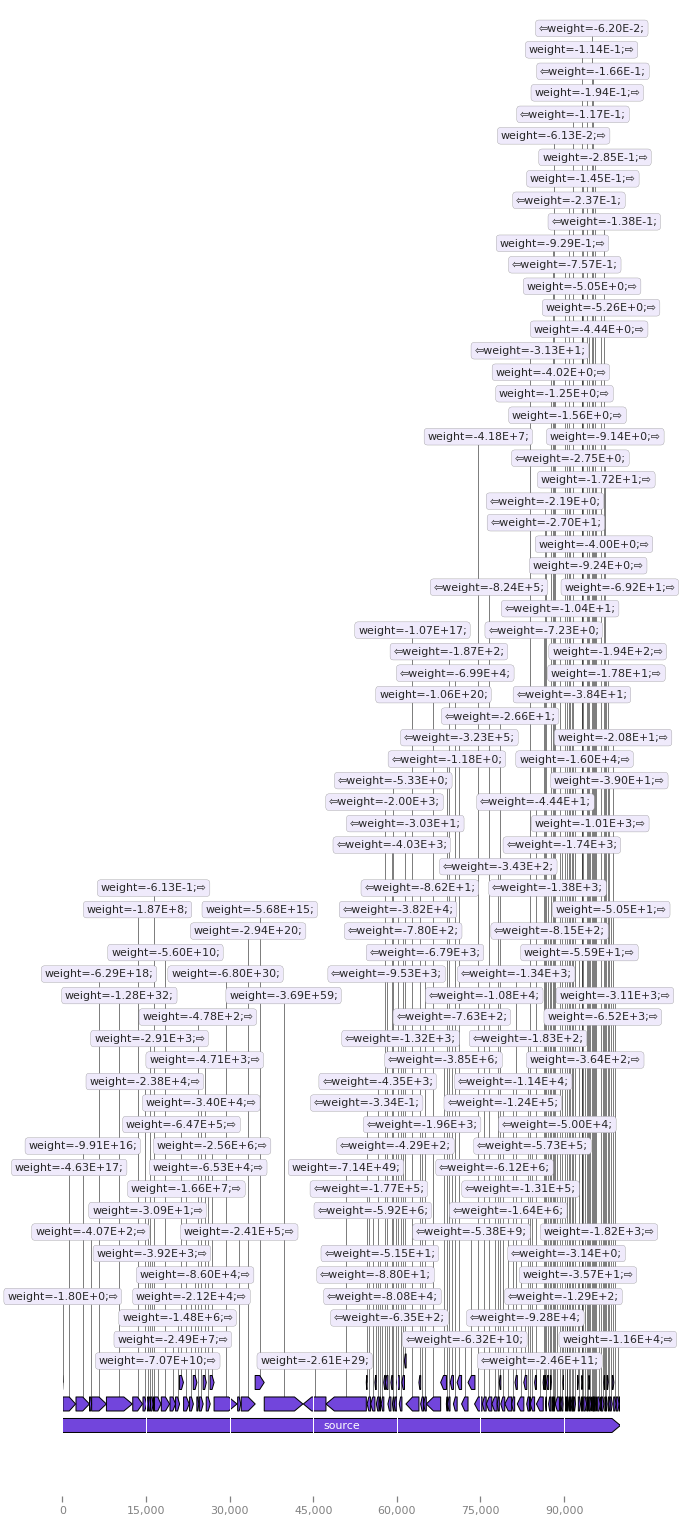

In [379]:
handle = '/home/grig0076/GitHubs/Phicore/genbank/Bc01-TAG-TGA-TAA.gbk'
graphic_record = BiopythonTranslator().translate_record(handle)
ax, _ = graphic_record.plot(figure_width=10, strand_in_label_threshold=7)

<AxesSubplot:>

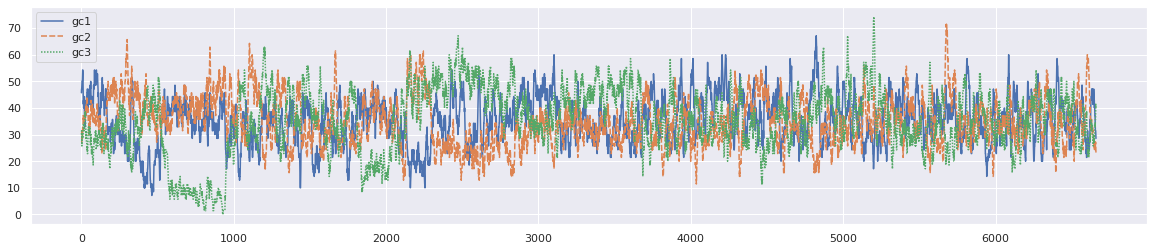

In [374]:
gc_df = generateGCPlot(seq, 210, 15) 
sns.set(rc={"figure.figsize":(20,4)})
sns.lineplot(data = gc_df)

In [364]:
handle = '/home/grig0076/GitHubs/Phicore/genbank/Bc01-TAG.gbk'
gb_dict = SeqIO.to_dict(SeqIO.parse(handle, "gb"))
genes =  gb_dict.get(list(gb_dict.keys())[0]).features

#generate a vector to store the genes 
coding_vec = np.zeros((1,len(seq)))

for i in range(1, len(genes)): 
    
    start = int(genes[i].location.start)
    end = int(genes[i].location.end)
    coding_vec[0,start:end] = 1

<AxesSubplot:>

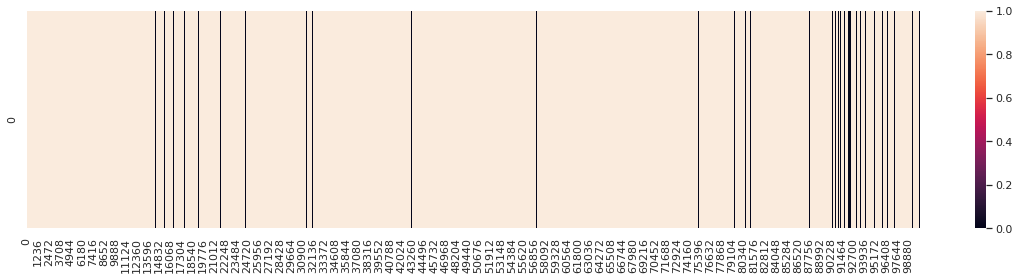

In [363]:
sns.heatmap(coding_vec)

<AxesSubplot:>

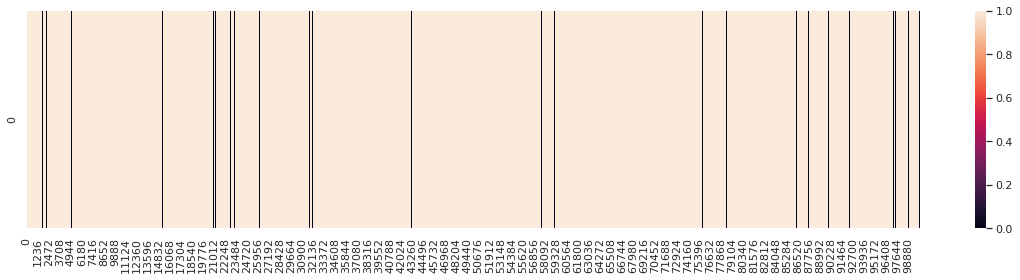

In [365]:
sns.heatmap(coding_vec)